# Introduction

This notebook backtests 1000 stock tickers. After reading in the stock tickers from a CSV file, it calls `backtester()` to do all the hard work. This is basically a wrapper for the `backtester()`. The `backtester()` is stored in backtest.py.

In [1]:
from backtest import ticker_stats, smooth, features, stringify, print_ticker_heading, balanced_scorecard, \
                     determine_minima_n_maxima, align_minima_n_maxima, plot_trades, split_data, \
                     get_signals, merge_buy_n_sell_signals, extract_trades, get_possible_trades, \
                     backtester
import pandas as pd
import numpy as np

from   frankie     import DayForecast, optimize, baseline, cross_val_tpr
import yfinance as yf

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer, load_iris, make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from category_encoders import WOEEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import savgol_filter, argrelmin, argrelmax

import gc; gc.enable()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# suppress output of plotting all the trades as this is quite a lot...
# plot_trades(tickers, min_indices, max_indices)

In [4]:
DATAPATH = '/Users/frkornet/Flatiron/Stock-Market-Final-Project/data/'
sdf = pd.read_csv(f'{DATAPATH}stocks_1000.csv')
idx = (sdf.TICKER > '')
sdf = sdf.loc[idx].reset_index()
tickers = sdf.TICKER.to_list()

In [5]:
%time myPnL_df, my_Capital_df, possible_trades_df = backtester(tickers)

Simulating 947 stocks
Failed to smooth prices for AVA!
Failed to smooth prices for HSY!
Failed to smooth prices for PROV!
Failed to smooth prices for RHI!
Failed to smooth prices for STRA!
Unable to determine minima and maxima for the following tickers:
['AVA', 'HSY', 'PROV', 'RHI', 'STRA']
Simulating now with 942 stocks
tickers= ['SRCE', 'ABBV', 'ARAY', 'ACRS', 'ACOR', 'AYI', 'ADUS', 'IOTS', 'ADRO', 'AAP', 'ADSW', 'WMS', 'AGLE', 'ACY', 'AVAV', 'ARPO', 'AES', 'AMG', 'AGCO', 'AGRX', 'AEM', 'ALRN', 'AIRG', 'AIRT', 'AKRX', 'ALK', 'AA', 'AXU', 'ALXN', 'AQN', 'ALCO', 'ALGN', 'ALLK', 'ABTX', 'LNT', 'ALSN', 'ALL', 'APT', 'ALPN', 'AMRK', 'AEP', 'AFG', 'AMNB', 'ANAT', 'AMRB', 'AMS', 'AMT', 'AMWD', 'CRMT', 'AMP', 'ATLO', 'AMGN', 'FOLD', 'AP', 'AMPH', 'AMPY', 'PLAN', 'ATRS', 'AR', 'APEN', 'APTX', 'APYX', 'AROC', 'ARCT', 'ACRE', 'AGX', 'ARGO', 'AHH', 'ARMP', 'AWI', 'ARWR', 'ARTW', 'AKG', 'AINC', 'ASH', 'ASPN', 'ASMB', 'ASRT', 'AGO', 'ASTE', 'ALOT', 'AAME', 'AUB', 'ATRC', 'ATRI', 'ACB', 'ADP', 'AZO

after buy: invested in ['SYBT', 'SYX'] (2
capital=10020.879940343028 in_use=4025.055928411633 free=5995.824011931394
*** buying 2004.1759880686054 in OFLX on 2017-03-20 00:00:00 with target sell date of 2017-05-01 00:00:00
enough money (5995.824011931394) to buy OFLX (capital=10020.879940343028
invested in: ['SYBT', 'SYX'] (2
after buy: invested in ['SYBT', 'SYX', 'OFLX'] (3
capital=10020.879940343028 in_use=6029.231916480238 free=3991.6480238627887
*** buying 2004.1759880686054 in KAI on 2017-03-20 00:00:00 with target sell date of 2017-05-08 00:00:00
enough money (3991.6480238627887) to buy KAI (capital=10020.879940343028
invested in: ['SYBT', 'SYX', 'OFLX'] (3
after buy: invested in ['SYBT', 'SYX', 'OFLX', 'KAI'] (4
capital=10020.879940343028 in_use=8033.407904548843 free=1987.4720357941833
*** buying 2004.1759880686054 in CVGI on 2017-03-20 00:00:00 with target sell date of 2017-04-12 00:00:00
enough money (1987.4720357941833) to buy CVGI (capital=10020.879940343028
invested in: ['

after buy: invested in ['SYX', 'OFLX', 'CHNR', 'GLUU', 'MSEX'] (5
capital=9972.16007954263 in_use=9969.376087496892 free=2.7839920457370226
*** buying 1994.432015908526 in OSPN on 2017-03-20 00:00:00 with target sell date of 2017-03-31 00:00:00
maxed out: OSPN is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'CHNR', 'GLUU', 'MSEX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'CHNR', 'GLUU', 'MSEX'] (5
capital=9972.16007954263 in_use=9969.376087496892 free=2.7839920457370226
*** buying 1994.432015908526 in TOWN on 2017-03-20 00:00:00 with target sell date of 2017-04-27 00:00:00
maxed out: TOWN is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'CHNR', 'GLUU', 'MSEX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'CHNR', 'GLUU', 'MSEX'] (5
capital=9972.16007954263 in_use=9969.376087496892 free=2.7839920457370226
*** buying 1

after buy: invested in ['SYX', 'OFLX', 'JCS', 'PTSI', 'CF'] (5
capital=9972.16007954263 in_use=9972.16007954263 free=0.0
*** buying 1994.432015908526 in KIM on 2017-03-20 00:00:00 with target sell date of 2017-07-28 00:00:00
maxed out: KIM is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'JCS', 'PTSI', 'CF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'JCS', 'PTSI', 'CF'] (5
capital=9972.16007954263 in_use=9972.16007954263 free=0.0
*** buying 1994.432015908526 in NHTC on 2017-03-20 00:00:00 with target sell date of 2017-10-11 00:00:00
maxed out: NHTC is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'JCS', 'PTSI', 'CF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'JCS', 'PTSI', 'CF'] (5
capital=9972.16007954263 in_use=9972.16007954263 free=0.0
*** buying 1994.432015908526 in CCRN on 2017-03-20 00:00:00 with target sell 

after buy: invested in ['SYX', 'OFLX', 'JCS', 'PTSI', 'TGT'] (5
capital=9916.120563245488 in_use=9916.120563245488 free=0.0
*** buying 1983.2241126490976 in WWD on 2017-03-21 00:00:00 with target sell date of 2017-06-12 00:00:00
maxed out: WWD is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'JCS', 'PTSI', 'TGT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'JCS', 'PTSI', 'TGT'] (5
capital=9916.120563245488 in_use=9916.120563245488 free=0.0
*** buying 1983.2241126490976 in LUV on 2017-03-21 00:00:00 with target sell date of 2017-04-13 00:00:00
maxed out: LUV is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'JCS', 'PTSI', 'TGT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'JCS', 'PTSI', 'TGT'] (5
capital=9916.120563245488 in_use=9916.120563245488 free=0.0
*** buying 1983.2241126490976 in PEBO on 2017-03-21 00:00:00 with 

after buy: invested in ['SYX', 'OFLX', 'PTSI', 'TGT', 'DXCM'] (5
capital=9656.625933987354 in_use=9656.625933987354 free=0.0
*** buying 1931.325186797471 in NM on 2017-03-23 00:00:00 with target sell date of 2017-04-04 00:00:00
maxed out: NM is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'PTSI', 'TGT', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'PTSI', 'TGT', 'DXCM'] (5
capital=9656.625933987354 in_use=9656.625933987354 free=0.0
*** buying 1931.325186797471 in HROW on 2017-03-23 00:00:00 with target sell date of 2017-03-24 00:00:00
maxed out: HROW is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'PTSI', 'TGT', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'PTSI', 'TGT', 'DXCM'] (5
capital=9656.625933987354 in_use=9656.625933987354 free=0.0
*** buying 1931.325186797471 in SBSI on 2017-03-23 00:00:00 wit

after buy: invested in ['SYX', 'OFLX', 'TGT', 'DXCM', 'TECH'] (5
capital=9617.374328183801 in_use=9617.374328183801 free=0.0
*** buying 1923.4748656367603 in BTE on 2017-03-24 00:00:00 with target sell date of 2017-08-01 00:00:00
maxed out: BTE is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TGT', 'DXCM', 'TECH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'TGT', 'DXCM', 'TECH'] (5
capital=9617.374328183801 in_use=9617.374328183801 free=0.0
before day_close: 2017-03-24 00:00:00 5 9617.374328183801 9617.374328183801 0.0 0.0 True
after day_close: 2017-03-24 00:00:00 5 9791.74965919465 9791.74965919465 0.0 0.0 True
*** buying 1958.34993183893 in HOFT on 2017-03-27 00:00:00 with target sell date of 2017-04-13 00:00:00
maxed out: HOFT is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TGT', 'DXCM', 'TECH'] (5)

not enough money to buy 25% of stock; not buying
i

*** buying 2082.7446343212564 in XRAY on 2017-03-28 00:00:00 with target sell date of 2017-04-03 00:00:00
maxed out: XRAY is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'DXCM', 'TECH', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'DXCM', 'TECH', 'ZN'] (5
capital=10413.723171606282 in_use=10413.723171606282 free=0.0
*** buying 2082.7446343212564 in SIVB on 2017-03-28 00:00:00 with target sell date of 2017-07-05 00:00:00
maxed out: SIVB is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'DXCM', 'TECH', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'DXCM', 'TECH', 'ZN'] (5
capital=10413.723171606282 in_use=10413.723171606282 free=0.0
*** buying 2082.7446343212564 in CTHR on 2017-03-28 00:00:00 with target sell date of 2017-06-01 00:00:00
maxed out: CTHR is not expected to perform better than stocks already invest

after buy: invested in ['SYX', 'OFLX', 'TECH', 'ZN', 'PKBK'] (5
capital=10850.179780196107 in_use=10850.179780196107 free=0.0
*** buying 2170.0359560392217 in VRTS on 2017-03-30 00:00:00 with target sell date of 2017-06-28 00:00:00
maxed out: VRTS is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TECH', 'ZN', 'PKBK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'TECH', 'ZN', 'PKBK'] (5
capital=10850.179780196107 in_use=10850.179780196107 free=0.0
*** buying 2170.0359560392217 in ADUS on 2017-03-30 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: ADUS is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TECH', 'ZN', 'PKBK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'TECH', 'ZN', 'PKBK'] (5
capital=10850.179780196107 in_use=10850.179780196107 free=0.0
*** buying 2170.0359560392217 in SPOK on 2017-03-30 00:0

after buy: invested in ['SYX', 'OFLX', 'TECH', 'ZN', 'LULU'] (5
capital=10979.600121843236 in_use=10979.600121843236 free=0.0
*** buying 2195.9200243686473 in HWC on 2017-04-04 00:00:00 with target sell date of 2017-05-04 00:00:00
maxed out: HWC is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TECH', 'ZN', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'TECH', 'ZN', 'LULU'] (5
capital=10979.600121843236 in_use=10979.600121843236 free=0.0
*** buying 2195.9200243686473 in XRAY on 2017-04-04 00:00:00 with target sell date of 2017-04-06 00:00:00
maxed out: XRAY is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TECH', 'ZN', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'TECH', 'ZN', 'LULU'] (5
capital=10979.600121843236 in_use=10979.600121843236 free=0.0
*** buying 2195.9200243686473 in CTIC on 2017-04-04 00:00:

after buy: invested in ['OFLX', 'TECH', 'ZN', 'LULU', 'ISSC'] (5
capital=11141.674180264998 in_use=10236.407885801891 free=905.2662944631074
*** buying 2228.3348360529994 in ALCO on 2017-04-07 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: ALCO is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'ISSC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'ISSC'] (5
capital=11141.674180264998 in_use=10236.407885801891 free=905.2662944631074
*** buying 2228.3348360529994 in HWKN on 2017-04-07 00:00:00 with target sell date of 2017-05-01 00:00:00
maxed out: HWKN is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'ISSC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'ISSC'] (5
capital=11141.674180264998 in_use=10236.407885801891 free=905.2662944631074
*** buyin

after buy: invested in ['OFLX', 'TECH', 'ZN', 'LULU', 'TSRI'] (5
capital=11151.248044955044 in_use=10291.225256353198 free=860.0227886018451
*** buying 2230.2496089910087 in REGN on 2017-04-11 00:00:00 with target sell date of 2017-05-19 00:00:00
maxed out: REGN is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'TSRI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'TSRI'] (5
capital=11151.248044955044 in_use=10291.225256353198 free=860.0227886018451
*** buying 2230.2496089910087 in LORL on 2017-04-11 00:00:00 with target sell date of 2017-06-06 00:00:00
maxed out: LORL is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'TSRI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'TSRI'] (5
capital=11151.248044955044 in_use=10291.225256353198 free=860.0227886018451
*** buyin

after buy: invested in ['OFLX', 'TECH', 'ZN', 'LULU', 'TRNS'] (5
capital=11066.710293970185 in_use=10242.464062855193 free=824.2462311149902
*** buying 2213.3420587940373 in BHB on 2017-04-13 00:00:00 with target sell date of 2017-05-03 00:00:00
maxed out: BHB is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'TRNS'] (5
capital=11066.710293970185 in_use=10242.464062855193 free=824.2462311149902
*** buying 2213.3420587940373 in CASS on 2017-04-13 00:00:00 with target sell date of 2017-05-04 00:00:00
maxed out: CASS is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'TRNS'] (5
capital=11066.710293970185 in_use=10242.464062855193 free=824.2462311149902
*** buying 

after buy: invested in ['OFLX', 'TECH', 'ZN', 'LULU', 'AIRT'] (5
capital=11037.970387642923 in_use=10184.220380140761 free=853.7500075021576

before day_close: 2017-04-17 00:00:00 5 11037.970387642923 10184.220380140761 853.7500075021576 4.092726157978177e-12 True
after day_close: 2017-04-17 00:00:00 5 11063.771050701165 10210.021043199005 853.7500075021576 2.2737367544323206e-12 True
*** buying 2212.754210140233 in VIAV on 2017-04-18 00:00:00 with target sell date of 2017-05-12 00:00:00
maxed out: VIAV is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TECH', 'ZN', 'LULU', 'AIRT'] (5
capital=11063.771050701165 in_use=10210.021043199005 free=853.7500075021576
*** buying 2212.754210140233 in HON on 2017-04-18 00:00:00 with target sell date of 2017-05-05 00:00:00
maxed out: HON is not expected to perform better than stocks already invested in
inv

after buy: invested in ['OFLX', 'ZN', 'LULU', 'AIRT', 'NVDA'] (5
capital=11269.499442803748 in_use=10841.076857952896 free=428.4225848508486
*** buying 2253.89988856075 in BDSI on 2017-04-20 00:00:00 with target sell date of 2017-05-08 00:00:00
maxed out: BDSI is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'ZN', 'LULU', 'AIRT', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'ZN', 'LULU', 'AIRT', 'NVDA'] (5
capital=11269.499442803748 in_use=10841.076857952896 free=428.4225848508486
*** buying 2253.89988856075 in CHE on 2017-04-20 00:00:00 with target sell date of 2017-04-28 00:00:00
maxed out: CHE is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'ZN', 'LULU', 'AIRT', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'ZN', 'LULU', 'AIRT', 'NVDA'] (5
capital=11269.499442803748 in_use=10841.076857952896 free=428.4225848508486
*** buying 2253

after buy: invested in ['ZN', 'LULU', 'AIRT', 'NVDA', 'BIIB'] (5
capital=11733.489896500643 in_use=11195.579651500435 free=537.9102450002051
*** buying 2346.6979793001287 in ESCA on 2017-05-01 00:00:00 with target sell date of 2017-07-03 00:00:00
maxed out: ESCA is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'AIRT', 'NVDA', 'BIIB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'AIRT', 'NVDA', 'BIIB'] (5
capital=11733.489896500643 in_use=11195.579651500435 free=537.9102450002051
*** buying 2346.6979793001287 in CVLT on 2017-05-01 00:00:00 with target sell date of 2017-05-02 00:00:00
maxed out: CVLT is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'AIRT', 'NVDA', 'BIIB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'AIRT', 'NVDA', 'BIIB'] (5
capital=11733.489896500643 in_use=11195.579651500435 free=537.9102450002051
*** buyin

profit of selling GFN on 2017-05-02 00:00:00:  0.0 0.0%
enough money (3032.231351714347) to buy TGNA (capital=12167.587661570326
invested in: ['LULU', 'AIRT', 'NVDA', 'PEBK'] (4
after buy: invested in ['LULU', 'AIRT', 'NVDA', 'PEBK', 'TGNA'] (5
capital=12167.587661570326 in_use=11568.873842170038 free=598.7138194002819
*** buying 2433.517532314065 in FCN on 2017-05-02 00:00:00 with target sell date of 2017-07-28 00:00:00
maxed out: FCN is not expected to perform better than stocks already invested in
invested in: ['LULU', 'AIRT', 'NVDA', 'PEBK', 'TGNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'AIRT', 'NVDA', 'PEBK', 'TGNA'] (5
capital=12167.587661570326 in_use=11568.873842170038 free=598.7138194002819
*** buying 2433.517532314065 in FARM on 2017-05-02 00:00:00 with target sell date of 2017-07-21 00:00:00
maxed out: FARM is not expected to perform better than stocks already invested in
invested in: ['LULU', 'AIRT', 'NVDA', 'PEBK', 'TGNA'] (5)

not eno

after buy: invested in ['LULU', 'AIRT', 'NVDA', 'TGNA', 'PW'] (5
capital=12150.844390781833 in_use=11630.696721684426 free=520.1476690974046
*** buying 2430.1688781563666 in GRIF on 2017-05-05 00:00:00 with target sell date of 2017-05-25 00:00:00
maxed out: GRIF is not expected to perform better than stocks already invested in
invested in: ['LULU', 'AIRT', 'NVDA', 'TGNA', 'PW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'AIRT', 'NVDA', 'TGNA', 'PW'] (5
capital=12150.844390781833 in_use=11630.696721684426 free=520.1476690974046
*** buying 2430.1688781563666 in CRMT on 2017-05-05 00:00:00 with target sell date of 2017-06-20 00:00:00
*** selling TGNA on 2017-05-05 00:00:00 to free up money for CRMT
profit of selling TGNA on 2017-05-05 00:00:00:  51.09748099347098 2.1%
enough money (3004.7626824049407) to buy CRMT (capital=12224.297019709948
invested in: ['LULU', 'AIRT', 'NVDA', 'PW'] (4
after buy: invested in ['LULU', 'AIRT', 'NVDA', 'PW', 'CRMT'] (5
capit

after buy: invested in ['LULU', 'AIRT', 'NVDA', 'DOV', 'NSSC'] (5
capital=12294.516931283115 in_use=11622.713144814245 free=671.8037864688713

before day_close: 2017-05-09 00:00:00 5 12294.516931283115 11622.713144814245 671.8037864688713 9.094947017729282e-13 True
after day_close: 2017-05-09 00:00:00 5 12319.661488075279 11647.857701606408 671.8037864688713 9.094947017729282e-13 True
*** buying 2463.9322976150556 in IAG on 2017-05-10 00:00:00 with target sell date of 2017-06-01 00:00:00
maxed out: IAG is not expected to perform better than stocks already invested in
invested in: ['LULU', 'AIRT', 'NVDA', 'DOV', 'NSSC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'AIRT', 'NVDA', 'DOV', 'NSSC'] (5
capital=12319.661488075279 in_use=11647.857701606408 free=671.8037864688713
*** buying 2463.9322976150556 in SEB on 2017-05-10 00:00:00 with target sell date of 2017-06-16 00:00:00
maxed out: SEB is not expected to perform better than stocks already invested in
i

after buy: invested in ['LULU', 'AIRT', 'NVDA', 'CORT', 'ATRS'] (5
capital=12539.529409509087 in_use=12284.099680472513 free=255.42972903657392
*** buying 2507.9058819018173 in PKOH on 2017-05-18 00:00:00 with target sell date of 2017-06-12 00:00:00
maxed out: PKOH is not expected to perform better than stocks already invested in
invested in: ['LULU', 'AIRT', 'NVDA', 'CORT', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'AIRT', 'NVDA', 'CORT', 'ATRS'] (5
capital=12539.529409509087 in_use=12284.099680472513 free=255.42972903657392
*** buying 2507.9058819018173 in BANC on 2017-05-18 00:00:00 with target sell date of 2017-06-15 00:00:00
maxed out: BANC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'AIRT', 'NVDA', 'CORT', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'AIRT', 'NVDA', 'CORT', 'ATRS'] (5
capital=12539.529409509087 in_use=12284.099680472513 free=255.42972903657

after day_close: 2017-05-26 00:00:00 5 13136.021791860949 12880.592062824377 255.42972903657392 1.8189894035458565e-12 True
invested in: ['LULU', 'AIRT', 'NVDA', 'CORT', 'ATRS'] (5
capital=13136.021791860949 in_use=12880.592062824377 free=255.42972903657392
*** selling CORT on 2017-05-30 00:00:00
profit of selling CORT on 2017-05-30 00:00:00:  249.53448207574093 9.74%
after selling invested in: ['LULU', 'AIRT', 'NVDA', 'ATRS'] (4
capital=12940.308472585859 in_use=9873.946195460792 free=3066.362277125068
*** buying 2588.061694517172 in APEN on 2017-05-30 00:00:00 with target sell date of 2017-06-21 00:00:00
enough money (3066.362277125068) to buy APEN (capital=12940.308472585859
invested in: ['LULU', 'AIRT', 'NVDA', 'ATRS'] (4
after buy: invested in ['LULU', 'AIRT', 'NVDA', 'ATRS', 'APEN'] (5
capital=12940.308472585859 in_use=12462.007889977964 free=478.3005826078961
*** buying 2588.061694517172 in EXAS on 2017-05-30 00:00:00 with target sell date of 2017-05-31 00:00:00
*** selling APEN

after buy: invested in ['AIRT', 'NVDA', 'ATRS', 'TIPT', 'NEM'] (5
capital=13641.552152895958 in_use=13351.157859636334 free=290.3942932596274
*** buying 2728.3104305791917 in JNPR on 2017-06-02 00:00:00 with target sell date of 2017-07-21 00:00:00
maxed out: JNPR is not expected to perform better than stocks already invested in
invested in: ['AIRT', 'NVDA', 'ATRS', 'TIPT', 'NEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AIRT', 'NVDA', 'ATRS', 'TIPT', 'NEM'] (5
capital=13641.552152895958 in_use=13351.157859636334 free=290.3942932596274

before day_close: 2017-06-02 00:00:00 5 13641.552152895958 13351.157859636334 290.3942932596274 3.637978807091713e-12 True
after day_close: 2017-06-02 00:00:00 5 13872.57144765462 13582.177154394998 290.3942932596274 5.4569682106375694e-12 True
*** buying 2774.514289530924 in STRL on 2017-06-05 00:00:00 with target sell date of 2017-06-13 00:00:00
*** selling NEM on 2017-06-05 00:00:00 to free up money for STRL
profit of selli

after buy: invested in ['AIRT', 'NVDA', 'ATRS', 'CVI', 'CF'] (5
capital=13819.875905890627 in_use=13658.168491606335 free=161.7074142842962
*** buying 2763.9751811781252 in MRK on 2017-06-08 00:00:00 with target sell date of 2017-06-14 00:00:00
maxed out: MRK is not expected to perform better than stocks already invested in
invested in: ['AIRT', 'NVDA', 'ATRS', 'CVI', 'CF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AIRT', 'NVDA', 'ATRS', 'CVI', 'CF'] (5
capital=13819.875905890627 in_use=13658.168491606335 free=161.7074142842962
*** buying 2763.9751811781252 in INCY on 2017-06-08 00:00:00 with target sell date of 2017-06-15 00:00:00
maxed out: INCY is not expected to perform better than stocks already invested in
invested in: ['AIRT', 'NVDA', 'ATRS', 'CVI', 'CF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AIRT', 'NVDA', 'ATRS', 'CVI', 'CF'] (5
capital=13819.875905890627 in_use=13658.168491606335 free=161.7074142842962
*** buying 2763.

after buy: invested in ['AIRT', 'NVDA', 'CF', 'DXCM', 'EXAS'] (5
capital=14415.797902014217 in_use=14330.531845211952 free=85.26605680226885
*** buying 2883.1595804028434 in LNN on 2017-06-14 00:00:00 with target sell date of 2017-06-16 00:00:00
maxed out: LNN is not expected to perform better than stocks already invested in
invested in: ['AIRT', 'NVDA', 'CF', 'DXCM', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AIRT', 'NVDA', 'CF', 'DXCM', 'EXAS'] (5
capital=14415.797902014217 in_use=14330.531845211952 free=85.26605680226885
*** buying 2883.1595804028434 in IPAR on 2017-06-14 00:00:00 with target sell date of 2017-06-16 00:00:00
maxed out: IPAR is not expected to perform better than stocks already invested in
invested in: ['AIRT', 'NVDA', 'CF', 'DXCM', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AIRT', 'NVDA', 'CF', 'DXCM', 'EXAS'] (5
capital=14415.797902014217 in_use=14330.531845211952 free=85.26605680226885
*** buying 

after buy: invested in ['AIRT', 'NVDA', 'CF', 'DXCM', 'TGT'] (5
capital=14600.917886509047 in_use=14381.968341321692 free=218.94954518735994
*** buying 2920.1835773018092 in FLNT on 2017-06-19 00:00:00 with target sell date of 2017-07-03 00:00:00
maxed out: FLNT is not expected to perform better than stocks already invested in
invested in: ['AIRT', 'NVDA', 'CF', 'DXCM', 'TGT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AIRT', 'NVDA', 'CF', 'DXCM', 'TGT'] (5
capital=14600.917886509047 in_use=14381.968341321692 free=218.94954518735994
*** buying 2920.1835773018092 in OKE on 2017-06-19 00:00:00 with target sell date of 2017-07-03 00:00:00
maxed out: OKE is not expected to perform better than stocks already invested in
invested in: ['AIRT', 'NVDA', 'CF', 'DXCM', 'TGT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AIRT', 'NVDA', 'CF', 'DXCM', 'TGT'] (5
capital=14600.917886509047 in_use=14381.968341321692 free=218.94954518735994
*** buying 29

after buy: invested in ['AIRT', 'NVDA', 'DXCM', 'TGT', 'ITT'] (5
capital=15020.602097936588 in_use=14799.152181634941 free=221.44991630165077
*** buying 3004.1204195873174 in CATC on 2017-06-23 00:00:00 with target sell date of 2017-08-10 00:00:00
*** selling ITT on 2017-06-23 00:00:00 to free up money for CATC
profit of selling ITT on 2017-06-23 00:00:00:  0.0 0.0%
enough money (3225.570335888968) to buy CATC (capital=15020.602097936588
invested in: ['AIRT', 'NVDA', 'DXCM', 'TGT'] (4
after buy: invested in ['AIRT', 'NVDA', 'DXCM', 'TGT', 'CATC'] (5
capital=15020.602097936588 in_use=14799.152181634941 free=221.44991630165077
*** buying 3004.1204195873174 in TIPT on 2017-06-23 00:00:00 with target sell date of 2017-06-30 00:00:00
*** selling CATC on 2017-06-23 00:00:00 to free up money for TIPT
profit of selling CATC on 2017-06-23 00:00:00:  0.0 0.0%
enough money (3225.570335888968) to buy TIPT (capital=15020.602097936588
invested in: ['AIRT', 'NVDA', 'DXCM', 'TGT'] (4
after buy: invest

after buy: invested in ['AIRT', 'DXCM', 'TGT', 'TIPT', 'EXAS'] (5
capital=14984.899695038057 in_use=14462.721443393624 free=522.1782516444346
*** buying 2996.9799390076114 in ASMB on 2017-06-27 00:00:00 with target sell date of 2017-07-17 00:00:00
maxed out: ASMB is not expected to perform better than stocks already invested in
invested in: ['AIRT', 'DXCM', 'TGT', 'TIPT', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AIRT', 'DXCM', 'TGT', 'TIPT', 'EXAS'] (5
capital=14984.899695038057 in_use=14462.721443393624 free=522.1782516444346
*** buying 2996.9799390076114 in RNR on 2017-06-27 00:00:00 with target sell date of 2017-07-21 00:00:00
maxed out: RNR is not expected to perform better than stocks already invested in
invested in: ['AIRT', 'DXCM', 'TGT', 'TIPT', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AIRT', 'DXCM', 'TGT', 'TIPT', 'EXAS'] (5
capital=14984.899695038057 in_use=14462.721443393624 free=522.1782516444346
*** bu

after buy: invested in ['AIRT', 'DXCM', 'TGT', 'CCMP', 'NSIT'] (5
capital=15267.648486054848 in_use=14470.852114431227 free=796.7963716236245

before day_close: 2017-06-29 00:00:00 5 15267.648486054848 14470.852114431227 796.7963716236245 3.637978807091713e-12 True
after day_close: 2017-06-29 00:00:00 5 15146.209995748624 14349.413624125005 796.7963716236245 5.4569682106375694e-12 True
*** buying 3029.241999149725 in NAV on 2017-06-30 00:00:00 with target sell date of 2017-07-13 00:00:00
maxed out: NAV is not expected to perform better than stocks already invested in
invested in: ['AIRT', 'DXCM', 'TGT', 'CCMP', 'NSIT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AIRT', 'DXCM', 'TGT', 'CCMP', 'NSIT'] (5
capital=15146.209995748624 in_use=14349.413624125005 free=796.7963716236245
*** buying 3029.241999149725 in BMTC on 2017-06-30 00:00:00 with target sell date of 2017-10-17 00:00:00
maxed out: BMTC is not expected to perform better than stocks already invested in


after buy: invested in ['AIRT', 'DXCM', 'TGT', 'CCMP', 'TSRI'] (5
capital=15175.258046507424 in_use=14377.423676387065 free=797.8343701203662

before day_close: 2017-07-03 00:00:00 5 15175.258046507424 14377.423676387065 797.8343701203662 6.821210263296962e-12 True
after day_close: 2017-07-03 00:00:00 5 15079.658048437937 14281.823678317578 797.8343701203662 6.821210263296962e-12 True
*** buying 3015.9316096875873 in FLDM on 2017-07-05 00:00:00 with target sell date of 2017-11-22 00:00:00
maxed out: FLDM is not expected to perform better than stocks already invested in
invested in: ['AIRT', 'DXCM', 'TGT', 'CCMP', 'TSRI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AIRT', 'DXCM', 'TGT', 'CCMP', 'TSRI'] (5
capital=15079.658048437937 in_use=14281.823678317578 free=797.8343701203662
*** buying 3015.9316096875873 in WWD on 2017-07-05 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: WWD is not expected to perform better than stocks already invested in

after buy: invested in ['AIRT', 'DXCM', 'TGT', 'TSRI', 'CTHR'] (5
capital=14917.638638863387 in_use=14046.379389088466 free=871.2592497749274
*** buying 2983.5277277726773 in WMS on 2017-07-10 00:00:00 with target sell date of 2017-07-11 00:00:00
maxed out: WMS is not expected to perform better than stocks already invested in
invested in: ['AIRT', 'DXCM', 'TGT', 'TSRI', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AIRT', 'DXCM', 'TGT', 'TSRI', 'CTHR'] (5
capital=14917.638638863387 in_use=14046.379389088466 free=871.2592497749274
*** buying 2983.5277277726773 in CNOB on 2017-07-10 00:00:00 with target sell date of 2017-07-24 00:00:00
maxed out: CNOB is not expected to perform better than stocks already invested in
invested in: ['AIRT', 'DXCM', 'TGT', 'TSRI', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AIRT', 'DXCM', 'TGT', 'TSRI', 'CTHR'] (5
capital=14917.638638863387 in_use=14046.379389088466 free=871.2592497749274
*** bu

after buy: invested in ['DXCM', 'TGT', 'TSRI', 'CTHR', 'SPPI'] (5
capital=14338.324835194662 in_use=14338.324835194668 free=0.0
*** buying 2867.6649670389324 in LMNX on 2017-07-18 00:00:00 with target sell date of 2017-10-02 00:00:00
maxed out: LMNX is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'TSRI', 'CTHR', 'SPPI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'TSRI', 'CTHR', 'SPPI'] (5
capital=14338.324835194662 in_use=14338.324835194668 free=0.0
*** buying 2867.6649670389324 in AVB on 2017-07-18 00:00:00 with target sell date of 2017-07-19 00:00:00
*** selling SPPI on 2017-07-18 00:00:00 to free up money for AVB
profit of selling SPPI on 2017-07-18 00:00:00:  0.0 0.0%
enough money (2779.183689537633) to buy AVB (capital=14338.324835194662
invested in: ['DXCM', 'TGT', 'TSRI', 'CTHR'] (4
you do not have 2779.183689537633 and setting amount to 2779.183689537633
after buy: invested in ['DXCM', 'TGT',

after buy: invested in ['DXCM', 'TGT', 'CTHR', 'PTSI', 'SYX'] (5
capital=14395.07197210385 in_use=14395.071972103857 free=0.0
*** buying 2879.01439442077 in CRK on 2017-07-20 00:00:00 with target sell date of 2017-07-28 00:00:00
maxed out: CRK is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'CTHR', 'PTSI', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'CTHR', 'PTSI', 'SYX'] (5
capital=14395.07197210385 in_use=14395.071972103857 free=0.0
*** buying 2879.01439442077 in RMCF on 2017-07-20 00:00:00 with target sell date of 2017-08-23 00:00:00
maxed out: RMCF is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'CTHR', 'PTSI', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'CTHR', 'PTSI', 'SYX'] (5
capital=14395.07197210385 in_use=14395.071972103857 free=0.0
*** buying 2879.01439442077 in HE on 2017-07-20 00:00:00 wit

after buy: invested in ['DXCM', 'TGT', 'PTSI', 'SYX', 'NOA'] (5
capital=14399.058939770004 in_use=14399.058939770011 free=0.0
*** buying 2879.811787954001 in LNDC on 2017-07-26 00:00:00 with target sell date of 2017-10-12 00:00:00
maxed out: LNDC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'PTSI', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'PTSI', 'SYX', 'NOA'] (5
capital=14399.058939770004 in_use=14399.058939770011 free=0.0
*** buying 2879.811787954001 in MSCI on 2017-07-26 00:00:00 with target sell date of 2017-07-31 00:00:00
maxed out: MSCI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'PTSI', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'PTSI', 'SYX', 'NOA'] (5
capital=14399.058939770004 in_use=14399.058939770011 free=0.0
*** buying 2879.811787954001 in F on 2017-07-26 00:00:00 w

after buy: invested in ['DXCM', 'TGT', 'SYX', 'NOA', 'UNT'] (5
capital=14220.300985791564 in_use=14220.300985791571 free=0.0
*** buying 2844.060197158313 in HON on 2017-07-31 00:00:00 with target sell date of 2017-08-03 00:00:00
maxed out: HON is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'SYX', 'NOA', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'SYX', 'NOA', 'UNT'] (5
capital=14220.300985791564 in_use=14220.300985791571 free=0.0
*** buying 2844.060197158313 in WCN on 2017-07-31 00:00:00 with target sell date of 2017-08-01 00:00:00
maxed out: WCN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'SYX', 'NOA', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'SYX', 'NOA', 'UNT'] (5
capital=14220.300985791564 in_use=14220.300985791571 free=0.0
*** buying 2844.060197158313 in PKOH on 2017-07-31 00:00:00 with ta

after buy: invested in ['DXCM', 'SYX', 'NOA', 'UNT', 'HTZ'] (5
capital=15517.997952683549 in_use=15369.729626559743 free=148.26832612381304
*** buying 3103.59959053671 in IMMR on 2017-08-04 00:00:00 with target sell date of 2017-10-30 00:00:00
*** selling HTZ on 2017-08-04 00:00:00 to free up money for IMMR
profit of selling HTZ on 2017-08-04 00:00:00:  0.0 0.0%
enough money (3251.867916660523) to buy IMMR (capital=15517.997952683549
invested in: ['DXCM', 'SYX', 'NOA', 'UNT'] (4
after buy: invested in ['DXCM', 'SYX', 'NOA', 'UNT', 'IMMR'] (5
capital=15517.997952683549 in_use=15369.729626559743 free=148.26832612381304
*** buying 3103.59959053671 in MEOH on 2017-08-04 00:00:00 with target sell date of 2017-09-22 00:00:00
maxed out: MEOH is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'NOA', 'UNT', 'IMMR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'NOA', 'UNT', 'IMMR'] (5
capital=15517.997952683549 in_

after buy: invested in ['DXCM', 'SYX', 'NOA', 'UNT', 'CCMP'] (5
capital=14869.595147725468 in_use=14639.250344555121 free=230.34480317035468
*** buying 2973.9190295450935 in CBSH on 2017-08-10 00:00:00 with target sell date of 2017-09-22 00:00:00
maxed out: CBSH is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'NOA', 'UNT', 'CCMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'NOA', 'UNT', 'CCMP'] (5
capital=14869.595147725468 in_use=14639.250344555121 free=230.34480317035468
*** buying 2973.9190295450935 in FFBC on 2017-08-10 00:00:00 with target sell date of 2017-09-25 00:00:00
maxed out: FFBC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'NOA', 'UNT', 'CCMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'NOA', 'UNT', 'CCMP'] (5
capital=14869.595147725468 in_use=14639.250344555121 free=230.34480317035468
*** buying 

after buy: invested in ['DXCM', 'SYX', 'UNT', 'NVDA', 'TRNS'] (5
capital=15044.314586707336 in_use=15044.314586707344 free=0.0
*** buying 3008.8629173414674 in FOLD on 2017-08-15 00:00:00 with target sell date of 2017-09-14 00:00:00
maxed out: FOLD is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'UNT', 'NVDA', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'UNT', 'NVDA', 'TRNS'] (5
capital=15044.314586707336 in_use=15044.314586707344 free=0.0
*** buying 3008.8629173414674 in CAMP on 2017-08-15 00:00:00 with target sell date of 2017-09-12 00:00:00
maxed out: CAMP is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'UNT', 'NVDA', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'UNT', 'NVDA', 'TRNS'] (5
capital=15044.314586707336 in_use=15044.314586707344 free=0.0
*** buying 3008.8629173414674 in HLX on 2017-08-15 

after buy: invested in ['DXCM', 'SYX', 'NVDA', 'TRNS', 'RGS'] (5
capital=14773.21580706909 in_use=14773.215807069097 free=0.0
*** buying 2954.643161413818 in HOFT on 2017-08-17 00:00:00 with target sell date of 2017-09-29 00:00:00
*** selling RGS on 2017-08-17 00:00:00 to free up money for HOFT
profit of selling RGS on 2017-08-17 00:00:00:  0.0 0.0%
enough money (2391.5914410008845) to buy HOFT (capital=14773.21580706909
invested in: ['DXCM', 'SYX', 'NVDA', 'TRNS'] (4
you do not have 2391.5914410008845 and setting amount to 2391.5914410008845
after buy: invested in ['DXCM', 'SYX', 'NVDA', 'TRNS', 'HOFT'] (5
capital=14773.21580706909 in_use=14773.215807069097 free=0.0
*** buying 2954.643161413818 in KMI on 2017-08-17 00:00:00 with target sell date of 2017-09-20 00:00:00
*** selling HOFT on 2017-08-17 00:00:00 to free up money for KMI
profit of selling HOFT on 2017-08-17 00:00:00:  0.0 0.0%
enough money (2391.5914410008845) to buy KMI (capital=14773.21580706909
invested in: ['DXCM', 'SYX

after buy: invested in ['DXCM', 'SYX', 'NVDA', 'TRNS', 'NSIT'] (5
capital=14590.540909609412 in_use=14590.540909609419 free=0.0
*** buying 2918.1081819218825 in LULU on 2017-08-18 00:00:00 with target sell date of 2017-09-11 00:00:00
*** selling NSIT on 2017-08-18 00:00:00 to free up money for LULU
profit of selling NSIT on 2017-08-18 00:00:00:  0.0 0.0%
enough money (2384.080835309091) to buy LULU (capital=14590.540909609412
invested in: ['DXCM', 'SYX', 'NVDA', 'TRNS'] (4
you do not have 2384.080835309091 and setting amount to 2384.080835309091
after buy: invested in ['DXCM', 'SYX', 'NVDA', 'TRNS', 'LULU'] (5
capital=14590.540909609412 in_use=14590.540909609419 free=0.0
*** buying 2918.1081819218825 in ETH on 2017-08-18 00:00:00 with target sell date of 2017-09-15 00:00:00
maxed out: ETH is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'NVDA', 'TRNS', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX'

after buy: invested in ['DXCM', 'SYX', 'NVDA', 'LULU', 'SKYW'] (5
capital=14673.570846780825 in_use=14638.85418631425 free=34.71666046658311
*** buying 2934.7141693561653 in WIRE on 2017-08-22 00:00:00 with target sell date of 2017-09-19 00:00:00
maxed out: WIRE is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'NVDA', 'LULU', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'NVDA', 'LULU', 'SKYW'] (5
capital=14673.570846780825 in_use=14638.85418631425 free=34.71666046658311
*** buying 2934.7141693561653 in PKBK on 2017-08-22 00:00:00 with target sell date of 2017-10-12 00:00:00
maxed out: PKBK is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'NVDA', 'LULU', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'NVDA', 'LULU', 'SKYW'] (5
capital=14673.570846780825 in_use=14638.85418631425 free=34.71666046658311
*** buy

after buy: invested in ['DXCM', 'SYX', 'NVDA', 'LULU', 'AIRT'] (5
capital=14942.823088161138 in_use=14880.999243712522 free=61.823844448621
*** buying 2988.5646176322275 in STAR on 2017-08-25 00:00:00 with target sell date of 2017-09-27 00:00:00
maxed out: STAR is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'NVDA', 'LULU', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'NVDA', 'LULU', 'AIRT'] (5
capital=14942.823088161138 in_use=14880.999243712522 free=61.823844448621
*** buying 2988.5646176322275 in DENN on 2017-08-25 00:00:00 with target sell date of 2017-09-12 00:00:00
maxed out: DENN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'NVDA', 'LULU', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'NVDA', 'LULU', 'AIRT'] (5
capital=14942.823088161138 in_use=14880.999243712522 free=61.823844448621

before da

after buy: invested in ['DXCM', 'SYX', 'NVDA', 'LULU', 'OFLX'] (5
capital=15105.464552817677 in_use=14953.678226002663 free=151.78632681501904
*** buying 3021.0929105635355 in TGNA on 2017-08-31 00:00:00 with target sell date of 2017-09-29 00:00:00
maxed out: TGNA is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'NVDA', 'LULU', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'NVDA', 'LULU', 'OFLX'] (5
capital=15105.464552817677 in_use=14953.678226002663 free=151.78632681501904
*** buying 3021.0929105635355 in BMO on 2017-08-31 00:00:00 with target sell date of 2017-09-15 00:00:00
maxed out: BMO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'NVDA', 'LULU', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'NVDA', 'LULU', 'OFLX'] (5
capital=15105.464552817677 in_use=14953.678226002663 free=151.78632681501904
***

after buy: invested in ['DXCM', 'NVDA', 'LULU', 'OFLX', 'ALOT'] (5
capital=15056.074092226037 in_use=14338.720763066747 free=717.3533291592953
*** buying 3011.2148184452076 in USM on 2017-09-08 00:00:00 with target sell date of 2017-10-04 00:00:00
*** selling ALOT on 2017-09-08 00:00:00 to free up money for USM
profit of selling ALOT on 2017-09-08 00:00:00:  0.0 0.0%
enough money (3728.568147604503) to buy USM (capital=15056.074092226037
invested in: ['DXCM', 'NVDA', 'LULU', 'OFLX'] (4
after buy: invested in ['DXCM', 'NVDA', 'LULU', 'OFLX', 'USM'] (5
capital=15056.074092226037 in_use=14338.720763066747 free=717.3533291592953
*** buying 3011.2148184452076 in SRPT on 2017-09-08 00:00:00 with target sell date of 2017-09-22 00:00:00
maxed out: SRPT is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'NVDA', 'LULU', 'OFLX', 'USM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'NVDA', 'LULU', 'OFLX', 'USM'] (5
capital=15056.07

enough money (3230.8049900961696) to buy PW (capital=15334.649913253392
invested in: ['DXCM', 'OFLX', 'EDSA', 'CHNR'] (4
after buy: invested in ['DXCM', 'OFLX', 'EDSA', 'CHNR', 'PW'] (5
capital=15334.649913253392 in_use=15158.078045604774 free=176.57186764862217

before day_close: 2017-09-12 00:00:00 5 15334.649913253392 15158.078045604774 176.57186764862217 4.547473508864641e-12 True
after day_close: 2017-09-12 00:00:00 5 15399.055859643813 15222.483991995196 176.57186764862217 4.547473508864641e-12 True
*** buying 3079.8111719287626 in SCI on 2017-09-13 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: SCI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'OFLX', 'EDSA', 'CHNR', 'PW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'OFLX', 'EDSA', 'CHNR', 'PW'] (5
capital=15399.055859643813 in_use=15222.483991995196 free=176.57186764862217
*** buying 3079.8111719287626 in NSP on 2017-09-13 00:00:00 with 

after day_close: 2017-09-15 00:00:00 5 15267.893914771485 15267.893914771485 0.0 0.0 True
*** buying 3053.578782954297 in MLP on 2017-09-18 00:00:00 with target sell date of 2017-09-27 00:00:00
maxed out: MLP is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'OFLX', 'CHNR', 'PCRX', 'VRTX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'OFLX', 'CHNR', 'PCRX', 'VRTX'] (5
capital=15267.893914771485 in_use=15267.893914771485 free=0.0
*** buying 3053.578782954297 in PVG on 2017-09-18 00:00:00 with target sell date of 2017-09-26 00:00:00
maxed out: PVG is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'OFLX', 'CHNR', 'PCRX', 'VRTX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'OFLX', 'CHNR', 'PCRX', 'VRTX'] (5
capital=15267.893914771485 in_use=15267.893914771485 free=0.0
*** buying 3053.578782954297 in CCMP on 2017-09-18 00:00:00 with target sell date of 2

after day_close: 2017-09-20 00:00:00 5 15072.151377011982 15072.151377011982 0.0 0.0 True
*** buying 3014.4302754023965 in CBPO on 2017-09-21 00:00:00 with target sell date of 2017-10-05 00:00:00
maxed out: CBPO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'OFLX', 'LULU', 'ZN', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'OFLX', 'LULU', 'ZN', 'ISNS'] (5
capital=15072.151377011982 in_use=15072.151377011982 free=0.0
*** buying 3014.4302754023965 in NCMI on 2017-09-21 00:00:00 with target sell date of 2017-09-26 00:00:00
maxed out: NCMI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'OFLX', 'LULU', 'ZN', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'OFLX', 'LULU', 'ZN', 'ISNS'] (5
capital=15072.151377011982 in_use=15072.151377011982 free=0.0
*** buying 3014.4302754023965 in WAFD on 2017-09-21 00:00:00 with target sell date of 20

after buy: invested in ['DXCM', 'LULU', 'ZN', 'ISNS', 'PODD'] (5
capital=14887.133217283515 in_use=14346.097184190814 free=541.0360330927015
*** buying 2977.426643456703 in IDXX on 2017-09-26 00:00:00 with target sell date of 2017-10-02 00:00:00
maxed out: IDXX is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'LULU', 'ZN', 'ISNS', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'LULU', 'ZN', 'ISNS', 'PODD'] (5
capital=14887.133217283515 in_use=14346.097184190814 free=541.0360330927015
*** buying 2977.426643456703 in MTN on 2017-09-26 00:00:00 with target sell date of 2017-09-27 00:00:00
maxed out: MTN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'LULU', 'ZN', 'ISNS', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'LULU', 'ZN', 'ISNS', 'PODD'] (5
capital=14887.133217283515 in_use=14346.097184190814 free=541.0360330927015
*** buying 29

after buy: invested in ['LULU', 'ZN', 'ISNS', 'CTHR', 'DSGX'] (5
capital=14231.418232349773 in_use=14231.41823234977 free=0.0
*** buying 2846.283646469955 in MDU on 2017-09-29 00:00:00 with target sell date of 2017-10-11 00:00:00
maxed out: MDU is not expected to perform better than stocks already invested in
invested in: ['LULU', 'ZN', 'ISNS', 'CTHR', 'DSGX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'ZN', 'ISNS', 'CTHR', 'DSGX'] (5
capital=14231.418232349773 in_use=14231.41823234977 free=0.0
*** buying 2846.283646469955 in AAME on 2017-09-29 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: AAME is not expected to perform better than stocks already invested in
invested in: ['LULU', 'ZN', 'ISNS', 'CTHR', 'DSGX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'ZN', 'ISNS', 'CTHR', 'DSGX'] (5
capital=14231.418232349773 in_use=14231.41823234977 free=0.0
*** buying 2846.283646469955 in WMT on 2017-09-29 00:00:00

after buy: invested in ['LULU', 'ISNS', 'CTHR', 'XRAY'] (4
capital=14730.645684303923 in_use=12433.590332641706 free=2297.0553516622176
*** buying 2946.1291368607845 in PCTI on 2017-10-03 00:00:00 with target sell date of 2017-10-13 00:00:00
enough money (2297.0553516622176) to buy PCTI (capital=14730.645684303923
invested in: ['LULU', 'ISNS', 'CTHR', 'XRAY'] (4
you do not have 2297.0553516622176 and setting amount to 2297.0553516622176
after buy: invested in ['LULU', 'ISNS', 'CTHR', 'XRAY', 'PCTI'] (5
capital=14730.645684303923 in_use=14730.645684303923 free=0.0
*** buying 2946.1291368607845 in KMI on 2017-10-03 00:00:00 with target sell date of 2018-01-09 00:00:00
*** selling XRAY on 2017-10-03 00:00:00 to free up money for KMI
profit of selling XRAY on 2017-10-03 00:00:00:  0.0 0.0%
enough money (2946.1291368607845) to buy KMI (capital=14730.645684303923
invested in: ['LULU', 'ISNS', 'CTHR', 'PCTI'] (4
after buy: invested in ['LULU', 'ISNS', 'CTHR', 'PCTI', 'KMI'] (5
capital=14730.6

after buy: invested in ['LULU', 'CTHR', 'PCTI', 'UI', 'PCRX'] (5
capital=15062.869757645929 in_use=14567.472808349501 free=495.39694929643065
*** buying 3012.5739515291857 in SRE on 2017-10-09 00:00:00 with target sell date of 2017-11-16 00:00:00
maxed out: SRE is not expected to perform better than stocks already invested in
invested in: ['LULU', 'CTHR', 'PCTI', 'UI', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'CTHR', 'PCTI', 'UI', 'PCRX'] (5
capital=15062.869757645929 in_use=14567.472808349501 free=495.39694929643065
*** buying 3012.5739515291857 in XRAY on 2017-10-09 00:00:00 with target sell date of 2017-11-01 00:00:00
maxed out: XRAY is not expected to perform better than stocks already invested in
invested in: ['LULU', 'CTHR', 'PCTI', 'UI', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'CTHR', 'PCTI', 'UI', 'PCRX'] (5
capital=15062.869757645929 in_use=14567.472808349501 free=495.39694929643065
*** buyi

after buy: invested in ['LULU', 'CTHR', 'PCRX', 'ZN', 'GCO'] (5
capital=15368.513058686523 in_use=15249.151129617878 free=119.36192906864972
*** buying 3073.702611737305 in MBI on 2017-10-17 00:00:00 with target sell date of 2017-11-24 00:00:00
maxed out: MBI is not expected to perform better than stocks already invested in
invested in: ['LULU', 'CTHR', 'PCRX', 'ZN', 'GCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'CTHR', 'PCRX', 'ZN', 'GCO'] (5
capital=15368.513058686523 in_use=15249.151129617878 free=119.36192906864972
*** buying 3073.702611737305 in FISV on 2017-10-17 00:00:00 with target sell date of 2017-10-23 00:00:00
maxed out: FISV is not expected to perform better than stocks already invested in
invested in: ['LULU', 'CTHR', 'PCRX', 'ZN', 'GCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'CTHR', 'PCRX', 'ZN', 'GCO'] (5
capital=15368.513058686523 in_use=15249.151129617878 free=119.36192906864972
*** buying 3073

after buy: invested in ['CTHR', 'PCRX', 'ZN', 'GCO', 'BOCH'] (5
capital=15210.548864282084 in_use=14901.038821436603 free=309.5100428454866
*** buying 3042.109772856417 in POWL on 2017-10-20 00:00:00 with target sell date of 2017-12-13 00:00:00
maxed out: POWL is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'PCRX', 'ZN', 'GCO', 'BOCH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'PCRX', 'ZN', 'GCO', 'BOCH'] (5
capital=15210.548864282084 in_use=14901.038821436603 free=309.5100428454866
*** buying 3042.109772856417 in ITIC on 2017-10-20 00:00:00 with target sell date of 2017-10-31 00:00:00
*** selling BOCH on 2017-10-20 00:00:00 to free up money for ITIC
profit of selling BOCH on 2017-10-20 00:00:00:  4.547473508864641e-13 0.0%
enough money (3351.619815701904) to buy ITIC (capital=15210.548864282084
invested in: ['CTHR', 'PCRX', 'ZN', 'GCO'] (4
after buy: invested in ['CTHR', 'PCRX', 'ZN', 'GCO', 'ITIC'] (5
capital=1

after day_close: 2017-10-24 00:00:00 5 15214.503374206619 14462.37232936674 752.1310448398858 7.73070496506989e-12 True
invested in: ['CTHR', 'PCRX', 'ZN', 'ARWR', 'ATRS'] (5
capital=15214.503374206619 in_use=14462.37232936674 free=752.1310448398858
*** selling ARWR on 2017-10-25 00:00:00
profit of selling ARWR on 2017-10-25 00:00:00:  -102.18973397192121 -3.36%
after selling invested in: ['CTHR', 'PCRX', 'ZN', 'ATRS'] (4
capital=15151.617384070052 in_use=11459.56630034568 free=3692.0510837243814
*** buying 3030.3234768140105 in KGC on 2017-10-25 00:00:00 with target sell date of 2017-11-13 00:00:00
enough money (3692.0510837243814) to buy KGC (capital=15151.617384070052
invested in: ['CTHR', 'PCRX', 'ZN', 'ATRS'] (4
after buy: invested in ['CTHR', 'PCRX', 'ZN', 'ATRS', 'KGC'] (5
capital=15151.617384070052 in_use=14489.88977715969 free=661.7276069103709
*** buying 3030.3234768140105 in CSV on 2017-10-25 00:00:00 with target sell date of 2017-12-18 00:00:00
maxed out: CSV is not expecte

after day_close: 2017-10-26 00:00:00 5 14768.158015714509 14577.69518487758 190.46283083693606 7.73070496506989e-12 True
*** buying 2953.631603142902 in HA on 2017-10-27 00:00:00 with target sell date of 2017-12-26 00:00:00
maxed out: HA is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'ATRS', 'UNT', 'VNRX', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'ATRS', 'UNT', 'VNRX', 'CORT'] (5
capital=14768.158015714509 in_use=14577.69518487758 free=190.46283083693606
*** buying 2953.631603142902 in TJX on 2017-10-27 00:00:00 with target sell date of 2018-03-29 00:00:00
maxed out: TJX is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'ATRS', 'UNT', 'VNRX', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'ATRS', 'UNT', 'VNRX', 'CORT'] (5
capital=14768.158015714509 in_use=14577.69518487758 free=190.46283083693606
*** buying 2953.631603142902 in C

after buy: invested in ['CTHR', 'UNT', 'VNRX', 'TRNS', 'SMP'] (5
capital=15039.662758353428 in_use=14836.113456654613 free=203.54930169882346
*** buying 3007.932551670686 in CBZ on 2017-10-30 00:00:00 with target sell date of 2017-11-28 00:00:00
maxed out: CBZ is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'UNT', 'VNRX', 'TRNS', 'SMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'UNT', 'VNRX', 'TRNS', 'SMP'] (5
capital=15039.662758353428 in_use=14836.113456654613 free=203.54930169882346

before day_close: 2017-10-30 00:00:00 5 15039.662758353428 14836.113456654613 203.54930169882346 8.640199666842818e-12 True
after day_close: 2017-10-30 00:00:00 5 15113.430458145625 14909.88115644681 203.54930169882346 8.640199666842818e-12 True
*** buying 3022.6860916291253 in AWI on 2017-10-31 00:00:00 with target sell date of 2017-12-05 00:00:00
maxed out: AWI is not expected to perform better than stocks already invested in
in

after buy: invested in ['CTHR', 'UNT', 'VNRX', 'TRNS', 'OFLX'] (5
capital=16349.636607692662 in_use=16280.85238956723 free=68.7842181254432
*** buying 3269.9273215385324 in BASI on 2017-11-06 00:00:00 with target sell date of 2017-11-07 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'UNT', 'VNRX', 'TRNS', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'UNT', 'VNRX', 'TRNS', 'OFLX'] (5
capital=16349.636607692662 in_use=16280.85238956723 free=68.7842181254432

before day_close: 2017-11-06 00:00:00 5 16349.636607692662 16280.85238956723 68.7842181254432 1.0459189070388675e-11 True
after day_close: 2017-11-06 00:00:00 5 17162.33738303732 17093.553164911886 68.7842181254432 8.640199666842818e-12 True
invested in: ['CTHR', 'UNT', 'VNRX', 'TRNS', 'OFLX'] (5
capital=17162.33738303732 in_use=17093.553164911886 free=68.7842181254432
*** selling UNT on 2017-11-07 00:00:00
profit of selling UNT o

after buy: invested in ['CTHR', 'TRNS', 'OFLX', 'CASS', 'TGT'] (5
capital=17016.74488078696 in_use=16524.81367366053 free=491.93120712643986
*** buying 3403.348976157392 in MLP on 2017-11-08 00:00:00 with target sell date of 2017-11-27 00:00:00
maxed out: MLP is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'TRNS', 'OFLX', 'CASS', 'TGT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'TRNS', 'OFLX', 'CASS', 'TGT'] (5
capital=17016.74488078696 in_use=16524.81367366053 free=491.93120712643986
*** buying 3403.348976157392 in RNST on 2017-11-08 00:00:00 with target sell date of 2018-04-13 00:00:00
maxed out: RNST is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'TRNS', 'OFLX', 'CASS', 'TGT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'TRNS', 'OFLX', 'CASS', 'TGT'] (5
capital=17016.74488078696 in_use=16524.81367366053 free=491.93120712643986
*** buying 

after buy: invested in ['CTHR', 'TRNS', 'OFLX', 'TGT', 'CTAS'] (5
capital=16887.785792560833 in_use=16354.200223336999 free=533.585569223847
*** buying 3377.5571585121666 in DENN on 2017-11-09 00:00:00 with target sell date of 2017-11-28 00:00:00
maxed out: DENN is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'TRNS', 'OFLX', 'TGT', 'CTAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'TRNS', 'OFLX', 'TGT', 'CTAS'] (5
capital=16887.785792560833 in_use=16354.200223336999 free=533.585569223847
*** buying 3377.5571585121666 in CCBG on 2017-11-09 00:00:00 with target sell date of 2017-12-05 00:00:00
maxed out: CCBG is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'TRNS', 'OFLX', 'TGT', 'CTAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'TRNS', 'OFLX', 'TGT', 'CTAS'] (5
capital=16887.785792560833 in_use=16354.200223336999 free=533.585569223847
*** buy

after buy: invested in ['CTHR', 'TRNS', 'OFLX', 'TGT', 'CHEF'] (5
capital=17093.531622586386 in_use=16691.566924915063 free=401.96469767133703
*** buying 3418.706324517277 in BRT on 2017-11-13 00:00:00 with target sell date of 2017-11-27 00:00:00
maxed out: BRT is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'TRNS', 'OFLX', 'TGT', 'CHEF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'TRNS', 'OFLX', 'TGT', 'CHEF'] (5
capital=17093.531622586386 in_use=16691.566924915063 free=401.96469767133703
*** buying 3418.706324517277 in TIPT on 2017-11-13 00:00:00 with target sell date of 2017-11-16 00:00:00
maxed out: TIPT is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'TRNS', 'OFLX', 'TGT', 'CHEF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'TRNS', 'OFLX', 'TGT', 'CHEF'] (5
capital=17093.531622586386 in_use=16691.566924915063 free=401.96469767133703
*** b

after buy: invested in ['TRNS', 'OFLX', 'TGT', 'ISNS', 'MTEM'] (5
capital=16914.324486629564 in_use=16357.358760244584 free=556.9657263849954
*** buying 3382.864897325913 in HTLD on 2017-11-15 00:00:00 with target sell date of 2017-11-28 00:00:00
maxed out: HTLD is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'MTEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'MTEM'] (5
capital=16914.324486629564 in_use=16357.358760244584 free=556.9657263849954
*** buying 3382.864897325913 in DOV on 2017-11-15 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: DOV is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'MTEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'MTEM'] (5
capital=16914.324486629564 in_use=16357.358760244584 free=556.9657263849954
*** buyi

after buy: invested in ['TRNS', 'OFLX', 'TGT', 'ISNS', 'BDSI'] (5
capital=17189.559328535393 in_use=16416.71374508635 free=772.8455834490615
*** buying 3437.9118657070785 in CRL on 2017-11-22 00:00:00 with target sell date of 2018-01-02 00:00:00
maxed out: CRL is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'BDSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'BDSI'] (5
capital=17189.559328535393 in_use=16416.71374508635 free=772.8455834490615
*** buying 3437.9118657070785 in TER on 2017-11-22 00:00:00 with target sell date of 2017-11-24 00:00:00
maxed out: TER is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'BDSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'BDSI'] (5
capital=17189.559328535393 in_use=16416.71374508635 free=772.8455834490615
*** buying 

after buy: invested in ['OFLX', 'TGT', 'ISNS', 'BDSI', 'RNR'] (5
capital=17437.697942223975 in_use=17082.931653757492 free=354.7662884664978

before day_close: 2017-11-27 00:00:00 5 17437.697942223975 17082.931653757492 354.7662884664978 1.546140993013978e-11 True
after day_close: 2017-11-27 00:00:00 5 17229.536170701995 16874.769882235512 354.7662884664978 1.546140993013978e-11 True
*** buying 3445.907234140399 in WFC on 2017-11-28 00:00:00 with target sell date of 2017-12-13 00:00:00
maxed out: WFC is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TGT', 'ISNS', 'BDSI', 'RNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TGT', 'ISNS', 'BDSI', 'RNR'] (5
capital=17229.536170701995 in_use=16874.769882235512 free=354.7662884664978
*** buying 3445.907234140399 in EDSA on 2017-11-28 00:00:00 with target sell date of 2017-12-01 00:00:00
*** selling RNR on 2017-11-28 00:00:00 to free up money for EDSA
profit of selling RNR

after buy: invested in ['TGT', 'ISNS', 'CF', 'ENV'] (4
capital=17927.566988313112 in_use=13999.174804155902 free=3928.3921841572296
*** buying 3585.5133976626225 in AVY on 2017-12-01 00:00:00 with target sell date of 2017-12-15 00:00:00
enough money (3928.3921841572296) to buy AVY (capital=17927.566988313112
invested in: ['TGT', 'ISNS', 'CF', 'ENV'] (4
after buy: invested in ['TGT', 'ISNS', 'CF', 'ENV', 'AVY'] (5
capital=17927.566988313112 in_use=17584.688201818524 free=342.8787864946071
*** buying 3585.5133976626225 in ICFI on 2017-12-01 00:00:00 with target sell date of 2018-01-17 00:00:00
*** selling ENV on 2017-12-01 00:00:00 to free up money for ICFI
profit of selling ENV on 2017-12-01 00:00:00:  4.547473508864641e-13 0.0%
enough money (3928.39218415723) to buy ICFI (capital=17927.566988313112
invested in: ['TGT', 'ISNS', 'CF', 'AVY'] (4
after buy: invested in ['TGT', 'ISNS', 'CF', 'AVY', 'ICFI'] (5
capital=17927.566988313112 in_use=17584.688201818524 free=342.87878649460754
*** b

after buy: invested in ['TGT', 'ISNS', 'CF', 'PANW', 'CORT'] (5
capital=17499.382168190343 in_use=17327.115600458026 free=172.26656773233435
*** buying 3499.8764336380686 in KRA on 2017-12-07 00:00:00 with target sell date of 2018-07-27 00:00:00
maxed out: KRA is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ISNS', 'CF', 'PANW', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ISNS', 'CF', 'PANW', 'CORT'] (5
capital=17499.382168190343 in_use=17327.115600458026 free=172.26656773233435
*** buying 3499.8764336380686 in MCRI on 2017-12-07 00:00:00 with target sell date of 2017-12-11 00:00:00
maxed out: MCRI is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ISNS', 'CF', 'PANW', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ISNS', 'CF', 'PANW', 'CORT'] (5
capital=17499.382168190343 in_use=17327.115600458026 free=172.26656773233435

before day_c

after day_close: 2017-12-11 00:00:00 5 18059.420738390705 17715.863627473795 343.55711091692956 1.9099388737231493e-11 True
*** buying 3611.884147678141 in CCMP on 2017-12-12 00:00:00 with target sell date of 2018-03-14 00:00:00
maxed out: CCMP is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ISNS', 'PANW', 'MTEM', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ISNS', 'PANW', 'MTEM', 'EXAS'] (5
capital=18059.420738390705 in_use=17715.863627473795 free=343.55711091692956
*** buying 3611.884147678141 in OSBC on 2017-12-12 00:00:00 with target sell date of 2018-01-05 00:00:00
maxed out: OSBC is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ISNS', 'PANW', 'MTEM', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ISNS', 'PANW', 'MTEM', 'EXAS'] (5
capital=18059.420738390705 in_use=17715.863627473795 free=343.55711091692956
*** buying 3611.884147

after buy: invested in ['PANW', 'EXAS', 'NVDA', 'OFLX', 'VNRX'] (5
capital=18529.494657568895 in_use=18443.252899554733 free=86.24175801418278
*** buying 3705.898931513779 in UNT on 2017-12-18 00:00:00 with target sell date of 2018-01-10 00:00:00
*** selling OFLX on 2017-12-18 00:00:00 to free up money for UNT
profit of selling OFLX on 2017-12-18 00:00:00:  465.467422211776 13.08%
enough money (4111.375750090732) to buy UNT (capital=18685.83939836289
invested in: ['PANW', 'EXAS', 'NVDA', 'VNRX'] (4
after buy: invested in ['PANW', 'EXAS', 'NVDA', 'VNRX', 'UNT'] (5
capital=18685.83939836289 in_use=18280.362579785957 free=405.47681857695306
*** buying 3737.167879672578 in INTL on 2017-12-18 00:00:00 with target sell date of 2018-04-13 00:00:00
maxed out: INTL is not expected to perform better than stocks already invested in
invested in: ['PANW', 'EXAS', 'NVDA', 'VNRX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'EXAS', 'NVDA', 'VNRX', 'UNT'] (5
capi

after day_close: 2017-12-27 00:00:00 5 19711.27674670282 19305.799928125893 405.47681857695306 2.5011104298755527e-11 True
*** buying 3942.255349340564 in AIRT on 2017-12-28 00:00:00 with target sell date of 2018-01-09 00:00:00
maxed out: AIRT is not expected to perform better than stocks already invested in
invested in: ['PANW', 'EXAS', 'NVDA', 'VNRX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'EXAS', 'NVDA', 'VNRX', 'UNT'] (5
capital=19711.27674670282 in_use=19305.799928125893 free=405.47681857695306
*** buying 3942.255349340564 in ESCA on 2017-12-28 00:00:00 with target sell date of 2018-03-29 00:00:00
maxed out: ESCA is not expected to perform better than stocks already invested in
invested in: ['PANW', 'EXAS', 'NVDA', 'VNRX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'EXAS', 'NVDA', 'VNRX', 'UNT'] (5
capital=19711.27674670282 in_use=19305.799928125893 free=405.47681857695306
*** buying 3942.255349340

after day_close: 2018-01-09 00:00:00 5 20791.87930027864 20764.141095510677 27.73820476799483 3.092281986027956e-11 True
invested in: ['PANW', 'NVDA', 'VNRX', 'UNT', 'ZN'] (5
capital=20791.87930027864 in_use=20764.141095510677 free=27.73820476799483
*** selling UNT on 2018-01-10 00:00:00
profit of selling UNT on 2018-01-10 00:00:00:  724.8247659430158 19.56%
after selling invested in: ['PANW', 'NVDA', 'VNRX', 'ZN'] (4
capital=20784.445200115122 in_use=16325.983297890363 free=4458.46190222479
*** buying 4156.889040023025 in CHEF on 2018-01-10 00:00:00 with target sell date of 2018-02-21 00:00:00
enough money (4458.46190222479) to buy CHEF (capital=20784.445200115122
invested in: ['PANW', 'NVDA', 'VNRX', 'ZN'] (4
after buy: invested in ['PANW', 'NVDA', 'VNRX', 'ZN', 'CHEF'] (5
capital=20784.445200115122 in_use=20482.872337913388 free=301.572862201765
*** buying 4156.889040023025 in CVGI on 2018-01-10 00:00:00 with target sell date of 2018-02-05 00:00:00
maxed out: CVGI is not expected to

after buy: invested in ['PANW', 'VNRX', 'ZN', 'CHEF', 'EVRG'] (5
capital=20708.24069305666 in_use=20382.56004791565 free=325.68064514104117
*** buying 4141.648138611332 in HTZ on 2018-01-16 00:00:00 with target sell date of 2018-01-18 00:00:00
maxed out: HTZ is not expected to perform better than stocks already invested in
invested in: ['PANW', 'VNRX', 'ZN', 'CHEF', 'EVRG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'VNRX', 'ZN', 'CHEF', 'EVRG'] (5
capital=20708.24069305666 in_use=20382.56004791565 free=325.68064514104117
*** buying 4141.648138611332 in KAI on 2018-01-16 00:00:00 with target sell date of 2018-01-26 00:00:00
*** selling EVRG on 2018-01-16 00:00:00 to free up money for KAI
profit of selling EVRG on 2018-01-16 00:00:00:  0.0 0.0%
enough money (4467.328783752373) to buy KAI (capital=20708.24069305666
invested in: ['PANW', 'VNRX', 'ZN', 'CHEF'] (4
after buy: invested in ['PANW', 'VNRX', 'ZN', 'CHEF', 'KAI'] (5
capital=20708.24069305666 in_us

after day_close: 2018-01-17 00:00:00 5 20658.530700140753 20251.39399488913 407.1367052516471 2.546585164964199e-11 True
*** buying 4131.706140028151 in ENPH on 2018-01-18 00:00:00 with target sell date of 2018-03-09 00:00:00
*** selling CHEF on 2018-01-18 00:00:00 to free up money for ENPH
profit of selling CHEF on 2018-01-18 00:00:00:  10.392222600057721 0.25%
enough money (4574.41796787473) to buy ENPH (capital=20585.785141940352
invested in: ['PANW', 'VNRX', 'ZN', 'EXAS'] (4
after buy: invested in ['PANW', 'VNRX', 'ZN', 'EXAS', 'ENPH'] (5
capital=20585.785141940352 in_use=20143.0733140938 free=442.7118278465787
*** buying 4117.15702838807 in RRGB on 2018-01-18 00:00:00 with target sell date of 2018-03-05 00:00:00
maxed out: RRGB is not expected to perform better than stocks already invested in
invested in: ['PANW', 'VNRX', 'ZN', 'EXAS', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'VNRX', 'ZN', 'EXAS', 'ENPH'] (5
capital=20585.785141940352 in_

after buy: invested in ['PANW', 'VNRX', 'ZN', 'ENPH', 'DXCM'] (5
capital=21124.894418408254 in_use=20709.506728828175 free=415.3876895801013
*** buying 4224.978883681651 in CTHR on 2018-01-22 00:00:00 with target sell date of 2018-02-06 00:00:00
maxed out: CTHR is not expected to perform better than stocks already invested in
invested in: ['PANW', 'VNRX', 'ZN', 'ENPH', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'VNRX', 'ZN', 'ENPH', 'DXCM'] (5
capital=21124.894418408254 in_use=20709.506728828175 free=415.3876895801013
*** buying 4224.978883681651 in INCY on 2018-01-22 00:00:00 with target sell date of 2018-01-24 00:00:00
maxed out: INCY is not expected to perform better than stocks already invested in
invested in: ['PANW', 'VNRX', 'ZN', 'ENPH', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'VNRX', 'ZN', 'ENPH', 'DXCM'] (5
capital=21124.894418408254 in_use=20709.506728828175 free=415.3876895801013
*** buying 

after buy: invested in ['PANW', 'ZN', 'ENPH', 'DXCM', 'JBLU'] (5
capital=22240.40516117516 in_use=21166.88096162252 free=1073.5241995526667
*** buying 4448.081032235032 in CBU on 2018-01-25 00:00:00 with target sell date of 2018-03-09 00:00:00
maxed out: CBU is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM', 'JBLU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM', 'JBLU'] (5
capital=22240.40516117516 in_use=21166.88096162252 free=1073.5241995526667
*** buying 4448.081032235032 in HI on 2018-01-25 00:00:00 with target sell date of 2018-03-14 00:00:00
maxed out: HI is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM', 'JBLU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM', 'JBLU'] (5
capital=22240.40516117516 in_use=21166.88096162252 free=1073.5241995526667
*** buying 4448.0810

after buy: invested in ['PANW', 'ZN', 'ENPH', 'DXCM', 'OFLX'] (5
capital=22245.465862062323 in_use=21242.719211380852 free=1002.7466506814935
*** buying 4449.093172412465 in SPOK on 2018-01-30 00:00:00 with target sell date of 2018-03-08 00:00:00
maxed out: SPOK is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM', 'OFLX'] (5
capital=22245.465862062323 in_use=21242.719211380852 free=1002.7466506814935
*** buying 4449.093172412465 in LUNA on 2018-01-30 00:00:00 with target sell date of 2018-02-15 00:00:00
maxed out: LUNA is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM', 'OFLX'] (5
capital=22245.465862062323 in_use=21242.719211380852 free=1002.7466506814935
*** buyi

after day_close: 2018-02-07 00:00:00 5 23134.057649487633 22131.310998806166 1002.7466506814935 2.637534635141492e-11 True
*** buying 4626.811529897526 in SMTC on 2018-02-08 00:00:00 with target sell date of 2018-05-16 00:00:00
maxed out: SMTC is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM', 'OFLX'] (5
capital=23134.057649487633 in_use=22131.310998806166 free=1002.7466506814935
*** buying 4626.811529897526 in FNHC on 2018-02-08 00:00:00 with target sell date of 2018-04-19 00:00:00
maxed out: FNHC is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM', 'OFLX'] (5
capital=23134.057649487633 in_use=22131.310998806166 free=1002.7466506814935
*** buying 4626.81152989752

after buy: invested in ['PANW', 'ZN', 'ENPH', 'DXCM', 'HEI'] (5
capital=22073.520732078414 in_use=21523.77822420359 free=549.7425078748493
*** buying 4414.704146415683 in RHP on 2018-02-12 00:00:00 with target sell date of 2018-03-16 00:00:00
*** selling HEI on 2018-02-12 00:00:00 to free up money for RHP
profit of selling HEI on 2018-02-12 00:00:00:  0.0 0.0%
enough money (4964.446654290532) to buy RHP (capital=22073.520732078414
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM'] (4
after buy: invested in ['PANW', 'ZN', 'ENPH', 'DXCM', 'RHP'] (5
capital=22073.520732078414 in_use=21523.77822420359 free=549.7425078748493
*** buying 4414.704146415683 in CRMT on 2018-02-12 00:00:00 with target sell date of 2018-03-06 00:00:00
*** selling RHP on 2018-02-12 00:00:00 to free up money for CRMT
profit of selling RHP on 2018-02-12 00:00:00:  0.0 0.0%
enough money (4964.446654290532) to buy CRMT (capital=22073.520732078414
invested in: ['PANW', 'ZN', 'ENPH', 'DXCM'] (4
after buy: invested in ['PANW', '

after buy: invested in ['PANW', 'ENPH', 'DXCM', 'ATRS', 'SYX'] (5
capital=26766.49261976087 in_use=24424.323045024074 free=2342.169574736823
*** buying 5353.298523952174 in JVA on 2018-02-13 00:00:00 with target sell date of 2018-02-16 00:00:00
maxed out: JVA is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ENPH', 'DXCM', 'ATRS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ENPH', 'DXCM', 'ATRS', 'SYX'] (5
capital=26766.49261976087 in_use=24424.323045024074 free=2342.169574736823
*** buying 5353.298523952174 in EXPO on 2018-02-13 00:00:00 with target sell date of 2018-02-20 00:00:00
maxed out: EXPO is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ENPH', 'DXCM', 'ATRS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ENPH', 'DXCM', 'ATRS', 'SYX'] (5
capital=26766.49261976087 in_use=24424.323045024074 free=2342.169574736823
*** buying 

after buy: invested in ['PANW', 'ENPH', 'DXCM', 'UNT', 'VNRX'] (5
capital=26959.222431520968 in_use=24620.61783717571 free=2338.604594345289

before day_close: 2018-02-21 00:00:00 5 26959.222431520968 24620.61783717571 2338.604594345289 3.001332515850663e-11 True
after day_close: 2018-02-21 00:00:00 5 27126.59073957373 24787.986145228475 2338.604594345289 3.3651303965598345e-11 True
*** buying 5425.318147914746 in UI on 2018-02-22 00:00:00 with target sell date of 2018-03-20 00:00:00
maxed out: UI is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ENPH', 'DXCM', 'UNT', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ENPH', 'DXCM', 'UNT', 'VNRX'] (5
capital=27126.59073957373 in_use=24787.986145228475 free=2338.604594345289
*** buying 5425.318147914746 in NEPT on 2018-02-22 00:00:00 with target sell date of 2018-03-21 00:00:00
maxed out: NEPT is not expected to perform better than stocks already invested in
invest

breached stop-loss and selling VNRX...
profit of selling VNRX on 2018-03-01 00:00:00:  -582.5996114108393 -10.83%
after day_close: 2018-03-01 00:00:00 4 27743.040938614824 20606.55719147442 7136.483747140435 3.2741809263825417e-11 True
*** buying 5548.608187722964 in BMRN on 2018-03-02 00:00:00 with target sell date of 2018-05-29 00:00:00
enough money (7136.483747140435) to buy BMRN (capital=27743.040938614824
invested in: ['PANW', 'ENPH', 'DXCM', 'UNT'] (4
after buy: invested in ['PANW', 'ENPH', 'DXCM', 'UNT', 'BMRN'] (5
capital=27743.040938614824 in_use=26155.165379197388 free=1587.8755594174709
*** buying 5548.608187722964 in KRC on 2018-03-02 00:00:00 with target sell date of 2018-03-19 00:00:00
*** selling BMRN on 2018-03-02 00:00:00 to free up money for KRC
profit of selling BMRN on 2018-03-02 00:00:00:  0.0 0.0%
enough money (7136.483747140435) to buy KRC (capital=27743.040938614824
invested in: ['PANW', 'ENPH', 'DXCM', 'UNT'] (4
after buy: invested in ['PANW', 'ENPH', 'DXCM', '

enough money (6138.336617384409) to buy BRT (capital=29374.600721366027
invested in: ['ENPH', 'DXCM', 'UNT', 'SMP'] (4
after buy: invested in ['ENPH', 'DXCM', 'UNT', 'SMP', 'BRT'] (5
capital=29374.600721366027 in_use=29111.184248254864 free=263.41647311120323
*** buying 5874.920144273206 in MEOH on 2018-03-06 00:00:00 with target sell date of 2018-04-05 00:00:00
maxed out: MEOH is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'DXCM', 'UNT', 'SMP', 'BRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'DXCM', 'UNT', 'SMP', 'BRT'] (5
capital=29374.600721366027 in_use=29111.184248254864 free=263.41647311120323
*** buying 5874.920144273206 in IDCC on 2018-03-06 00:00:00 with target sell date of 2018-04-12 00:00:00
maxed out: IDCC is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'DXCM', 'UNT', 'SMP', 'BRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'DX

after buy: invested in ['ENPH', 'DXCM', 'UNT', 'TGT', 'TRNS'] (5
capital=29921.749985922048 in_use=29921.74998592209 free=0.0
*** buying 5984.349997184409 in CVLT on 2018-03-08 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: CVLT is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'DXCM', 'UNT', 'TGT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'DXCM', 'UNT', 'TGT', 'TRNS'] (5
capital=29921.749985922048 in_use=29921.74998592209 free=0.0
*** buying 5984.349997184409 in TSRI on 2018-03-08 00:00:00 with target sell date of 2018-03-28 00:00:00
maxed out: TSRI is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'DXCM', 'UNT', 'TGT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'DXCM', 'UNT', 'TGT', 'TRNS'] (5
capital=29921.749985922048 in_use=29921.74998592209 free=0.0
*** buying 5984.349997184409 in GRPN on 2018-03-08 00:00

after buy: invested in ['DXCM', 'UNT', 'TGT', 'AIRT', 'MTEM'] (5
capital=29918.16543517127 in_use=27555.367832230066 free=2362.7976029412494
*** buying 5983.6330870342545 in GRIF on 2018-03-12 00:00:00 with target sell date of 2018-03-14 00:00:00
maxed out: GRIF is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'UNT', 'TGT', 'AIRT', 'MTEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'UNT', 'TGT', 'AIRT', 'MTEM'] (5
capital=29918.16543517127 in_use=27555.367832230066 free=2362.7976029412494
*** buying 5983.6330870342545 in AP on 2018-03-12 00:00:00 with target sell date of 2018-04-18 00:00:00
maxed out: AP is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'UNT', 'TGT', 'AIRT', 'MTEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'UNT', 'TGT', 'AIRT', 'MTEM'] (5
capital=29918.16543517127 in_use=27555.367832230066 free=2362.7976029412494
*** buying 59

enough money (8303.362944197572) to buy PTSI (capital=30222.09018200924
invested in: ['DXCM', 'UNT', 'TGT', 'MTEM'] (4
after buy: invested in ['DXCM', 'UNT', 'TGT', 'MTEM', 'PTSI'] (5
capital=30222.09018200924 in_use=27963.14527421356 free=2258.9449077957233
*** buying 6044.418036401848 in CTAS on 2018-03-22 00:00:00 with target sell date of 2018-03-27 00:00:00
maxed out: CTAS is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'UNT', 'TGT', 'MTEM', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'UNT', 'TGT', 'MTEM', 'PTSI'] (5
capital=30222.09018200924 in_use=27963.14527421356 free=2258.9449077957233
*** buying 6044.418036401848 in OTEX on 2018-03-22 00:00:00 with target sell date of 2018-06-22 00:00:00
maxed out: OTEX is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'UNT', 'TGT', 'MTEM', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'UN

after buy: invested in ['DXCM', 'TGT', 'PTSI', 'NVDA', 'PLAB'] (5
capital=28949.408033339754 in_use=28262.50377620738 free=686.9042571324198
*** buying 5789.881606667951 in NSYS on 2018-03-28 00:00:00 with target sell date of 2018-05-10 00:00:00
maxed out: NSYS is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'PTSI', 'NVDA', 'PLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'PTSI', 'NVDA', 'PLAB'] (5
capital=28949.408033339754 in_use=28262.50377620738 free=686.9042571324198
*** buying 5789.881606667951 in QLYS on 2018-03-28 00:00:00 with target sell date of 2018-04-12 00:00:00
*** selling PLAB on 2018-03-28 00:00:00 to free up money for QLYS
profit of selling PLAB on 2018-03-28 00:00:00:  0.0 0.0%
enough money (6476.785863800371) to buy QLYS (capital=28949.408033339754
invested in: ['DXCM', 'TGT', 'PTSI', 'NVDA'] (4
after buy: invested in ['DXCM', 'TGT', 'PTSI', 'NVDA', 'QLYS'] (5
capital=28949.40803

after day_close: 2018-03-28 00:00:00 5 29219.522080155126 28532.617823022752 686.9042571324198 4.638422979041934e-11 True
*** buying 5843.904416031025 in CFFN on 2018-03-29 00:00:00 with target sell date of 2018-06-08 00:00:00
maxed out: CFFN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'PTSI', 'NVDA', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'PTSI', 'NVDA', 'QLYS'] (5
capital=29219.522080155126 in_use=28532.617823022752 free=686.9042571324198
*** buying 5843.904416031025 in DRI on 2018-03-29 00:00:00 with target sell date of 2018-05-04 00:00:00
maxed out: DRI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'PTSI', 'NVDA', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'PTSI', 'NVDA', 'QLYS'] (5
capital=29219.522080155126 in_use=28532.617823022752 free=686.9042571324198
*** buying 5843.904416031025

after buy: invested in ['DXCM', 'TGT', 'PTSI', 'NVDA', 'AIRT'] (5
capital=30193.155235897237 in_use=29337.543038500444 free=855.6121973968402
*** buying 6038.631047179448 in ARWR on 2018-04-05 00:00:00 with target sell date of 2018-04-11 00:00:00
maxed out: ARWR is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'PTSI', 'NVDA', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'PTSI', 'NVDA', 'AIRT'] (5
capital=30193.155235897237 in_use=29337.543038500444 free=855.6121973968402
*** buying 6038.631047179448 in FOR on 2018-04-05 00:00:00 with target sell date of 2018-05-08 00:00:00
maxed out: FOR is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'PTSI', 'NVDA', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'PTSI', 'NVDA', 'AIRT'] (5
capital=30193.155235897237 in_use=29337.543038500444 free=855.6121973968402
*** buyi

after buy: invested in ['TGT', 'PTSI', 'NVDA', 'SYX', 'BB'] (5
capital=29894.68484579363 in_use=29582.694334130014 free=311.99051166366917
*** buying 5978.936969158725 in MCRI on 2018-04-10 00:00:00 with target sell date of 2018-05-08 00:00:00
*** selling BB on 2018-04-10 00:00:00 to free up money for MCRI
profit of selling BB on 2018-04-10 00:00:00:  0.0 0.0%
enough money (6290.9274808223945) to buy MCRI (capital=29894.68484579363
invested in: ['TGT', 'PTSI', 'NVDA', 'SYX'] (4
after buy: invested in ['TGT', 'PTSI', 'NVDA', 'SYX', 'MCRI'] (5
capital=29894.68484579363 in_use=29582.694334130014 free=311.99051166366917
*** buying 5978.936969158725 in MASI on 2018-04-10 00:00:00 with target sell date of 2018-04-20 00:00:00
*** selling MCRI on 2018-04-10 00:00:00 to free up money for MASI
profit of selling MCRI on 2018-04-10 00:00:00:  0.0 0.0%
enough money (6290.9274808223945) to buy MASI (capital=29894.68484579363
invested in: ['TGT', 'PTSI', 'NVDA', 'SYX'] (4
after buy: invested in ['TGT

after day_close: 2018-04-11 00:00:00 5 30578.660676085474 30472.091753792538 106.56892229298955 5.3660187404602766e-11 True
invested in: ['TGT', 'PTSI', 'NVDA', 'SYX', 'ARAY'] (5
capital=30578.660676085474 in_use=30472.091753792538 free=106.56892229298955
*** selling PTSI on 2018-04-12 00:00:00
profit of selling PTSI on 2018-04-12 00:00:00:  282.88746833340156 4.68%
after selling invested in: ['TGT', 'NVDA', 'SYX', 'ARAY'] (4
capital=30428.01054502035 in_use=23994.136117992162 free=6433.87442702824
*** buying 6085.6021090040695 in CRK on 2018-04-12 00:00:00 with target sell date of 2018-05-10 00:00:00
enough money (6433.87442702824) to buy CRK (capital=30428.01054502035
invested in: ['TGT', 'NVDA', 'SYX', 'ARAY'] (4
after buy: invested in ['TGT', 'NVDA', 'SYX', 'ARAY', 'CRK'] (5
capital=30428.01054502035 in_use=30079.738226996233 free=348.2723180241701
*** buying 6085.6021090040695 in SP on 2018-04-12 00:00:00 with target sell date of 2018-06-21 00:00:00
maxed out: SP is not expected t

after buy: invested in ['TGT', 'NVDA', 'SYX', 'ARAY', 'WIFI'] (5
capital=30539.82370474349 in_use=30206.067690894088 free=333.7560138494555
*** buying 6107.964740948698 in GMO on 2018-04-16 00:00:00 with target sell date of 2018-12-19 00:00:00
maxed out: GMO is not expected to perform better than stocks already invested in
invested in: ['TGT', 'NVDA', 'SYX', 'ARAY', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'NVDA', 'SYX', 'ARAY', 'WIFI'] (5
capital=30539.82370474349 in_use=30206.067690894088 free=333.7560138494555

before day_close: 2018-04-16 00:00:00 5 30539.82370474349 30206.067690894088 333.7560138494555 5.4569682106375694e-11 True
after day_close: 2018-04-16 00:00:00 5 30599.17705923851 30265.42104538911 333.7560138494555 5.4569682106375694e-11 True
*** buying 6119.835411847702 in SYNC on 2018-04-17 00:00:00 with target sell date of 2018-05-22 00:00:00
maxed out: SYNC is not expected to perform better than stocks already invested in
investe

after buy: invested in ['NVDA', 'SYX', 'ARAY', 'WIFI', 'ATRS'] (5
capital=31286.282242763984 in_use=30427.861124263753 free=858.4211185002814
*** buying 6257.256448552796 in SPG on 2018-04-20 00:00:00 with target sell date of 2018-05-16 00:00:00
maxed out: SPG is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'ARAY', 'WIFI', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'ARAY', 'WIFI', 'ATRS'] (5
capital=31286.282242763984 in_use=30427.861124263753 free=858.4211185002814
*** buying 6257.256448552796 in MDU on 2018-04-20 00:00:00 with target sell date of 2018-05-04 00:00:00
maxed out: MDU is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'ARAY', 'WIFI', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'ARAY', 'WIFI', 'ATRS'] (5
capital=31286.282242763984 in_use=30427.861124263753 free=858.4211185002814
*** buying

after buy: invested in ['NVDA', 'SYX', 'ARAY', 'ATRS', 'PTSI'] (5
capital=31139.391433256722 in_use=30829.46852307075 free=309.9229101860237
*** buying 6227.878286651345 in CNTY on 2018-04-25 00:00:00 with target sell date of 2018-05-14 00:00:00
maxed out: CNTY is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'ARAY', 'ATRS', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'ARAY', 'ATRS', 'PTSI'] (5
capital=31139.391433256722 in_use=30829.46852307075 free=309.9229101860237
*** buying 6227.878286651345 in NTUS on 2018-04-25 00:00:00 with target sell date of 2018-05-17 00:00:00
maxed out: NTUS is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'ARAY', 'ATRS', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'ARAY', 'ATRS', 'PTSI'] (5
capital=31139.391433256722 in_use=30829.46852307075 free=309.9229101860237
*** buyin

after buy: invested in ['NVDA', 'SYX', 'PTSI', 'TGT', 'ESNT'] (5
capital=31765.69536259012 in_use=31336.017200241557 free=429.67816234861766
*** buying 6353.139072518024 in TSRI on 2018-04-30 00:00:00 with target sell date of 2018-07-05 00:00:00
maxed out: TSRI is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'PTSI', 'TGT', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'PTSI', 'TGT', 'ESNT'] (5
capital=31765.69536259012 in_use=31336.017200241557 free=429.67816234861766
*** buying 6353.139072518024 in CAMP on 2018-04-30 00:00:00 with target sell date of 2018-06-11 00:00:00
maxed out: CAMP is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'PTSI', 'TGT', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'PTSI', 'TGT', 'ESNT'] (5
capital=31765.69536259012 in_use=31336.017200241557 free=429.67816234861766
*** buying 

after day_close: 2018-05-07 00:00:00 5 32663.212270413565 32233.534108065007 429.67816234861766 5.911715561524034e-11 True
invested in: ['NVDA', 'SYX', 'PTSI', 'TGT', 'ESNT'] (5
capital=32663.212270413565 in_use=32233.534108065007 free=429.67816234861766
*** selling PTSI on 2018-05-08 00:00:00
profit of selling PTSI on 2018-05-08 00:00:00:  639.4683794180764 10.26%
after selling invested in: ['NVDA', 'SYX', 'TGT', 'ESNT'] (4
capital=33069.02874196735 in_use=25768.57906339875 free=7300.449678568655
*** buying 6613.80574839347 in DHX on 2018-05-08 00:00:00 with target sell date of 2018-05-22 00:00:00
enough money (7300.449678568655) to buy DHX (capital=33069.02874196735
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT'] (4
after buy: invested in ['NVDA', 'SYX', 'TGT', 'ESNT', 'DHX'] (5
capital=33069.02874196735 in_use=32382.384811792217 free=686.6439301751852
*** buying 6613.80574839347 in AGO on 2018-05-08 00:00:00 with target sell date of 2018-06-11 00:00:00
*** selling DHX on 2018-05-08 00:0

after day_close: 2018-05-09 00:00:00 5 33330.87821885368 32642.213379470508 688.6648393832302 5.911715561524034e-11 True
*** buying 6666.175643770735 in RRD on 2018-05-10 00:00:00 with target sell date of 2018-06-21 00:00:00
*** selling TBBK on 2018-05-10 00:00:00 to free up money for RRD
profit of selling TBBK on 2018-05-10 00:00:00:  -53.21254699208657 -0.8%
enough money (7269.2831507378805) to buy RRD (capital=33277.66567186159
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT'] (4
after buy: invested in ['NVDA', 'SYX', 'TGT', 'ESNT', 'RRD'] (5
capital=33277.66567186159 in_use=32674.558164894508 free=603.1075069671451
*** buying 6655.533134372318 in BOCH on 2018-05-10 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: BOCH is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'RRD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'RRD'] (5
capital=33277.66567186159 in_use=

after buy: invested in ['NVDA', 'SYX', 'TGT', 'ESNT', 'LAWS'] (5
capital=32420.751690008692 in_use=32420.751690008747 free=0.0
*** buying 6484.150338001738 in CHH on 2018-05-14 00:00:00 with target sell date of 2018-09-25 00:00:00
maxed out: CHH is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'LAWS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'LAWS'] (5
capital=32420.751690008692 in_use=32420.751690008747 free=0.0
*** buying 6484.150338001738 in DHI on 2018-05-14 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: DHI is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'LAWS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'LAWS'] (5
capital=32420.751690008692 in_use=32420.751690008747 free=0.0
*** buying 6484.150338001738 in IPG on 2018-05-14 00:00:0

*** buying 6466.886555900768 in UAL on 2018-05-16 00:00:00 with target sell date of 2018-05-30 00:00:00
maxed out: UAL is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'CTHR', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'CTHR', 'ISNS'] (5
capital=32334.43277950384 in_use=32334.4327795039 free=0.0
*** buying 6466.886555900768 in RSG on 2018-05-16 00:00:00 with target sell date of 2018-05-18 00:00:00
maxed out: RSG is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'CTHR', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'CTHR', 'ISNS'] (5
capital=32334.43277950384 in_use=32334.4327795039 free=0.0

before day_close: 2018-05-16 00:00:00 5 32334.43277950384 32334.4327795039 0.0 5.820766091346741e-11 True
after day_close: 2018-05-16 00:00:00 5 32467.123168637325 32467.123168637383 0.

after buy: invested in ['NVDA', 'TGT', 'ESNT', 'IQV', 'ZN'] (5
capital=33415.961082376736 in_use=32978.0591144201 free=437.90196795669453
*** buying 6683.192216475347 in YORW on 2018-05-18 00:00:00 with target sell date of 2018-06-25 00:00:00
maxed out: YORW is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'ZN'] (5
capital=33415.961082376736 in_use=32978.0591144201 free=437.90196795669453
*** buying 6683.192216475347 in SEB on 2018-05-18 00:00:00 with target sell date of 2018-05-21 00:00:00
maxed out: SEB is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'ZN'] (5
capital=33415.961082376736 in_use=32978.0591144201 free=437.90196795669453
*** buying 6683.1922164753

after buy: invested in ['NVDA', 'TGT', 'ESNT', 'IQV', 'HROW'] (5
capital=32301.904838946735 in_use=32301.904838946804 free=0.0
*** buying 6460.380967789347 in F on 2018-05-29 00:00:00 with target sell date of 2018-06-06 00:00:00
*** selling HROW on 2018-05-29 00:00:00 to free up money for F
profit of selling HROW on 2018-05-29 00:00:00:  0.0 0.0%
enough money (6395.394019511738) to buy F (capital=32301.904838946735
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV'] (4
you do not have 6395.394019511738 and setting amount to 6395.394019511738
after buy: invested in ['NVDA', 'TGT', 'ESNT', 'IQV', 'F'] (5
capital=32301.904838946735 in_use=32301.904838946804 free=0.0
*** buying 6460.380967789347 in SLM on 2018-05-29 00:00:00 with target sell date of 2018-06-14 00:00:00
maxed out: SLM is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'F'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'F']

after buy: invested in ['NVDA', 'TGT', 'ESNT', 'IQV', 'FEYE'] (5
capital=32726.849763997925 in_use=32726.849763997998 free=0.0
*** buying 6545.369952799585 in LANC on 2018-05-31 00:00:00 with target sell date of 2018-06-15 00:00:00
maxed out: LANC is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'FEYE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'FEYE'] (5
capital=32726.849763997925 in_use=32726.849763997998 free=0.0
*** buying 6545.369952799585 in PFIS on 2018-05-31 00:00:00 with target sell date of 2018-06-11 00:00:00
maxed out: PFIS is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'FEYE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'FEYE'] (5
capital=32726.849763997925 in_use=32726.849763997998 free=0.0
*** buying 6545.369952799585 in VFC on 2018-05-31 00:

after buy: invested in ['NVDA', 'TGT', 'ESNT', 'IQV', 'OFLX'] (5
capital=33923.39660125664 in_use=33913.81108607064 free=9.585515186078737
*** buying 6784.679320251327 in CWT on 2018-06-06 00:00:00 with target sell date of 2018-06-18 00:00:00
maxed out: CWT is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'OFLX'] (5
capital=33923.39660125664 in_use=33913.81108607064 free=9.585515186078737
*** buying 6784.679320251327 in AEM on 2018-06-06 00:00:00 with target sell date of 2018-06-11 00:00:00
maxed out: AEM is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'OFLX'] (5
capital=33923.39660125664 in_use=33913.81108607064 free=9.585515186078737
*** buying 6784.67932

after buy: invested in ['TGT', 'ESNT', 'IQV', 'OFLX', 'CBPO'] (5
capital=34775.98787528681 in_use=34677.94862977481 free=98.03924551207092
*** buying 6955.197575057362 in NEE on 2018-06-11 00:00:00 with target sell date of 2018-06-25 00:00:00
maxed out: NEE is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'CBPO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'CBPO'] (5
capital=34775.98787528681 in_use=34677.94862977481 free=98.03924551207092
*** buying 6955.197575057362 in CHEF on 2018-06-11 00:00:00 with target sell date of 2018-06-18 00:00:00
*** selling CBPO on 2018-06-11 00:00:00 to free up money for CHEF
profit of selling CBPO on 2018-06-11 00:00:00:  0.0 0.0%
enough money (7053.236820569433) to buy CHEF (capital=34775.98787528681
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX'] (4
after buy: invested in ['TGT', 'ESNT', 'IQV', 'OFLX', 'CHEF'] (5
capital=34775.98787528681 in_

after buy: invested in ['TGT', 'ESNT', 'IQV', 'OFLX', 'BASI'] (5
capital=34820.82464272616 in_use=34404.15286492034 free=416.67177780588736
*** buying 6964.164928545232 in CCI on 2018-06-18 00:00:00 with target sell date of 2018-07-16 00:00:00
*** selling BASI on 2018-06-18 00:00:00 to free up money for CCI
profit of selling BASI on 2018-06-18 00:00:00:  -9.094947017729282e-13 -0.0%
enough money (7380.836706351119) to buy CCI (capital=34820.82464272616
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX'] (4
after buy: invested in ['TGT', 'ESNT', 'IQV', 'OFLX', 'CCI'] (5
capital=34820.82464272616 in_use=34404.15286492034 free=416.67177780588645
*** buying 6964.164928545232 in MRC on 2018-06-18 00:00:00 with target sell date of 2018-06-22 00:00:00
maxed out: MRC is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'CCI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'CCI'] (5
capital=34820

after buy: invested in ['TGT', 'ESNT', 'IQV', 'OFLX', 'SKYW'] (5
capital=35620.71629964255 in_use=34884.2716201891 free=736.4446794535079
*** buying 7124.143259928509 in ROP on 2018-06-27 00:00:00 with target sell date of 2018-08-13 00:00:00
maxed out: ROP is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'SKYW'] (5
capital=35620.71629964255 in_use=34884.2716201891 free=736.4446794535079
*** buying 7124.143259928509 in SIRI on 2018-06-27 00:00:00 with target sell date of 2018-07-25 00:00:00
maxed out: SIRI is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'SKYW'] (5
capital=35620.71629964255 in_use=34884.2716201891 free=736.4446794535079
*** buying 7124.143259

after buy: invested in ['TGT', 'ESNT', 'IQV', 'OFLX', 'VNRX'] (5
capital=35538.52849840443 in_use=34713.64009310751 free=824.888405296977
*** buying 7107.705699680885 in EXAS on 2018-06-29 00:00:00 with target sell date of 2018-07-17 00:00:00
*** selling TGT on 2018-06-29 00:00:00 to free up money for EXAS
profit of selling TGT on 2018-06-29 00:00:00:  424.0861017642228 6.81%
enough money (7479.352497762538) to buy EXAS (capital=35583.702887505395
invested in: ['ESNT', 'IQV', 'OFLX', 'VNRX'] (4
after buy: invested in ['ESNT', 'IQV', 'OFLX', 'VNRX', 'EXAS'] (5
capital=35583.702887505395 in_use=35212.05608942381 free=371.6467980816533
*** buying 7116.740577501079 in NVDA on 2018-06-29 00:00:00 with target sell date of 2018-07-26 00:00:00
*** selling IQV on 2018-06-29 00:00:00 to free up money for NVDA
profit of selling IQV on 2018-06-29 00:00:00:  130.61277283227992 2.03%
enough money (6923.288498643577) to buy NVDA (capital=35625.05265980908
invested in: ['ESNT', 'OFLX', 'VNRX', 'EXAS']

after buy: invested in ['ESNT', 'VNRX', 'EXAS', 'NVDA', 'AGRX'] (5
capital=36602.95833958008 in_use=36327.221022989426 free=275.7373165907293
*** buying 7320.591667916016 in IDXX on 2018-07-03 00:00:00 with target sell date of 2018-08-03 00:00:00
maxed out: IDXX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'EXAS', 'NVDA', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'EXAS', 'NVDA', 'AGRX'] (5
capital=36602.95833958008 in_use=36327.221022989426 free=275.7373165907293
*** buying 7320.591667916016 in BMCH on 2018-07-03 00:00:00 with target sell date of 2018-08-30 00:00:00
maxed out: BMCH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'EXAS', 'NVDA', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'EXAS', 'NVDA', 'AGRX'] (5
capital=36602.95833958008 in_use=36327.221022989426 free=275.7373165907293
*** 

after day_close: 2018-07-11 00:00:00 5 36922.26085533169 36646.52353874104 275.7373165907293 8.276401786133647e-11 True
*** buying 7384.4521710663375 in NAVI on 2018-07-12 00:00:00 with target sell date of 2018-09-20 00:00:00
maxed out: NAVI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'EXAS', 'NVDA', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'EXAS', 'NVDA', 'AGRX'] (5
capital=36922.26085533169 in_use=36646.52353874104 free=275.7373165907293
*** buying 7384.4521710663375 in GNRC on 2018-07-12 00:00:00 with target sell date of 2018-08-09 00:00:00
maxed out: GNRC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'EXAS', 'NVDA', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'EXAS', 'NVDA', 'AGRX'] (5
capital=36922.26085533169 in_use=36646.52353874104 free=275.7373165907293
*** buying 7384.4521710663

after buy: invested in ['ESNT', 'VNRX', 'AGRX', 'NOA', 'DXCM'] (5
capital=36724.36034297885 in_use=36256.646556201034 free=467.7137867778956
*** buying 7344.87206859577 in WST on 2018-07-17 00:00:00 with target sell date of 2018-08-28 00:00:00
maxed out: WST is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'AGRX', 'NOA', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'AGRX', 'NOA', 'DXCM'] (5
capital=36724.36034297885 in_use=36256.646556201034 free=467.7137867778956
*** buying 7344.87206859577 in JACK on 2018-07-17 00:00:00 with target sell date of 2018-08-30 00:00:00
maxed out: JACK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'AGRX', 'NOA', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'AGRX', 'NOA', 'DXCM'] (5
capital=36724.36034297885 in_use=36256.646556201034 free=467.7137867778956
*** buying 73

after buy: invested in ['ESNT', 'VNRX', 'NOA', 'SERV', 'ATRS'] (5
capital=36773.25484543096 in_use=36773.25484543104 free=0.0
*** buying 7354.650969086191 in FWRD on 2018-07-24 00:00:00 with target sell date of 2018-07-30 00:00:00
maxed out: FWRD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'ATRS'] (5
capital=36773.25484543096 in_use=36773.25484543104 free=0.0
*** buying 7354.650969086191 in RSG on 2018-07-24 00:00:00 with target sell date of 2018-07-27 00:00:00
maxed out: RSG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'ATRS'] (5
capital=36773.25484543096 in_use=36773.25484543104 free=0.0
*** buying 7354.650969086191 in DENN on 2018-07-24 00:00

after buy: invested in ['ESNT', 'VNRX', 'NOA', 'SERV', 'UI'] (5
capital=36817.01898151862 in_use=36817.0189815187 free=0.0
*** buying 7363.4037963037235 in SLP on 2018-07-26 00:00:00 with target sell date of 2018-09-27 00:00:00
maxed out: SLP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'UI'] (5
capital=36817.01898151862 in_use=36817.0189815187 free=0.0
*** buying 7363.4037963037235 in APT on 2018-07-26 00:00:00 with target sell date of 2018-08-06 00:00:00
maxed out: APT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'UI'] (5
capital=36817.01898151862 in_use=36817.0189815187 free=0.0
*** buying 7363.4037963037235 in AHH on 2018-07-26 00:00:00 with targ

after buy: invested in ['ESNT', 'NOA', 'SERV', 'PFNX', 'BCRX'] (5
capital=35882.9798432053 in_use=35882.979843205365 free=0.0
*** buying 7176.59596864106 in HWKN on 2018-08-01 00:00:00 with target sell date of 2018-08-06 00:00:00
maxed out: HWKN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'BCRX'] (5
capital=35882.9798432053 in_use=35882.979843205365 free=0.0
*** buying 7176.59596864106 in WEYS on 2018-08-01 00:00:00 with target sell date of 2018-08-15 00:00:00
maxed out: WEYS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'BCRX'] (5
capital=35882.9798432053 in_use=35882.979843205365 free=0.0
*** buying 7176.59596864106 in KMX on 2018-08-01 00:00:0

after day_close: 2018-08-02 00:00:00 5 37180.96161575968 37180.96161575974 0.0 5.820766091346741e-11 True
*** buying 7436.192323151937 in NCMI on 2018-08-03 00:00:00 with target sell date of 2018-08-23 00:00:00
maxed out: NCMI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'PANW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'PANW'] (5
capital=37180.96161575968 in_use=37180.96161575974 free=0.0
*** buying 7436.192323151937 in MG on 2018-08-03 00:00:00 with target sell date of 2018-08-10 00:00:00
maxed out: MG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'PANW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'PANW'] (5
capital=37180.96161575968 in_use=37180.96161575974 free=0.0
*** buying 7436.192323151937 in OHI on 2018-08-03 00:00:00 with target sell da

after buy: invested in ['ESNT', 'NOA', 'SERV', 'PANW', 'JCS'] (5
capital=37304.14434917943 in_use=37304.14434917949 free=0.0

before day_close: 2018-08-06 00:00:00 5 37304.14434917943 37304.14434917949 0.0 6.548361852765083e-11 True
after day_close: 2018-08-06 00:00:00 5 37996.04320332138 37996.043203321446 0.0 6.548361852765083e-11 True
*** buying 7599.208640664276 in KINS on 2018-08-07 00:00:00 with target sell date of 2018-08-23 00:00:00
maxed out: KINS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PANW', 'JCS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'SERV', 'PANW', 'JCS'] (5
capital=37996.04320332138 in_use=37996.043203321446 free=0.0
*** buying 7599.208640664276 in PRMW on 2018-08-07 00:00:00 with target sell date of 2018-08-21 00:00:00
maxed out: PRMW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PANW', 'JCS'] (5)

not eno

after buy: invested in ['ESNT', 'NOA', 'SERV', 'PANW', 'HUBS'] (5
capital=37458.267692061905 in_use=37458.26769206196 free=0.0
*** buying 7491.653538412381 in NSSC on 2018-08-15 00:00:00 with target sell date of 2018-11-21 00:00:00
*** selling HUBS on 2018-08-15 00:00:00 to free up money for NSSC
profit of selling HUBS on 2018-08-15 00:00:00:  0.0 0.0%
enough money (5557.974529100538) to buy NSSC (capital=37458.267692061905
invested in: ['ESNT', 'NOA', 'SERV', 'PANW'] (4
you do not have 5557.974529100538 and setting amount to 5557.974529100538
after buy: invested in ['ESNT', 'NOA', 'SERV', 'PANW', 'NSSC'] (5
capital=37458.267692061905 in_use=37458.26769206196 free=0.0
*** buying 7491.653538412381 in SALT on 2018-08-15 00:00:00 with target sell date of 2018-08-30 00:00:00
*** selling NSSC on 2018-08-15 00:00:00 to free up money for SALT
profit of selling NSSC on 2018-08-15 00:00:00:  0.0 0.0%
enough money (5557.974529100538) to buy SALT (capital=37458.267692061905
invested in: ['ESNT', 

after buy: invested in ['ESNT', 'SERV', 'SALT', 'KEYS', 'NVDA'] (5
capital=37526.7491170712 in_use=35821.01266598485 free=1705.73645108641
*** buying 7505.349823414241 in KRA on 2018-08-17 00:00:00 with target sell date of 2018-09-05 00:00:00
maxed out: KRA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'NVDA'] (5
capital=37526.7491170712 in_use=35821.01266598485 free=1705.73645108641
*** buying 7505.349823414241 in STRT on 2018-08-17 00:00:00 with target sell date of 2018-08-24 00:00:00
maxed out: STRT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'NVDA'] (5
capital=37526.7491170712 in_use=35821.01266598485 free=1705.73645108641
*** buying 7505

after buy: invested in ['ESNT', 'SERV', 'SALT', 'KEYS', 'QLYS'] (5
capital=39093.06135807374 in_use=36992.52150009392 free=2100.539857979874
*** buying 7818.612271614748 in INCY on 2018-08-24 00:00:00 with target sell date of 2018-08-27 00:00:00
maxed out: INCY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'QLYS'] (5
capital=39093.06135807374 in_use=36992.52150009392 free=2100.539857979874
*** buying 7818.612271614748 in HRTG on 2018-08-24 00:00:00 with target sell date of 2019-05-23 00:00:00
maxed out: HRTG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'QLYS'] (5
capital=39093.06135807374 in_use=36992.52150009392 free=2100.539857979874
*** buy

after buy: invested in ['ESNT', 'SERV', 'KEYS', 'QLYS', 'MEOH'] (5
capital=39047.990513888224 in_use=38902.1068231359 free=145.8836907523737
*** buying 7809.598102777645 in BA on 2018-08-30 00:00:00 with target sell date of 2018-09-13 00:00:00
*** selling MEOH on 2018-08-30 00:00:00 to free up money for BA
profit of selling MEOH on 2018-08-30 00:00:00:  0.0 0.0%
enough money (7955.481793530019) to buy BA (capital=39047.990513888224
invested in: ['ESNT', 'SERV', 'KEYS', 'QLYS'] (4
after buy: invested in ['ESNT', 'SERV', 'KEYS', 'QLYS', 'BA'] (5
capital=39047.990513888224 in_use=38902.1068231359 free=145.8836907523737
*** buying 7809.598102777645 in FLNT on 2018-08-30 00:00:00 with target sell date of 2018-10-23 00:00:00
maxed out: FLNT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'KEYS', 'QLYS', 'BA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'KEYS', 'QLYS', 'BA'] (5
capital=39047.990513888224 i

after buy: invested in ['ESNT', 'SERV', 'KEYS', 'ASPN', 'AMRK'] (5
capital=39449.887952327656 in_use=39415.25917209581 free=34.62878023189296
*** buying 7889.977590465531 in CTRN on 2018-09-06 00:00:00 with target sell date of 2018-09-10 00:00:00
maxed out: CTRN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'KEYS', 'ASPN', 'AMRK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'KEYS', 'ASPN', 'AMRK'] (5
capital=39449.887952327656 in_use=39415.25917209581 free=34.62878023189296
*** buying 7889.977590465531 in WWD on 2018-09-06 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: WWD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'KEYS', 'ASPN', 'AMRK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'KEYS', 'ASPN', 'AMRK'] (5
capital=39449.887952327656 in_use=39415.25917209581 free=34.62878023189296
*** bu

after buy: invested in ['ESNT', 'SERV', 'KEYS', 'ASPN', 'SYX'] (5
capital=39619.72729699457 in_use=39578.47090443953 free=41.25639255509668
*** buying 7923.945459398914 in KFRC on 2018-09-10 00:00:00 with target sell date of 2018-12-13 00:00:00
maxed out: KFRC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'KEYS', 'ASPN', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'KEYS', 'ASPN', 'SYX'] (5
capital=39619.72729699457 in_use=39578.47090443953 free=41.25639255509668

before day_close: 2018-09-10 00:00:00 5 39619.72729699457 39578.47090443953 41.25639255509668 5.4569682106375694e-11 True
after day_close: 2018-09-10 00:00:00 5 39720.68695573933 39679.43056318429 41.25639255509668 5.4569682106375694e-11 True
*** buying 7944.137391147866 in DLA on 2018-09-11 00:00:00 with target sell date of 2018-09-14 00:00:00
maxed out: DLA is not expected to perform better than stocks already invested in
investe

after day_close: 2018-09-12 00:00:00 5 39538.83745919536 39325.722328848955 213.11513034646214 5.547917680814862e-11 True
*** buying 7907.767491839072 in WWD on 2018-09-13 00:00:00 with target sell date of 2018-09-14 00:00:00
maxed out: WWD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'KEYS', 'SYX', 'TNAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'KEYS', 'SYX', 'TNAV'] (5
capital=39538.83745919536 in_use=39325.722328848955 free=213.11513034646214
*** buying 7907.767491839072 in LSI on 2018-09-13 00:00:00 with target sell date of 2018-11-20 00:00:00
maxed out: LSI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'KEYS', 'SYX', 'TNAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'KEYS', 'SYX', 'TNAV'] (5
capital=39538.83745919536 in_use=39325.722328848955 free=213.11513034646214
*** buying 7907.767491839072 i

after day_close: 2018-09-14 00:00:00 5 39371.61149687091 39371.61149687097 0.0 6.548361852765083e-11 True
*** buying 7874.322299374182 in AIRT on 2018-09-17 00:00:00 with target sell date of 2018-10-01 00:00:00
*** selling BCRX on 2018-09-17 00:00:00 to free up money for AIRT
profit of selling BCRX on 2018-09-17 00:00:00:  -64.61629988319146 -0.85%
enough money (7517.029553078031) to buy AIRT (capital=39306.995196987715
invested in: ['ESNT', 'SERV', 'SYX', 'EDSA'] (4
you do not have 7517.029553078031 and setting amount to 7517.029553078031
after buy: invested in ['ESNT', 'SERV', 'SYX', 'EDSA', 'AIRT'] (5
capital=39306.995196987715 in_use=39306.99519698778 free=0.0
*** buying 7861.399039397543 in GPK on 2018-09-17 00:00:00 with target sell date of 2018-09-19 00:00:00
maxed out: GPK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'EDSA', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX'

profit of selling LIND on 2018-09-18 00:00:00:  201.40623654618958 2.66%
enough money (7777.379288168238) to buy MTEM (capital=39157.0742074452
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT'] (4
you do not have 7777.379288168238 and setting amount to 7777.379288168238
after buy: invested in ['ESNT', 'SERV', 'SYX', 'AIRT', 'MTEM'] (5
capital=39157.0742074452 in_use=39157.07420744526 free=0.0
*** buying 7831.41484148904 in HROW on 2018-09-18 00:00:00 with target sell date of 2018-10-18 00:00:00
maxed out: HROW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT', 'MTEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT', 'MTEM'] (5
capital=39157.0742074452 in_use=39157.07420744526 free=0.0
*** buying 7831.41484148904 in FGBI on 2018-09-18 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: FGBI is not expected to perform better than stocks already invested in
invested in: ['

after day_close: 2018-09-19 00:00:00 5 43634.54989297436 40464.1328719657 3170.4170210087286 6.912159733474255e-11 True
*** buying 8726.909978594873 in HEI on 2018-09-20 00:00:00 with target sell date of 2018-09-28 00:00:00
maxed out: HEI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT', 'OMF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT', 'OMF'] (5
capital=43634.54989297436 in_use=40464.1328719657 free=3170.4170210087286
*** buying 8726.909978594873 in HTZ on 2018-09-20 00:00:00 with target sell date of 2018-11-19 00:00:00
maxed out: HTZ is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT', 'OMF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT', 'OMF'] (5
capital=43634.54989297436 in_use=40464.1328719657 free=3170.4170210087286
*** buying 8726.909978594873 in STWD on 

*** buying 8797.143636702176 in JPM on 2018-09-21 00:00:00 with target sell date of 2018-11-08 00:00:00
maxed out: JPM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'OFLX', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'OFLX', 'ISNS'] (5
capital=43985.71818351088 in_use=41273.73005499596 free=2711.9881285149877
*** buying 8797.143636702176 in TBBK on 2018-09-21 00:00:00 with target sell date of 2019-01-18 00:00:00
maxed out: TBBK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'OFLX', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'OFLX', 'ISNS'] (5
capital=43985.71818351088 in_use=41273.73005499596 free=2711.9881285149877

before day_close: 2018-09-21 00:00:00 5 43985.71818351088 41273.73005499596 2711.9881285149877 7.09405867382884e-11 True
after day_close: 2018-09-21 00

after buy: invested in ['ESNT', 'SERV', 'SYX', 'OFLX', 'NVDA'] (5
capital=44175.25522018777 in_use=41168.08099299231 free=3007.1742271955245

before day_close: 2018-09-26 00:00:00 5 44175.25522018777 41168.08099299231 3007.1742271955245 6.730260793119669e-11 True
after day_close: 2018-09-26 00:00:00 5 43988.2789574153 40981.10473021984 3007.1742271955245 6.730260793119669e-11 True
*** buying 8797.65579148306 in LANC on 2018-09-27 00:00:00 with target sell date of 2018-11-15 00:00:00
maxed out: LANC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'OFLX', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'OFLX', 'NVDA'] (5
capital=43988.2789574153 in_use=40981.10473021984 free=3007.1742271955245
*** buying 8797.65579148306 in ROP on 2018-09-27 00:00:00 with target sell date of 2019-03-14 00:00:00
maxed out: ROP is not expected to perform better than stocks already invested in
invested 

after buy: invested in ['ESNT', 'SERV', 'SYX', 'NVDA', 'KEYS'] (5
capital=44482.409464723845 in_use=41778.360156086186 free=2704.0493086377246
*** buying 8896.481892944768 in SMP on 2018-10-02 00:00:00 with target sell date of 2018-11-26 00:00:00
maxed out: SMP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'NVDA', 'KEYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'NVDA', 'KEYS'] (5
capital=44482.409464723845 in_use=41778.360156086186 free=2704.0493086377246
*** buying 8896.481892944768 in FLO on 2018-10-02 00:00:00 with target sell date of 2018-11-20 00:00:00
maxed out: FLO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'NVDA', 'KEYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'NVDA', 'KEYS'] (5
capital=44482.409464723845 in_use=41778.360156086186 free=2704.0493086377246
*** buy

after buy: invested in ['ESNT', 'SERV', 'NVDA', 'KEYS', 'LAWS'] (5
capital=44004.338352889 in_use=43129.27867803863 free=875.0596748504286
*** buying 8800.8676705778 in AGCO on 2018-10-03 00:00:00 with target sell date of 2018-10-04 00:00:00
maxed out: AGCO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'NVDA', 'KEYS', 'LAWS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'NVDA', 'KEYS', 'LAWS'] (5
capital=44004.338352889 in_use=43129.27867803863 free=875.0596748504286
*** buying 8800.8676705778 in FCBC on 2018-10-03 00:00:00 with target sell date of 2018-10-25 00:00:00
maxed out: FCBC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'NVDA', 'KEYS', 'LAWS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'NVDA', 'KEYS', 'LAWS'] (5
capital=44004.338352889 in_use=43129.27867803863 free=875.0596748504286
*** buying 8800.8

after buy: invested in ['ESNT', 'SERV', 'FIVN', 'FRPT', 'EVFM'] (5
capital=44403.1513462978 in_use=42953.92372493974 free=1449.2276213581208
*** buying 8880.63026925956 in TNAV on 2018-10-05 00:00:00 with target sell date of 2019-01-16 00:00:00
maxed out: TNAV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'FIVN', 'FRPT', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'FIVN', 'FRPT', 'EVFM'] (5
capital=44403.1513462978 in_use=42953.92372493974 free=1449.2276213581208

before day_close: 2018-10-05 00:00:00 5 44403.1513462978 42953.92372493974 1449.2276213581208 6.548361852765083e-11 True
after day_close: 2018-10-05 00:00:00 5 44622.181260602025 43172.95363924396 1449.2276213581208 5.820766091346741e-11 True
*** buying 8924.436252120406 in NSP on 2018-10-08 00:00:00 with target sell date of 2019-04-04 00:00:00
maxed out: NSP is not expected to perform better than stocks already invested in
inves

after buy: invested in ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=44786.167700094345 in_use=43972.91598628613 free=813.2517138082767
*** buying 8957.23354001887 in IIVI on 2018-10-10 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: IIVI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=44786.167700094345 in_use=43972.91598628613 free=813.2517138082767
*** buying 8957.23354001887 in HON on 2018-10-10 00:00:00 with target sell date of 2019-07-02 00:00:00
maxed out: HON is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=44786.167700094345 in_use=43972.91598628613 free=813.2517138082767
*** buyi

after day_close: 2018-10-18 00:00:00 5 46099.29937580408 45286.047661995864 813.2517138082767 5.820766091346741e-11 True
*** buying 9219.859875160817 in AGCO on 2018-10-19 00:00:00 with target sell date of 2018-11-26 00:00:00
maxed out: AGCO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=46099.29937580408 in_use=45286.047661995864 free=813.2517138082767
*** buying 9219.859875160817 in CBU on 2018-10-19 00:00:00 with target sell date of 2018-11-20 00:00:00
maxed out: CBU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=46099.29937580408 in_use=45286.047661995864 free=813.2517138082767
*** buying 9219.85987516081

profit of selling FIVN on 2018-10-24 00:00:00:  -1099.6731441098 -12.44%
breached stop-loss and selling EVFM...
profit of selling EVFM on 2018-10-24 00:00:00:  -1263.3360890077174 -14.21%
after day_close: 2018-10-24 00:00:00 3 42861.73030019949 26679.811183202477 16181.919116997069 5.820766091346741e-11 True
*** buying 8572.346060039898 in MXL on 2018-10-25 00:00:00 with target sell date of 2018-11-19 00:00:00
enough money (16181.919116997069) to buy MXL (capital=42861.73030019949
invested in: ['ESNT', 'FRPT', 'RUBI'] (3
after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'MXL'] (4
capital=42861.73030019949 in_use=35252.15724324237 free=7609.5730569571715
*** buying 8572.346060039898 in MASI on 2018-10-25 00:00:00 with target sell date of 2019-03-15 00:00:00
enough money (7609.5730569571715) to buy MASI (capital=42861.73030019949
invested in: ['ESNT', 'FRPT', 'RUBI', 'MXL'] (4
you do not have 7609.5730569571715 and setting amount to 7609.5730569571715
after buy: invested in ['ESNT', 'FRPT'

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'ZN'] (5
capital=42993.975343484126 in_use=42993.975343484184 free=0.0
*** buying 8598.795068696825 in VNRX on 2018-10-29 00:00:00 with target sell date of 2019-01-08 00:00:00
maxed out: VNRX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'ZN'] (5
capital=42993.975343484126 in_use=42993.975343484184 free=0.0
*** buying 8598.795068696825 in ECHO on 2018-10-29 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: ECHO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'ZN'] (5
capital=42993.975343484126 in_use=42993.975343484184 free=0.0
*** buying 8598.795068696825 in VIAV on 2018-10-29 00

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'UAL'] (5
capital=43232.418128240504 in_use=43232.41812824056 free=0.0
*** buying 8646.483625648101 in ATLO on 2018-11-01 00:00:00 with target sell date of 2019-03-14 00:00:00
*** selling UAL on 2018-11-01 00:00:00 to free up money for ATLO
profit of selling UAL on 2018-11-01 00:00:00:  0.0 0.0%
enough money (7939.83581593648) to buy ATLO (capital=43232.418128240504
invested in: ['ESNT', 'FRPT', 'RUBI', 'ASPN'] (4
you do not have 7939.83581593648 and setting amount to 7939.83581593648
after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'ATLO'] (5
capital=43232.418128240504 in_use=43232.41812824056 free=0.0
*** buying 8646.483625648101 in JVA on 2018-11-01 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: JVA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'ATLO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RU

after day_close: 2018-11-05 00:00:00 5 42664.92916754965 42664.92916754971 0.0 5.820766091346741e-11 True
*** buying 8532.98583350993 in LMNX on 2018-11-06 00:00:00 with target sell date of 2018-12-03 00:00:00
maxed out: LMNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'PTCT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'PTCT'] (5
capital=42664.92916754965 in_use=42664.92916754971 free=0.0
*** buying 8532.98583350993 in OGE on 2018-11-06 00:00:00 with target sell date of 2018-11-21 00:00:00
maxed out: OGE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'PTCT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'PTCT'] (5
capital=42664.92916754965 in_use=42664.92916754971 free=0.0
*** buying 8532.98583350993 in AMRB on 2018-11-06 00:00:00 with target sell da

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'RPD', 'LULU'] (5
capital=45409.28259788396 in_use=45409.28259788402 free=0.0
*** buying 9081.856519576791 in IONS on 2018-11-12 00:00:00 with target sell date of 2018-11-15 00:00:00
maxed out: IONS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'LULU'] (5
capital=45409.28259788396 in_use=45409.28259788402 free=0.0
*** buying 9081.856519576791 in JPM on 2018-11-12 00:00:00 with target sell date of 2018-11-16 00:00:00
maxed out: JPM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'LULU'] (5
capital=45409.28259788396 in_use=45409.28259788402 free=0.0
*** buying 9081.856519576791 in FCN on 2018-11-12 00:00:

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'RPD', 'EVFM'] (5
capital=45461.39462805489 in_use=45461.39462805495 free=0.0
*** buying 9092.278925610979 in NLS on 2018-11-15 00:00:00 with target sell date of 2018-11-29 00:00:00
maxed out: NLS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'EVFM'] (5
capital=45461.39462805489 in_use=45461.39462805495 free=0.0
*** buying 9092.278925610979 in SPG on 2018-11-15 00:00:00 with target sell date of 2018-11-19 00:00:00
maxed out: SPG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'EVFM'] (5
capital=45461.39462805489 in_use=45461.39462805495 free=0.0
*** buying 9092.278925610979 in OOMA on 2018-11-15 00:00:0

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'DLTR'] (5
capital=44685.95255769852 in_use=44685.95255769856 free=0.0
*** buying 8937.190511539704 in IPAR on 2018-11-20 00:00:00 with target sell date of 2019-01-03 00:00:00
maxed out: IPAR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'DLTR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'DLTR'] (5
capital=44685.95255769852 in_use=44685.95255769856 free=0.0
*** buying 8937.190511539704 in VCYT on 2018-11-20 00:00:00 with target sell date of 2018-12-13 00:00:00
*** selling DLTR on 2018-11-20 00:00:00 to free up money for VCYT
profit of selling DLTR on 2018-11-20 00:00:00:  0.0 0.0%
enough money (6425.6729729374965) to buy VCYT (capital=44685.95255769852
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM'] (4
you do not have 6425.6729729374965 and setting amount to 6425.6729729374965
after buy: invested in ['ESNT', 'FR

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'DXCM'] (5
capital=42818.96894269305 in_use=42818.96894269309 free=0.0

before day_close: 2018-11-26 00:00:00 5 42818.96894269305 42818.96894269309 0.0 4.3655745685100555e-11 True
after day_close: 2018-11-26 00:00:00 5 43236.711816076524 43236.71181607657 0.0 4.3655745685100555e-11 True
*** buying 8647.342363215304 in NEWR on 2018-11-27 00:00:00 with target sell date of 2019-02-26 00:00:00
*** selling DXCM on 2018-11-27 00:00:00 to free up money for NEWR
profit of selling DXCM on 2018-11-27 00:00:00:  -102.73542093315154 -1.59%
enough money (6369.082420750755) to buy NEWR (capital=43133.97639514337
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM'] (4
you do not have 6369.082420750755 and setting amount to 6369.082420750755
after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5
capital=43133.97639514337 in_use=43133.976395143414 free=0.0
*** buying 8626.795279028674 in BA on 2018-11-27 00:00:00 with target sell date of 2019

after day_close: 2018-12-06 00:00:00 5 44073.986477849474 44073.98647784952 0.0 4.3655745685100555e-11 True
*** buying 8814.797295569895 in PFNX on 2018-12-07 00:00:00 with target sell date of 2019-03-01 00:00:00
maxed out: PFNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5
capital=44073.986477849474 in_use=44073.98647784952 free=0.0
*** buying 8814.797295569895 in EXAS on 2018-12-07 00:00:00 with target sell date of 2019-01-23 00:00:00
maxed out: EXAS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5
capital=44073.986477849474 in_use=44073.98647784952 free=0.0
*** buying 8814.797295569895 in CHCO on 2018-12-07 00:00:00 with t

after day_close: 2018-12-12 00:00:00 5 44099.57726278897 44099.57726278901 0.0 4.3655745685100555e-11 True
*** buying 8819.915452557794 in BASI on 2018-12-13 00:00:00 with target sell date of 2019-01-16 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5
capital=44099.57726278897 in_use=44099.57726278901 free=0.0
*** buying 8819.915452557794 in SYNA on 2018-12-13 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: SYNA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5
capital=44099.57726278897 in_use=44099.57726278901 free=0.0
*** buying 8819.915452557794 in UFPT on 2018-12-13 00:00:00 with targ

*** buying 8197.827406431428 in BLD on 2018-12-19 00:00:00 with target sell date of 2019-01-16 00:00:00
maxed out: BLD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5
capital=40989.13703215714 in_use=40989.13703215718 free=0.0
*** buying 8197.827406431428 in CSX on 2018-12-19 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: CSX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5
capital=40989.13703215714 in_use=40989.13703215718 free=0.0
*** buying 8197.827406431428 in JBLU on 2018-12-19 00:00:00 with target sell date of 2019-01-16 00:00:00
maxed out: JBLU is not expected to perform better than stocks already inves

after buy: invested in ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5
capital=38601.052432085 in_use=36915.02219515901 free=1686.030236926029
*** buying 7720.2104864170005 in PEBK on 2018-12-26 00:00:00 with target sell date of 2019-01-18 00:00:00
maxed out: PEBK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5
capital=38601.052432085 in_use=36915.02219515901 free=1686.030236926029
*** buying 7720.2104864170005 in SLG on 2018-12-26 00:00:00 with target sell date of 2019-02-05 00:00:00
maxed out: SLG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5
capital=38601.052432085 in_use=36915.02219515901 free=1686.030236926029
*** buying 77

after day_close: 2019-01-04 00:00:00 5 43326.402082409186 41640.37184548318 1686.030236926029 2.637534635141492e-11 True
*** buying 8665.280416481837 in AGR on 2019-01-07 00:00:00 with target sell date of 2019-04-24 00:00:00
maxed out: AGR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5
capital=43326.402082409186 in_use=41640.37184548318 free=1686.030236926029
*** buying 8665.280416481837 in CABO on 2019-01-07 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: CABO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5
capital=43326.402082409186 in_use=41640.37184548318 free=1686.030236926029
*** buying 8665.28041648183

after day_close: 2019-01-14 00:00:00 5 45327.99987446072 43641.96963753472 1686.030236926029 2.637534635141492e-11 True
*** buying 9065.599974892144 in OSPN on 2019-01-15 00:00:00 with target sell date of 2019-02-01 00:00:00
maxed out: OSPN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5
capital=45327.99987446072 in_use=43641.96963753472 free=1686.030236926029
*** buying 9065.599974892144 in TIPT on 2019-01-15 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: TIPT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5
capital=45327.99987446072 in_use=43641.96963753472 free=1686.030236926029
*** buying 9065.599974892144

after day_close: 2019-01-28 00:00:00 5 49060.607557389936 47663.75344117791 1396.8541162120528 2.9103830456733704e-11 True
*** buying 9812.121511477988 in WING on 2019-01-29 00:00:00 with target sell date of 2019-04-18 00:00:00
maxed out: WING is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5
capital=49060.607557389936 in_use=47663.75344117791 free=1396.8541162120528
*** buying 9812.121511477988 in SRPT on 2019-01-29 00:00:00 with target sell date of 2019-01-30 00:00:00
maxed out: SRPT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5
capital=49060.607557389936 in_use=47663.75344117791 free=1396.8541162120528
*** buying 9812.12151

after buy: invested in ['ESNT', 'NEWR', 'ENPH', 'KALV', 'APT'] (5
capital=51384.80215739682 in_use=47272.18825763746 free=4112.613899759384
*** buying 10276.960431479365 in BRO on 2019-02-01 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: BRO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'APT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'APT'] (5
capital=51384.80215739682 in_use=47272.18825763746 free=4112.613899759384

before day_close: 2019-02-01 00:00:00 5 51384.80215739682 47272.18825763746 4112.613899759384 2.546585164964199e-11 True
after day_close: 2019-02-01 00:00:00 5 51032.32820391308 46919.71430415371 4112.613899759384 1.8189894035458565e-11 True
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'APT'] (5
capital=51032.32820391308 in_use=46919.71430415371 free=4112.613899759384
*** selling ENPH on 2019-02-04 00:00:00
profit of selling ENPH o

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'APEN', 'ARWR'] (5
capital=52343.27351629551 in_use=47196.16293837872 free=5147.110577916812
*** buying 10468.6547032591 in IAG on 2019-02-07 00:00:00 with target sell date of 2019-02-20 00:00:00
maxed out: IAG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'APEN', 'ARWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'APEN', 'ARWR'] (5
capital=52343.27351629551 in_use=47196.16293837872 free=5147.110577916812
*** buying 10468.6547032591 in PBIP on 2019-02-07 00:00:00 with target sell date of 2019-02-25 00:00:00
maxed out: PBIP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'APEN', 'ARWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'APEN', 'ARWR'] (5
capital=52343.27351629551 in_use=47196.16293837872 free=5147.110577916812
*** buying 

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'BOOM', 'WIFI'] (5
capital=54105.33088160418 in_use=47461.11994417611 free=6644.210937428106
*** buying 10821.066176320837 in SCI on 2019-02-08 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: SCI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'BOOM', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'BOOM', 'WIFI'] (5
capital=54105.33088160418 in_use=47461.11994417611 free=6644.210937428106
*** buying 10821.066176320837 in SPOK on 2019-02-08 00:00:00 with target sell date of 2019-03-08 00:00:00
maxed out: SPOK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'BOOM', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'BOOM', 'WIFI'] (5
capital=54105.33088160418 in_use=47461.11994417611 free=6644.210937428106
*** buy

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'WIFI', 'VTNR'] (5
capital=55096.268703882335 in_use=48769.116676874706 free=6327.152027007662
*** buying 11019.253740776467 in INSG on 2019-02-13 00:00:00 with target sell date of 2019-02-19 00:00:00
maxed out: INSG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'WIFI', 'VTNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'WIFI', 'VTNR'] (5
capital=55096.268703882335 in_use=48769.116676874706 free=6327.152027007662
*** buying 11019.253740776467 in BTE on 2019-02-13 00:00:00 with target sell date of 2019-03-13 00:00:00
maxed out: BTE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'WIFI', 'VTNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'WIFI', 'VTNR'] (5
capital=55096.268703882335 in_use=48769.116676874706 free=6327.152027007662
*

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'VTNR', 'GRIF'] (5
capital=56278.87686244759 in_use=50003.394932838855 free=6275.481929608763
*** buying 11255.77537248952 in CPB on 2019-02-15 00:00:00 with target sell date of 2019-04-04 00:00:00
maxed out: CPB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'VTNR', 'GRIF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'VTNR', 'GRIF'] (5
capital=56278.87686244759 in_use=50003.394932838855 free=6275.481929608763
*** buying 11255.77537248952 in WOR on 2019-02-15 00:00:00 with target sell date of 2019-02-26 00:00:00
maxed out: WOR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'VTNR', 'GRIF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'VTNR', 'GRIF'] (5
capital=56278.87686244759 in_use=50003.394932838855 free=6275.481929608763
*** buyi

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'CORT', 'SALT'] (5
capital=57281.77732695556 in_use=50870.549229501084 free=6411.22809745451
*** buying 11456.355465391112 in FCN on 2019-02-22 00:00:00 with target sell date of 2019-02-26 00:00:00
maxed out: FCN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'CORT', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'CORT', 'SALT'] (5
capital=57281.77732695556 in_use=50870.549229501084 free=6411.22809745451
*** buying 11456.355465391112 in COT on 2019-02-22 00:00:00 with target sell date of 2019-03-04 00:00:00
maxed out: COT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'CORT', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'CORT', 'SALT'] (5
capital=57281.77732695556 in_use=50870.549229501084 free=6411.22809745451
*** buyin

capital=59027.99177488664 in_use=55768.12009791611 free=3259.871676970577

before day_close: 2019-02-26 00:00:00 5 59027.99177488664 55768.12009791611 3259.871676970577 4.18367562815547e-11 True
after day_close: 2019-02-26 00:00:00 5 59518.56478581808 56258.69310884755 3259.871676970577 4.18367562815547e-11 True
*** buying 11903.712957163616 in SYX on 2019-02-27 00:00:00 with target sell date of 2019-04-11 00:00:00
*** selling CORT on 2019-02-27 00:00:00 to free up money for SYX
profit of selling CORT on 2019-02-27 00:00:00:  1578.7546299286405 13.71%
enough money (16357.303179207534) to buy SYX (capital=60152.143946513126
invested in: ['ESNT', 'KALV', 'SALT', 'TSRI'] (4
after buy: invested in ['ESNT', 'KALV', 'SALT', 'TSRI', 'SYX'] (5
capital=60152.143946513126 in_use=55698.55372446925 free=4453.590222043918
*** buying 12030.428789302625 in JJSF on 2019-02-27 00:00:00 with target sell date of 2019-05-21 00:00:00
maxed out: JJSF is not expected to perform better than stocks already inv

after buy: invested in ['ESNT', 'KALV', 'SALT', 'SYX', 'SOHO'] (5
capital=60774.93393312798 in_use=56647.584482221246 free=4127.349450906773
*** buying 12154.986786625595 in EVRG on 2019-03-04 00:00:00 with target sell date of 2019-05-14 00:00:00
*** selling SOHO on 2019-03-04 00:00:00 to free up money for EVRG
profit of selling SOHO on 2019-03-04 00:00:00:  0.0 0.0%
enough money (16282.336237532369) to buy EVRG (capital=60774.93393312798
invested in: ['ESNT', 'KALV', 'SALT', 'SYX'] (4
after buy: invested in ['ESNT', 'KALV', 'SALT', 'SYX', 'EVRG'] (5
capital=60774.93393312798 in_use=56647.584482221246 free=4127.349450906773
*** buying 12154.986786625595 in UAL on 2019-03-04 00:00:00 with target sell date of 2019-04-24 00:00:00
maxed out: UAL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SALT', 'SYX', 'EVRG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SALT', 'SYX', 'EVRG'] (5
capital=60774.93393

after day_close: 2019-03-05 00:00:00 5 60465.39851614611 56496.93724786626 3968.461268279885 3.8198777474462986e-11 True
*** buying 12093.079703229221 in MEDP on 2019-03-06 00:00:00 with target sell date of 2019-09-05 00:00:00
*** selling TRNS on 2019-03-06 00:00:00 to free up money for MEDP
profit of selling TRNS on 2019-03-06 00:00:00:  -62.74856738102608 -0.52%
enough money (16089.392867381146) to buy MEDP (capital=60402.64994876509
invested in: ['ESNT', 'KALV', 'SALT', 'SYX'] (4
after buy: invested in ['ESNT', 'KALV', 'SALT', 'SYX', 'MEDP'] (5
capital=60402.64994876509 in_use=56406.3367846132 free=3996.313164151925
*** buying 12080.529989753017 in UNF on 2019-03-06 00:00:00 with target sell date of 2019-04-17 00:00:00
maxed out: UNF is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SALT', 'SYX', 'MEDP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SALT', 'SYX', 'MEDP'] (5
capital=60402.6499487650

after day_close: 2019-03-06 00:00:00 5 58604.0933432398 54607.78017908792 3996.313164151925 4.001776687800884e-11 True
*** buying 11720.81866864796 in EXAS on 2019-03-07 00:00:00 with target sell date of 2019-03-12 00:00:00
maxed out: EXAS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SALT', 'SYX', 'MEDP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SALT', 'SYX', 'MEDP'] (5
capital=58604.0933432398 in_use=54607.78017908792 free=3996.313164151925
*** buying 11720.81866864796 in WIFI on 2019-03-07 00:00:00 with target sell date of 2019-03-28 00:00:00
maxed out: WIFI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SALT', 'SYX', 'MEDP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SALT', 'SYX', 'MEDP'] (5
capital=58604.0933432398 in_use=54607.78017908792 free=3996.313164151925
*** buying 11720.81866864796 in SPP

after day_close: 2019-03-13 00:00:00 5 61655.53930995269 57659.22614580081 3996.313164151925 4.001776687800884e-11 True
*** buying 12331.107861990538 in NXRT on 2019-03-14 00:00:00 with target sell date of 2019-10-28 00:00:00
*** selling SYX on 2019-03-14 00:00:00 to free up money for NXRT
profit of selling SYX on 2019-03-14 00:00:00:  -139.83803767593054 -1.17%
enough money (15760.18808363961) to buy NXRT (capital=61731.284913693824
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP'] (4
after buy: invested in ['ESNT', 'KALV', 'SALT', 'MEDP', 'NXRT'] (5
capital=61731.284913693824 in_use=58302.20469204479 free=3429.080221649072
*** buying 12346.256982738765 in VALU on 2019-03-14 00:00:00 with target sell date of 2019-04-03 00:00:00
maxed out: VALU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP', 'NXRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP', 'NXRT'] (5
capital=61731.2849

after buy: invested in ['ESNT', 'SALT', 'MEDP', 'NXRT', 'SLG'] (5
capital=63535.79723690473 in_use=57685.19229921587 free=5850.604937688891
*** buying 12707.159447380945 in SMBC on 2019-03-15 00:00:00 with target sell date of 2019-05-30 00:00:00
maxed out: SMBC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'SLG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'SLG'] (5
capital=63535.79723690473 in_use=57685.19229921587 free=5850.604937688891
*** buying 12707.159447380945 in MDU on 2019-03-15 00:00:00 with target sell date of 2019-06-11 00:00:00
maxed out: MDU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'SLG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'SLG'] (5
capital=63535.79723690473 in_use=57685.19229921587 free=5850.604937688891

before day_

after buy: invested in ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PTSI'] (5
capital=64286.77808812025 in_use=58933.74427588744 free=5353.033812232838
*** buying 12857.355617624049 in FHB on 2019-03-19 00:00:00 with target sell date of 2019-04-18 00:00:00
maxed out: FHB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PTSI'] (5
capital=64286.77808812025 in_use=58933.74427588744 free=5353.033812232838
*** buying 12857.355617624049 in F on 2019-03-19 00:00:00 with target sell date of 2019-03-26 00:00:00
maxed out: F is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PTSI'] (5
capital=64286.77808812025 in_use=58933.74427588744 free=5353.033812232838
*** buying 12

after day_close: 2019-03-20 00:00:00 5 64109.94299904782 59170.95101496241 4938.991984085436 3.092281986027956e-11 True
*** buying 12821.988599809563 in GMO on 2019-03-21 00:00:00 with target sell date of 2019-05-15 00:00:00
maxed out: GMO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'VNRX'] (5
capital=64109.94299904782 in_use=59170.95101496241 free=4938.991984085436
*** buying 12821.988599809563 in RLGT on 2019-03-21 00:00:00 with target sell date of 2019-04-26 00:00:00
maxed out: RLGT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'VNRX'] (5
capital=64109.94299904782 in_use=59170.95101496241 free=4938.991984085436
*** buying 12821.98859980956

after buy: invested in ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PFNX'] (5
capital=63827.941266332644 in_use=58553.35001189181 free=5274.591254440866
*** buying 12765.58825326653 in CCMP on 2019-03-26 00:00:00 with target sell date of 2019-04-11 00:00:00
maxed out: CCMP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PFNX'] (5
capital=63827.941266332644 in_use=58553.35001189181 free=5274.591254440866
*** buying 12765.58825326653 in EGBN on 2019-03-26 00:00:00 with target sell date of 2019-05-02 00:00:00
maxed out: EGBN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PFNX'] (5
capital=63827.941266332644 in_use=58553.35001189181 free=5274.591254440866
*** 

after buy: invested in ['ESNT', 'SALT', 'MEDP', 'NXRT', 'FIVN'] (5
capital=63979.13082249513 in_use=58870.89249615863 free=5108.238326336537
*** buying 12795.826164499025 in ATRS on 2019-04-01 00:00:00 with target sell date of 2019-06-21 00:00:00
maxed out: ATRS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'FIVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'FIVN'] (5
capital=63979.13082249513 in_use=58870.89249615863 free=5108.238326336537
*** buying 12795.826164499025 in IAG on 2019-04-01 00:00:00 with target sell date of 2019-06-20 00:00:00
maxed out: IAG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'FIVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'FIVN'] (5
capital=63979.13082249513 in_use=58870.89249615863 free=5108.238326336537

before

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ASPN'] (5
capital=65206.45414535463 in_use=60881.03308726626 free=4325.421058088412
*** buying 13041.290829070927 in RGEN on 2019-04-08 00:00:00 with target sell date of 2019-05-15 00:00:00
maxed out: RGEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ASPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ASPN'] (5
capital=65206.45414535463 in_use=60881.03308726626 free=4325.421058088412
*** buying 13041.290829070927 in LMT on 2019-04-08 00:00:00 with target sell date of 2019-05-08 00:00:00
maxed out: LMT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ASPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ASPN'] (5
capital=65206.45414535463 in_use=60881.03308726626 free=4325.421058088412
*** buy

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ZN'] (5
capital=64968.776414113214 in_use=60519.96215175305 free=4448.8142623602
*** buying 12993.755282822643 in AGRX on 2019-04-10 00:00:00 with target sell date of 2019-05-17 00:00:00
*** selling FIVN on 2019-04-10 00:00:00 to free up money for AGRX
profit of selling FIVN on 2019-04-10 00:00:00:  -289.91191279384657 -2.26%
enough money (16967.061984022796) to buy AGRX (capital=65280.98924327582
invested in: ['ESNT', 'MEDP', 'NXRT', 'ZN'] (4
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'ZN', 'AGRX'] (5
capital=65280.98924327582 in_use=61307.68254207571 free=3973.306701200152
*** buying 13056.197848655163 in FCBC on 2019-04-10 00:00:00 with target sell date of 2020-01-21 00:00:00
maxed out: FCBC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'ZN', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'ZN', 'AGRX'] (5
capital

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5
capital=63293.106153628636 in_use=59955.31909106391 free=3337.787062564734
*** buying 12658.621230725726 in COT on 2019-04-17 00:00:00 with target sell date of 2019-04-26 00:00:00
maxed out: COT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5
capital=63293.106153628636 in_use=59955.31909106391 free=3337.787062564734
*** buying 12658.621230725726 in CVX on 2019-04-17 00:00:00 with target sell date of 2019-07-05 00:00:00
maxed out: CVX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5
capital=63293.106153628636 in_use=59955.31909106391 free=3337.787062564734
*** bu

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AXU'] (5
capital=62468.74286945963 in_use=58339.172225227136 free=4129.570644232512
*** buying 12493.748573891926 in AVB on 2019-04-22 00:00:00 with target sell date of 2019-06-20 00:00:00
*** selling AXU on 2019-04-22 00:00:00 to free up money for AVB
profit of selling AXU on 2019-04-22 00:00:00:  0.0 0.0%
enough money (16623.319218124438) to buy AVB (capital=62468.74286945963
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX'] (4
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AVB'] (5
capital=62468.74286945963 in_use=58339.172225227136 free=4129.570644232512
*** buying 12493.748573891926 in ADUS on 2019-04-22 00:00:00 with target sell date of 2019-04-24 00:00:00
maxed out: ADUS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AVB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AVB'] (5
capital=62468.7428694

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5
capital=64590.0625000455 in_use=60568.71881420376 free=4021.3436858417426
*** buying 12918.0125000091 in BASI on 2019-04-24 00:00:00 with target sell date of 2019-04-29 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5
capital=64590.0625000455 in_use=60568.71881420376 free=4021.3436858417426
*** buying 12918.0125000091 in AVY on 2019-04-24 00:00:00 with target sell date of 2019-06-24 00:00:00
maxed out: AVY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5
capital=64590.0625000455 in_use=60568.71881420376 free=4021.3436858417426
*** buying 

after day_close: 2019-04-25 00:00:00 5 65838.25683657356 61621.263435781286 4216.993400792289 1.0913936421275139e-11 True
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'FIVN'] (5
capital=65838.25683657356 in_use=61621.263435781286 free=4216.993400792289
*** selling FIVN on 2019-04-26 00:00:00
profit of selling FIVN on 2019-04-26 00:00:00:  235.80671584793708 1.8%
after selling invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX'] (4
capital=66074.0635524215 in_use=48532.7229281786 free=17541.34062424292
*** buying 13214.8127104843 in NEM on 2019-04-26 00:00:00 with target sell date of 2019-06-10 00:00:00
enough money (17541.34062424292) to buy NEM (capital=66074.0635524215
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX'] (4
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'NEM'] (5
capital=66074.0635524215 in_use=61747.5356386629 free=4326.5279137586185
*** buying 13214.8127104843 in TIPT on 2019-04-26 00:00:00 with target sell date of 2019-07-03 00:00:00
*** selling NEM on 2019-04-26 00:0

after day_close: 2019-05-06 00:00:00 5 67182.92949781948 62674.31883042554 4508.610667393947 3.637978807091713e-12 True
*** buying 13436.585899563896 in CTHR on 2019-05-07 00:00:00 with target sell date of 2019-05-17 00:00:00
maxed out: CTHR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5
capital=67182.92949781948 in_use=62674.31883042554 free=4508.610667393947
*** buying 13436.585899563896 in VALU on 2019-05-07 00:00:00 with target sell date of 2019-06-17 00:00:00
maxed out: VALU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5
capital=67182.92949781948 in_use=62674.31883042554 free=4508.610667393947
*** buying 13436.585899563

after day_close: 2019-05-13 00:00:00 5 65042.500806760516 60533.890139366566 4508.610667393947 3.637978807091713e-12 True
*** buying 13008.500161352104 in KOD on 2019-05-14 00:00:00 with target sell date of 2019-05-16 00:00:00
maxed out: KOD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5
capital=65042.500806760516 in_use=60533.890139366566 free=4508.610667393947
*** buying 13008.500161352104 in SEM on 2019-05-14 00:00:00 with target sell date of 2019-06-26 00:00:00
maxed out: SEM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5
capital=65042.500806760516 in_use=60533.890139366566 free=4508.610667393947
*** buying 13008.5001613

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'CAT'] (5
capital=65990.90158552612 in_use=62301.285459034734 free=3689.6161264913735
*** buying 13198.180317105225 in BNS on 2019-05-17 00:00:00 with target sell date of 2019-10-01 00:00:00
maxed out: BNS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'CAT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'CAT'] (5
capital=65990.90158552612 in_use=62301.285459034734 free=3689.6161264913735
*** buying 13198.180317105225 in LNN on 2019-05-17 00:00:00 with target sell date of 2019-06-18 00:00:00
*** selling CAT on 2019-05-17 00:00:00 to free up money for LNN
profit of selling CAT on 2019-05-17 00:00:00:  0.0 0.0%
enough money (16887.7964435966) to buy LNN (capital=65990.90158552612
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS'] (4
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LNN'] (5
capital=65990.901585526

maxed out: KEQU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'VIAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'VIAV'] (5
capital=65329.246561157546 in_use=62104.952878114185 free=3224.2936830433428
*** buying 13065.849312231509 in PMBC on 2019-05-20 00:00:00 with target sell date of 2019-05-22 00:00:00
maxed out: PMBC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'VIAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'VIAV'] (5
capital=65329.246561157546 in_use=62104.952878114185 free=3224.2936830433428
*** buying 13065.849312231509 in AMRB on 2019-05-20 00:00:00 with target sell date of 2019-05-30 00:00:00
maxed out: AMRB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'VIAV'] (5)


after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'KOD'] (5
capital=65936.40589449111 in_use=63156.759376508424 free=2779.6465179826355
*** buying 13187.281178898222 in LKFN on 2019-05-23 00:00:00 with target sell date of 2019-09-04 00:00:00
maxed out: LKFN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'KOD'] (5
capital=65936.40589449111 in_use=63156.759376508424 free=2779.6465179826355

before day_close: 2019-05-23 00:00:00 5 65936.40589449111 63156.759376508424 2779.6465179826355 4.9112713895738125e-11 True
after day_close: 2019-05-23 00:00:00 5 65456.059985433094 62676.41346745042 2779.6465179826355 4.18367562815547e-11 True
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'KOD'] (5
capital=65456.059985433094 in_use=62676.41346745042 free=2779.6465179826355
*** selling KOD on 2019-05-24 00:00:00
profit of sell

after day_close: 2019-06-03 00:00:00 5 63099.645405884774 60696.12507517189 2403.520330712843 4.001776687800884e-11 True
*** buying 12619.929081176955 in OLED on 2019-06-04 00:00:00 with target sell date of 2019-07-02 00:00:00
maxed out: OLED is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NVDA'] (5
capital=63099.645405884774 in_use=60696.12507517189 free=2403.520330712843
*** buying 12619.929081176955 in MSBI on 2019-06-04 00:00:00 with target sell date of 2019-11-20 00:00:00
*** selling NVDA on 2019-06-04 00:00:00 to free up money for MSBI
profit of selling NVDA on 2019-06-04 00:00:00:  -177.39722777268253 -1.37%
enough money (15193.14369664744) to buy MSBI (capital=63923.915353111384
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS'] (4
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'MSBI'] (5
capital=63923.9

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'FRPT'] (5
capital=64588.772207493435 in_use=62673.51263588067 free=1915.2595716127253
*** buying 12917.754441498688 in QRVO on 2019-06-06 00:00:00 with target sell date of 2019-08-22 00:00:00
maxed out: QRVO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'FRPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'FRPT'] (5
capital=64588.772207493435 in_use=62673.51263588067 free=1915.2595716127253
*** buying 12917.754441498688 in VTNR on 2019-06-06 00:00:00 with target sell date of 2019-07-02 00:00:00
maxed out: VTNR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'FRPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'FRPT'] (5
capital=64588.772207493435 in_use=62673.51263588067 free=1915.2595716127253

after day_close: 2019-06-07 00:00:00 5 64553.10059960903 64553.10059960899 0.0 4.3655745685100555e-11 True
*** buying 12910.620119921807 in VRTS on 2019-06-10 00:00:00 with target sell date of 2019-09-18 00:00:00
maxed out: VRTS is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'FRPT', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'FRPT', 'ISNS'] (5
capital=64553.10059960903 in_use=64553.10059960899 free=0.0
*** buying 12910.620119921807 in FLNT on 2019-06-10 00:00:00 with target sell date of 2019-06-28 00:00:00
maxed out: FLNT is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'FRPT', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'FRPT', 'ISNS'] (5
capital=64553.10059960903 in_use=64553.10059960899 free=0.0
*** buying 12910.620119921807 in POWL on 2019-06-10 00:00:00 with t

after day_close: 2019-06-11 00:00:00 5 65456.05421014631 65265.41340984352 190.64080030274454 4.547473508864641e-11 True
*** buying 13091.21084202926 in NATH on 2019-06-12 00:00:00 with target sell date of 2019-07-10 00:00:00
maxed out: NATH is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'RUBI', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'RUBI', 'EVFM'] (5
capital=65456.05421014631 in_use=65265.41340984352 free=190.64080030274454
*** buying 13091.21084202926 in FGBI on 2019-06-12 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: FGBI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'RUBI', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'RUBI', 'EVFM'] (5
capital=65456.05421014631 in_use=65265.41340984352 free=190.64080030274454
*** buying 13091.21084202

after day_close: 2019-06-19 00:00:00 5 69308.9409629429 69118.30016264011 190.64080030274454 4.547473508864641e-11 True
*** buying 13861.78819258858 in ATLO on 2019-06-20 00:00:00 with target sell date of 2019-06-27 00:00:00
maxed out: ATLO is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'RUBI', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'RUBI', 'EVFM'] (5
capital=69308.9409629429 in_use=69118.30016264011 free=190.64080030274454
*** buying 13861.78819258858 in SXC on 2019-06-20 00:00:00 with target sell date of 2019-07-02 00:00:00
maxed out: SXC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'RUBI', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'RUBI', 'EVFM'] (5
capital=69308.9409629429 in_use=69118.30016264011 free=190.64080030274454
*** buying 13861.78819258858 i

after buy: invested in ['MEDP', 'NXRT', 'GWRS', 'EVFM', 'JJSF'] (5
capital=71332.23201636996 in_use=71332.23201636992 free=0.0
*** buying 14266.446403273992 in NWBI on 2019-06-24 00:00:00 with target sell date of 2019-07-05 00:00:00
maxed out: NWBI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'EVFM', 'JJSF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'EVFM', 'JJSF'] (5
capital=71332.23201636996 in_use=71332.23201636992 free=0.0
*** buying 14266.446403273992 in CNOB on 2019-06-24 00:00:00 with target sell date of 2019-06-27 00:00:00
maxed out: CNOB is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'EVFM', 'JJSF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'EVFM', 'JJSF'] (5
capital=71332.23201636996 in_use=71332.23201636992 free=0.0
*** buying 14266.446403273992 in CHCO on 2019-0

after buy: invested in ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'LSI'] (5
capital=69761.09052979268 in_use=69761.09052979265 free=0.0
*** buying 13952.218105958536 in GRIF on 2019-06-27 00:00:00 with target sell date of 2019-08-06 00:00:00
maxed out: GRIF is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'LSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'LSI'] (5
capital=69761.09052979268 in_use=69761.09052979265 free=0.0
*** buying 13952.218105958536 in PRAA on 2019-06-27 00:00:00 with target sell date of 2019-07-18 00:00:00
*** selling LSI on 2019-06-27 00:00:00 to free up money for PRAA
profit of selling LSI on 2019-06-27 00:00:00:  0.0 0.0%
enough money (13719.947372814171) to buy PRAA (capital=69761.09052979268
invested in: ['MEDP', 'NXRT', 'GWRS', 'JYNT'] (4
you do not have 13719.947372814171 and setting amount to 13719.947372814171
after buy: invested in ['MEDP', 'NXRT'

after buy: invested in ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'AMP'] (5
capital=72002.60980926536 in_use=72002.60980926533 free=0.0
*** buying 14400.521961853072 in AMRB on 2019-07-01 00:00:00 with target sell date of 2019-07-09 00:00:00
maxed out: AMRB is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'AMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'AMP'] (5
capital=72002.60980926536 in_use=72002.60980926533 free=0.0
*** buying 14400.521961853072 in AP on 2019-07-01 00:00:00 with target sell date of 2019-08-20 00:00:00
maxed out: AP is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'AMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'AMP'] (5
capital=72002.60980926536 in_use=72002.60980926533 free=0.0
*** buying 14400.521961853072 in VSAT on 2019-07-01 00:0

after day_close: 2019-07-05 00:00:00 5 72578.98851821656 71832.28420125185 746.7043169646731 3.456079866737127e-11 True
*** buying 14515.797703643311 in DLA on 2019-07-08 00:00:00 with target sell date of 2019-08-20 00:00:00
maxed out: DLA is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'PRPL', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'PRPL', 'NOA'] (5
capital=72578.98851821656 in_use=71832.28420125185 free=746.7043169646731
*** buying 14515.797703643311 in OSPN on 2019-07-08 00:00:00 with target sell date of 2019-07-11 00:00:00
maxed out: OSPN is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'PRPL', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'PRPL', 'NOA'] (5
capital=72578.98851821656 in_use=71832.28420125185 free=746.7043169646731
*** buying 14515.797703643311 in

after day_close: 2019-07-16 00:00:00 5 72341.03133603801 72341.03133603798 0.0 2.9103830456733704e-11 True
*** buying 14468.206267207603 in SMBC on 2019-07-17 00:00:00 with target sell date of 2019-07-26 00:00:00
maxed out: SMBC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'NOA', 'ALPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'NOA', 'ALPN'] (5
capital=72341.03133603801 in_use=72341.03133603798 free=0.0
*** buying 14468.206267207603 in FCPT on 2019-07-17 00:00:00 with target sell date of 2019-10-15 00:00:00
maxed out: FCPT is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'NOA', 'ALPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'NOA', 'ALPN'] (5
capital=72341.03133603801 in_use=72341.03133603798 free=0.0
*** buying 14468.206267207603 in RF on 2019-07-17 00:00:00 with target 

after day_close: 2019-07-23 00:00:00 5 74829.27729134803 74829.277291348 0.0 2.9103830456733704e-11 True
invested in: ['MEDP', 'NXRT', 'GWRS', 'NOA', 'ALPN'] (5
capital=74829.27729134803 in_use=74829.277291348 free=0.0
*** selling GWRS on 2019-07-24 00:00:00
profit of selling GWRS on 2019-07-24 00:00:00:  3157.1178477695757 23.72%
after selling invested in: ['MEDP', 'NXRT', 'NOA', 'ALPN'] (4
capital=74565.0251366889 in_use=58097.94349898324 free=16467.081637705633
*** buying 14913.00502733778 in EVFM on 2019-07-24 00:00:00 with target sell date of 2019-11-27 00:00:00
enough money (16467.081637705633) to buy EVFM (capital=74565.0251366889
invested in: ['MEDP', 'NXRT', 'NOA', 'ALPN'] (4
after buy: invested in ['MEDP', 'NXRT', 'NOA', 'ALPN', 'EVFM'] (5
capital=74565.0251366889 in_use=73010.94852632102 free=1554.0766103678525
*** buying 14913.00502733778 in HROW on 2019-07-24 00:00:00 with target sell date of 2019-07-25 00:00:00
maxed out: HROW is not expected to perform better than stocks

after buy: invested in ['MEDP', 'NXRT', 'ALPN', 'EVFM', 'ESNT'] (5
capital=80638.97837108097 in_use=77998.30077060948 free=2640.677600471443
*** buying 16127.795674216195 in TDG on 2019-08-01 00:00:00 with target sell date of 2019-08-20 00:00:00
maxed out: TDG is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ALPN', 'EVFM', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ALPN', 'EVFM', 'ESNT'] (5
capital=80638.97837108097 in_use=77998.30077060948 free=2640.677600471443
*** buying 16127.795674216195 in AMP on 2019-08-01 00:00:00 with target sell date of 2019-12-04 00:00:00
maxed out: AMP is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ALPN', 'EVFM', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ALPN', 'EVFM', 'ESNT'] (5
capital=80638.97837108097 in_use=77998.30077060948 free=2640.677600471443
*** buyin

after buy: invested in ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5
capital=79501.46926779303 in_use=79501.46926779299 free=0.0
*** buying 15900.293853558605 in WYNN on 2019-08-07 00:00:00 with target sell date of 2019-10-31 00:00:00
maxed out: WYNN is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5
capital=79501.46926779303 in_use=79501.46926779299 free=0.0
*** buying 15900.293853558605 in BA on 2019-08-07 00:00:00 with target sell date of 2019-08-29 00:00:00
maxed out: BA is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5
capital=79501.46926779303 in_use=79501.46926779299 free=0.0
*** buying 15900.293853558605 in CUBI on 2019-08-07

*** buying 16242.17255186861 in KREF on 2019-08-14 00:00:00 with target sell date of 2019-09-17 00:00:00
maxed out: KREF is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5
capital=81210.86275934306 in_use=81210.862759343 free=0.0
*** buying 16242.17255186861 in PRIM on 2019-08-14 00:00:00 with target sell date of 2019-10-18 00:00:00
maxed out: PRIM is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5
capital=81210.86275934306 in_use=81210.862759343 free=0.0
*** buying 16242.17255186861 in WM on 2019-08-14 00:00:00 with target sell date of 2019-08-16 00:00:00
maxed out: WM is not expected to perform better than stocks already invested 

after day_close: 2019-08-22 00:00:00 5 81158.73670656794 81158.73670656788 0.0 5.820766091346741e-11 True
*** buying 16231.747341313589 in ASPN on 2019-08-23 00:00:00 with target sell date of 2019-11-15 00:00:00
maxed out: ASPN is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5
capital=81158.73670656794 in_use=81158.73670656788 free=0.0
*** buying 16231.747341313589 in AYI on 2019-08-23 00:00:00 with target sell date of 2019-12-27 00:00:00
maxed out: AYI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5
capital=81158.73670656794 in_use=81158.73670656788 free=0.0
*** buying 16231.747341313589 in LORL on 2019-08-23 00:00:00 with targ

after day_close: 2019-08-29 00:00:00 5 81801.36340125068 81801.36340125062 0.0 5.820766091346741e-11 True
*** buying 16360.272680250137 in SNX on 2019-08-30 00:00:00 with target sell date of 2019-10-21 00:00:00
maxed out: SNX is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5
capital=81801.36340125068 in_use=81801.36340125062 free=0.0
*** buying 16360.272680250137 in DRQ on 2019-08-30 00:00:00 with target sell date of 2019-09-11 00:00:00
maxed out: DRQ is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5
capital=81801.36340125068 in_use=81801.36340125062 free=0.0
*** buying 16360.272680250137 in MCBC on 2019-08-30 00:00:00 with target

after buy: invested in ['NXRT', 'EVFM', 'ESNT', 'KALV', 'SPPI'] (5
capital=81676.53306342203 in_use=78834.908799201 free=2841.6242642209727
*** buying 16335.306612684406 in SYF on 2019-09-05 00:00:00 with target sell date of 2019-11-19 00:00:00
*** selling SPPI on 2019-09-05 00:00:00 to free up money for SYF
profit of selling SPPI on 2019-09-05 00:00:00:  1.8189894035458565e-12 0.0%
enough money (19176.930876905382) to buy SYF (capital=81676.53306342203
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV'] (4
after buy: invested in ['NXRT', 'EVFM', 'ESNT', 'KALV', 'SYF'] (5
capital=81676.53306342203 in_use=78834.908799201 free=2841.6242642209763
*** buying 16335.306612684406 in BOOT on 2019-09-05 00:00:00 with target sell date of 2019-09-26 00:00:00
maxed out: BOOT is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'SYF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'SYF'] (5
cap

after day_close: 2019-09-06 00:00:00 5 80788.10064373381 78153.27041798213 2634.8302257516425 3.456079866737127e-11 True
*** buying 16157.620128746761 in COOP on 2019-09-09 00:00:00 with target sell date of 2019-09-25 00:00:00
maxed out: COOP is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'VNRX'] (5
capital=80788.10064373381 in_use=78153.27041798213 free=2634.8302257516425
*** buying 16157.620128746761 in AVY on 2019-09-09 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: AVY is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'VNRX'] (5
capital=80788.10064373381 in_use=78153.27041798213 free=2634.8302257516425
*** buying 16157.62012874

after buy: invested in ['NXRT', 'EVFM', 'ESNT', 'KALV', 'RPD'] (5
capital=81728.0452319092 in_use=78817.56691862892 free=2910.478313280244
*** buying 16345.60904638184 in HFWA on 2019-09-11 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: HFWA is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'RPD'] (5
capital=81728.0452319092 in_use=78817.56691862892 free=2910.478313280244
*** buying 16345.60904638184 in BLDR on 2019-09-11 00:00:00 with target sell date of 2019-09-25 00:00:00
maxed out: BLDR is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'RPD'] (5
capital=81728.0452319092 in_use=78817.56691862892 free=2910.478313280244
*** buying 1634

after day_close: 2019-09-18 00:00:00 4 82636.17380085596 67256.60404996973 15379.569750886178 5.820766091346741e-11 True
*** buying 16527.23476017119 in SEB on 2019-09-19 00:00:00 with target sell date of 2019-09-27 00:00:00
enough money (15379.569750886178) to buy SEB (capital=82636.17380085596
invested in: ['NXRT', 'EVFM', 'ESNT', 'RPD'] (4
you do not have 15379.569750886178 and setting amount to 15379.569750886178
after buy: invested in ['NXRT', 'EVFM', 'ESNT', 'RPD', 'SEB'] (5
capital=82636.17380085596 in_use=82636.1738008559 free=0.0
*** buying 16527.23476017119 in PFNX on 2019-09-19 00:00:00 with target sell date of 2019-11-05 00:00:00
*** selling SEB on 2019-09-19 00:00:00 to free up money for PFNX
profit of selling SEB on 2019-09-19 00:00:00:  0.0 0.0%
enough money (15379.569750886178) to buy PFNX (capital=82636.17380085596
invested in: ['NXRT', 'EVFM', 'ESNT', 'RPD'] (4
you do not have 15379.569750886178 and setting amount to 15379.569750886178
after buy: invested in ['NXRT', 

after buy: invested in ['NXRT', 'EVFM', 'ESNT', 'RPD', 'REKR'] (5
capital=81831.71495450912 in_use=81831.71495450907 free=0.0
*** buying 16366.342990901825 in USPH on 2019-09-23 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: USPH is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'EVFM', 'ESNT', 'RPD', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'EVFM', 'ESNT', 'RPD', 'REKR'] (5
capital=81831.71495450912 in_use=81831.71495450907 free=0.0
*** buying 16366.342990901825 in STRT on 2019-09-23 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: STRT is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'EVFM', 'ESNT', 'RPD', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'EVFM', 'ESNT', 'RPD', 'REKR'] (5
capital=81831.71495450912 in_use=81831.71495450907 free=0.0
*** buying 16366.342990901825 in WEC on 2019-09-23 0

after buy: invested in ['NXRT', 'ESNT', 'RPD', 'REKR', 'ENPH'] (5
capital=79780.79933083654 in_use=79780.79933083648 free=0.0
*** buying 15956.159866167309 in JCS on 2019-09-27 00:00:00 with target sell date of 2019-10-31 00:00:00
maxed out: JCS is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'RPD', 'REKR', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'RPD', 'REKR', 'ENPH'] (5
capital=79780.79933083654 in_use=79780.79933083648 free=0.0
*** buying 15956.159866167309 in COUP on 2019-09-27 00:00:00 with target sell date of 2020-01-10 00:00:00
*** selling RPD on 2019-09-27 00:00:00 to free up money for COUP
profit of selling RPD on 2019-09-27 00:00:00:  -1650.6857051529696 -10.17%
enough money (14585.406695136204) to buy COUP (capital=78857.58973684782
invested in: ['NXRT', 'ESNT', 'REKR', 'ENPH'] (4
you do not have 14585.406695136204 and setting amount to 14585.406695136204
after buy: invested i

after buy: invested in ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5
capital=75944.2736394652 in_use=75944.27363946514 free=0.0
*** buying 15188.85472789304 in PCAR on 2019-10-03 00:00:00 with target sell date of 2019-11-12 00:00:00
maxed out: PCAR is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5
capital=75944.2736394652 in_use=75944.27363946514 free=0.0
*** buying 15188.85472789304 in NATR on 2019-10-03 00:00:00 with target sell date of 2019-10-15 00:00:00
maxed out: NATR is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5
capital=75944.2736394652 in_use=75944.27363946514 free=0.0
*** buying 15188.85472789304 in BAC on 2019-10-03 00

after day_close: 2019-10-09 00:00:00 5 81360.8797679468 81360.87976794674 0.0 5.820766091346741e-11 True
*** buying 16272.17595358936 in AWRE on 2019-10-10 00:00:00 with target sell date of 2019-12-05 00:00:00
maxed out: AWRE is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5
capital=81360.8797679468 in_use=81360.87976794674 free=0.0
*** buying 16272.17595358936 in SMP on 2019-10-10 00:00:00 with target sell date of 2019-10-30 00:00:00
maxed out: SMP is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5
capital=81360.8797679468 in_use=81360.87976794674 free=0.0
*** buying 16272.17595358936 in PKOH on 2019-10-10 00:00:00 with target sel

after buy: invested in ['NXRT', 'ESNT', 'ENPH', 'COUP', 'DWSN'] (5
capital=84169.44049027225 in_use=84169.44049027219 free=0.0
*** buying 16833.88809805445 in OSPN on 2019-10-14 00:00:00 with target sell date of 2019-11-06 00:00:00
*** selling DWSN on 2019-10-14 00:00:00 to free up money for OSPN
profit of selling DWSN on 2019-10-14 00:00:00:  0.0 0.0%
enough money (15236.71007709728) to buy OSPN (capital=84169.44049027225
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP'] (4
you do not have 15236.71007709728 and setting amount to 15236.71007709728
after buy: invested in ['NXRT', 'ESNT', 'ENPH', 'COUP', 'OSPN'] (5
capital=84169.44049027225 in_use=84169.44049027219 free=0.0
*** buying 16833.88809805445 in HLIT on 2019-10-14 00:00:00 with target sell date of 2019-11-14 00:00:00
maxed out: HLIT is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'OSPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT'

after buy: invested in ['NXRT', 'ESNT', 'ENPH', 'COUP', 'NK'] (5
capital=83197.17379983066 in_use=83197.1737998306 free=0.0
*** buying 16639.434759966134 in NPTN on 2019-10-22 00:00:00 with target sell date of 2019-11-01 00:00:00
maxed out: NPTN is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'NK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'NK'] (5
capital=83197.17379983066 in_use=83197.1737998306 free=0.0
*** buying 16639.434759966134 in CASS on 2019-10-22 00:00:00 with target sell date of 2019-11-14 00:00:00
maxed out: CASS is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'NK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'NK'] (5
capital=83197.17379983066 in_use=83197.1737998306 free=0.0
*** buying 16639.434759966134 in OFG on 2019-10-22 00:00:00 

after buy: invested in ['ESNT', 'ENPH', 'COUP', 'NK', 'FISV'] (5
capital=83196.35452181897 in_use=83094.71740162603 free=101.63712019289596
*** buying 16639.270904363795 in FSFG on 2019-10-28 00:00:00 with target sell date of 2019-12-04 00:00:00
maxed out: FSFG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ENPH', 'COUP', 'NK', 'FISV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ENPH', 'COUP', 'NK', 'FISV'] (5
capital=83196.35452181897 in_use=83094.71740162603 free=101.63712019289596
*** buying 16639.270904363795 in SRE on 2019-10-28 00:00:00 with target sell date of 2019-12-23 00:00:00
*** selling FISV on 2019-10-28 00:00:00 to free up money for SRE
profit of selling FISV on 2019-10-28 00:00:00:  0.0 0.0%
enough money (16740.90802455669) to buy SRE (capital=83196.35452181897
invested in: ['ESNT', 'ENPH', 'COUP', 'NK'] (4
after buy: invested in ['ESNT', 'ENPH', 'COUP', 'NK', 'SRE'] (5
capital=83196.35452181897 i

after buy: invested in ['ESNT', 'ENPH', 'COUP', 'NK', 'ATRS'] (5
capital=84476.12618979029 in_use=83607.24324450418 free=868.8829452860482
*** buying 16895.225237958057 in WIRE on 2019-10-30 00:00:00 with target sell date of 2020-01-16 00:00:00
maxed out: WIRE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ENPH', 'COUP', 'NK', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ENPH', 'COUP', 'NK', 'ATRS'] (5
capital=84476.12618979029 in_use=83607.24324450418 free=868.8829452860482
*** buying 16895.225237958057 in FOR on 2019-10-30 00:00:00 with target sell date of 2019-11-05 00:00:00
maxed out: FOR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ENPH', 'COUP', 'NK', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ENPH', 'COUP', 'NK', 'ATRS'] (5
capital=84476.12618979029 in_use=83607.24324450418 free=868.8829452860482
*** buying 16895.

after buy: invested in ['ESNT', 'COUP', 'NK', 'OFLX', 'ISNS'] (5
capital=80448.18075787142 in_use=79753.50149783403 free=694.6792600373265
*** buying 16089.636151574285 in ITIC on 2019-11-04 00:00:00 with target sell date of 2019-12-11 00:00:00
maxed out: ITIC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'COUP', 'NK', 'OFLX', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'COUP', 'NK', 'OFLX', 'ISNS'] (5
capital=80448.18075787142 in_use=79753.50149783403 free=694.6792600373265
*** buying 16089.636151574285 in CPB on 2019-11-04 00:00:00 with target sell date of 2019-11-19 00:00:00
maxed out: CPB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'COUP', 'NK', 'OFLX', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'COUP', 'NK', 'OFLX', 'ISNS'] (5
capital=80448.18075787142 in_use=79753.50149783403 free=694.6792600373265
*** buying 16089.

after day_close: 2019-11-11 00:00:00 5 80089.81035810176 79395.13109806436 694.6792600373265 7.639755494892597e-11 True
invested in: ['ESNT', 'COUP', 'NK', 'OFLX', 'ISNS'] (5
capital=80089.81035810176 in_use=79395.13109806436 free=694.6792600373265
*** selling ESNT on 2019-11-12 00:00:00
profit of selling ESNT on 2019-11-12 00:00:00:  3018.0032801274738 18.71%
after selling invested in: ['COUP', 'NK', 'OFLX', 'ISNS'] (4
capital=80222.11618910261 in_use=60378.84976664504 free=19843.266422457495
*** buying 16044.423237820523 in RLH on 2019-11-12 00:00:00 with target sell date of 2019-12-23 00:00:00
enough money (19843.266422457495) to buy RLH (capital=80222.11618910261
invested in: ['COUP', 'NK', 'OFLX', 'ISNS'] (4
after buy: invested in ['COUP', 'NK', 'OFLX', 'ISNS', 'RLH'] (5
capital=80222.11618910261 in_use=76423.27300446556 free=3798.8431846369713
*** buying 16044.423237820523 in SYNC on 2019-11-12 00:00:00 with target sell date of 2019-12-04 00:00:00
*** selling RLH on 2019-11-12 00

after buy: invested in ['COUP', 'NK', 'ISNS', 'SYX', 'STRL'] (5
capital=79252.78331717728 in_use=77744.72577073268 free=1508.0575464445265
*** buying 15850.556663435456 in PRTS on 2019-11-14 00:00:00 with target sell date of 2019-12-02 00:00:00
maxed out: PRTS is not expected to perform better than stocks already invested in
invested in: ['COUP', 'NK', 'ISNS', 'SYX', 'STRL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'NK', 'ISNS', 'SYX', 'STRL'] (5
capital=79252.78331717728 in_use=77744.72577073268 free=1508.0575464445265

before day_close: 2019-11-14 00:00:00 5 79252.78331717728 77744.72577073268 1508.0575464445265 7.457856554538012e-11 True
after day_close: 2019-11-14 00:00:00 5 79090.09105481216 77582.03350836756 1508.0575464445265 7.457856554538012e-11 True
*** buying 15818.018210962433 in RSG on 2019-11-15 00:00:00 with target sell date of 2019-12-10 00:00:00
maxed out: RSG is not expected to perform better than stocks already invested in
invested 

after buy: invested in ['COUP', 'NK', 'ISNS', 'SYX', 'SALT'] (5
capital=80909.00375899234 in_use=79153.22001680474 free=1755.7837421875247
*** buying 16181.80075179847 in THRM on 2019-11-19 00:00:00 with target sell date of 2019-12-04 00:00:00
maxed out: THRM is not expected to perform better than stocks already invested in
invested in: ['COUP', 'NK', 'ISNS', 'SYX', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'NK', 'ISNS', 'SYX', 'SALT'] (5
capital=80909.00375899234 in_use=79153.22001680474 free=1755.7837421875247
*** buying 16181.80075179847 in TGNA on 2019-11-19 00:00:00 with target sell date of 2019-12-10 00:00:00
maxed out: TGNA is not expected to perform better than stocks already invested in
invested in: ['COUP', 'NK', 'ISNS', 'SYX', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'NK', 'ISNS', 'SYX', 'SALT'] (5
capital=80909.00375899234 in_use=79153.22001680474 free=1755.7837421875247
*** buying 16181.80

after buy: invested in ['COUP', 'NK', 'SYX', 'SALT', 'VNRX'] (5
capital=85262.24839414118 in_use=84797.17854009042 free=465.06985405068554

before day_close: 2019-11-26 00:00:00 5 85262.24839414118 84797.17854009042 465.06985405068554 7.275957614183426e-11 True
after day_close: 2019-11-26 00:00:00 5 86274.15143487844 85809.08158082768 465.06985405068554 7.275957614183426e-11 True
*** buying 17254.830286975688 in GM on 2019-11-27 00:00:00 with target sell date of 2019-12-12 00:00:00
maxed out: GM is not expected to perform better than stocks already invested in
invested in: ['COUP', 'NK', 'SYX', 'SALT', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'NK', 'SYX', 'SALT', 'VNRX'] (5
capital=86274.15143487844 in_use=85809.08158082768 free=465.06985405068554
*** buying 17254.830286975688 in KO on 2019-11-27 00:00:00 with target sell date of 2019-12-03 00:00:00
maxed out: KO is not expected to perform better than stocks already invested in
invested in: ['

after buy: invested in ['COUP', 'SYX', 'SALT', 'VNRX', 'BPFH'] (5
capital=90581.07314474747 in_use=84609.39545406937 free=5971.677690678051
*** buying 18116.214628949492 in UNP on 2019-12-04 00:00:00 with target sell date of 2019-12-19 00:00:00
*** selling BPFH on 2019-12-04 00:00:00 to free up money for UNP
profit of selling BPFH on 2019-12-04 00:00:00:  0.0 0.0%
enough money (24087.892319627543) to buy UNP (capital=90581.07314474747
invested in: ['COUP', 'SYX', 'SALT', 'VNRX'] (4
after buy: invested in ['COUP', 'SYX', 'SALT', 'VNRX', 'UNP'] (5
capital=90581.07314474747 in_use=84609.39545406937 free=5971.677690678051
*** buying 18116.214628949492 in RF on 2019-12-04 00:00:00 with target sell date of 2019-12-06 00:00:00
*** selling UNP on 2019-12-04 00:00:00 to free up money for RF
profit of selling UNP on 2019-12-04 00:00:00:  0.0 0.0%
enough money (24087.892319627543) to buy RF (capital=90581.07314474747
invested in: ['COUP', 'SYX', 'SALT', 'VNRX'] (4
after buy: invested in ['COUP', 

after buy: invested in ['COUP', 'SYX', 'SALT', 'EVRI', 'STRT'] (5
capital=88838.60128829147 in_use=85990.74171827402 free=2847.8595700173973
*** buying 17767.720257658293 in TITN on 2019-12-06 00:00:00 with target sell date of 2020-01-06 00:00:00
maxed out: TITN is not expected to perform better than stocks already invested in
invested in: ['COUP', 'SYX', 'SALT', 'EVRI', 'STRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'SYX', 'SALT', 'EVRI', 'STRT'] (5
capital=88838.60128829147 in_use=85990.74171827402 free=2847.8595700173973
*** buying 17767.720257658293 in CCBG on 2019-12-06 00:00:00 with target sell date of 2019-12-24 00:00:00
*** selling EVRI on 2019-12-06 00:00:00 to free up money for CCBG
profit of selling EVRI on 2019-12-06 00:00:00:  0.0 0.0%
enough money (20615.57982767569) to buy CCBG (capital=88838.60128829147
invested in: ['COUP', 'SYX', 'SALT', 'STRT'] (4
after buy: invested in ['COUP', 'SYX', 'SALT', 'STRT', 'CCBG'] (5
capital=88838.6012

after day_close: 2019-12-09 00:00:00 5 89441.40259514113 86754.8274055221 2686.575189618994 4.001776687800884e-11 True
*** buying 17888.280519028227 in PFNX on 2019-12-10 00:00:00 with target sell date of 2019-12-16 00:00:00
*** selling NSIT on 2019-12-10 00:00:00 to free up money for PFNX
profit of selling NSIT on 2019-12-10 00:00:00:  -8.185835824322567 -0.05%
enough money (20515.325614991292) to buy PFNX (capital=89433.21675931681
invested in: ['COUP', 'SYX', 'SALT', 'PCTI'] (4
after buy: invested in ['COUP', 'SYX', 'SALT', 'PCTI', 'PFNX'] (5
capital=89433.21675931681 in_use=86806.1716633537 free=2627.0450959630653
*** buying 17886.643351863364 in OSPN on 2019-12-10 00:00:00 with target sell date of 2020-01-08 00:00:00
maxed out: OSPN is not expected to perform better than stocks already invested in
invested in: ['COUP', 'SYX', 'SALT', 'PCTI', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'SYX', 'SALT', 'PCTI', 'PFNX'] (5
capital=89433.216759316

after buy: invested in ['COUP', 'PFNX', 'EXAS', 'PRTS'] (4
capital=90798.7223030247 in_use=71006.55132907971 free=19792.170973944943
*** buying 18159.74446060494 in CREE on 2019-12-12 00:00:00 with target sell date of 2020-02-05 00:00:00
enough money (19792.170973944943) to buy CREE (capital=90798.7223030247
invested in: ['COUP', 'PFNX', 'EXAS', 'PRTS'] (4
after buy: invested in ['COUP', 'PFNX', 'EXAS', 'PRTS', 'CREE'] (5
capital=90798.7223030247 in_use=89166.29578968465 free=1632.426513340004
*** buying 18159.74446060494 in SIGI on 2019-12-12 00:00:00 with target sell date of 2020-02-12 00:00:00
*** selling CREE on 2019-12-12 00:00:00 to free up money for SIGI
profit of selling CREE on 2019-12-12 00:00:00:  0.0 0.0%
enough money (19792.170973944943) to buy SIGI (capital=90798.7223030247
invested in: ['COUP', 'PFNX', 'EXAS', 'PRTS'] (4
after buy: invested in ['COUP', 'PFNX', 'EXAS', 'PRTS', 'SIGI'] (5
capital=90798.7223030247 in_use=89166.29578968465 free=1632.426513340004
*** buying 1

after buy: invested in ['COUP', 'EXAS', 'CASS', 'OSBC'] (4
capital=94385.8233149584 in_use=71783.87297561826 free=22601.950339340096
*** buying 18877.16466299168 in IDCC on 2019-12-16 00:00:00 with target sell date of 2020-01-13 00:00:00
enough money (22601.950339340096) to buy IDCC (capital=94385.8233149584
invested in: ['COUP', 'EXAS', 'CASS', 'OSBC'] (4
after buy: invested in ['COUP', 'EXAS', 'CASS', 'OSBC', 'IDCC'] (5
capital=94385.8233149584 in_use=90661.03763860994 free=3724.785676348416
*** buying 18877.16466299168 in DSGX on 2019-12-16 00:00:00 with target sell date of 2019-12-23 00:00:00
*** selling IDCC on 2019-12-16 00:00:00 to free up money for DSGX
profit of selling IDCC on 2019-12-16 00:00:00:  0.0 0.0%
enough money (22601.950339340096) to buy DSGX (capital=94385.8233149584
invested in: ['COUP', 'EXAS', 'CASS', 'OSBC'] (4
after buy: invested in ['COUP', 'EXAS', 'CASS', 'OSBC', 'DSGX'] (5
capital=94385.8233149584 in_use=90661.03763860994 free=3724.785676348416
*** buying 1

enough money (22508.036604071676) to buy SYNA (capital=95798.73818448975
invested in: ['COUP', 'DSGX', 'BFAM', 'AVB'] (4
after buy: invested in ['COUP', 'DSGX', 'BFAM', 'AVB', 'SYNA'] (5
capital=95798.73818448975 in_use=92450.44921731597 free=3348.2889671737285
*** buying 19159.747636897948 in LANC on 2019-12-18 00:00:00 with target sell date of 2019-12-31 00:00:00
*** selling SYNA on 2019-12-18 00:00:00 to free up money for LANC
profit of selling SYNA on 2019-12-18 00:00:00:  0.0 0.0%
enough money (22508.036604071676) to buy LANC (capital=95798.73818448975
invested in: ['COUP', 'DSGX', 'BFAM', 'AVB'] (4
after buy: invested in ['COUP', 'DSGX', 'BFAM', 'AVB', 'LANC'] (5
capital=95798.73818448975 in_use=92450.44921731597 free=3348.2889671737285
*** buying 19159.747636897948 in ROST on 2019-12-18 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: ROST is not expected to perform better than stocks already invested in
invested in: ['COUP', 'DSGX', 'BFAM', 'AVB', 'LANC'] (5)

n

after day_close: 2019-12-20 00:00:00 5 98731.5487297146 94642.76696096188 4088.781768752673 5.4569682106375694e-11 True
*** buying 19746.30974594292 in DHI on 2019-12-23 00:00:00 with target sell date of 2020-01-15 00:00:00
maxed out: DHI is not expected to perform better than stocks already invested in
invested in: ['COUP', 'BFAM', 'AVB', 'BA', 'QTWO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'BFAM', 'AVB', 'BA', 'QTWO'] (5
capital=98731.5487297146 in_use=94642.76696096188 free=4088.781768752673
*** buying 19746.30974594292 in BRX on 2019-12-23 00:00:00 with target sell date of 2019-12-31 00:00:00
maxed out: BRX is not expected to perform better than stocks already invested in
invested in: ['COUP', 'BFAM', 'AVB', 'BA', 'QTWO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'BFAM', 'AVB', 'BA', 'QTWO'] (5
capital=98731.5487297146 in_use=94642.76696096188 free=4088.781768752673
*** buying 19746.30974594292 in BKH on 2019-12

after buy: invested in ['COUP', 'BFAM', 'PCTI', 'DXCM', 'CTHR'] (5
capital=98755.26900639305 in_use=95494.52320938147 free=3260.745797011543
*** buying 19751.05380127861 in HLIT on 2019-12-26 00:00:00 with target sell date of 2020-01-13 00:00:00
maxed out: HLIT is not expected to perform better than stocks already invested in
invested in: ['COUP', 'BFAM', 'PCTI', 'DXCM', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'BFAM', 'PCTI', 'DXCM', 'CTHR'] (5
capital=98755.26900639305 in_use=95494.52320938147 free=3260.745797011543
*** buying 19751.05380127861 in CPSS on 2019-12-26 00:00:00 with target sell date of 2020-01-03 00:00:00
maxed out: CPSS is not expected to perform better than stocks already invested in
invested in: ['COUP', 'BFAM', 'PCTI', 'DXCM', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'BFAM', 'PCTI', 'DXCM', 'CTHR'] (5
capital=98755.26900639305 in_use=95494.52320938147 free=3260.745797011543
*** buy

after buy: invested in ['COUP', 'BFAM', 'DXCM', 'CTHR', 'DRI'] (5
capital=98184.14061826198 in_use=95145.828732853 free=3038.3118854089553
*** buying 19636.828123652398 in RNR on 2019-12-31 00:00:00 with target sell date of 2020-02-13 00:00:00
*** selling DRI on 2019-12-31 00:00:00 to free up money for RNR
profit of selling DRI on 2019-12-31 00:00:00:  0.0 0.0%
enough money (22675.140009061353) to buy RNR (capital=98184.14061826198
invested in: ['COUP', 'BFAM', 'DXCM', 'CTHR'] (4
after buy: invested in ['COUP', 'BFAM', 'DXCM', 'CTHR', 'RNR'] (5
capital=98184.14061826198 in_use=95145.828732853 free=3038.3118854089553
*** buying 19636.828123652398 in ENV on 2019-12-31 00:00:00 with target sell date of 2020-01-02 00:00:00
maxed out: ENV is not expected to perform better than stocks already invested in
invested in: ['COUP', 'BFAM', 'DXCM', 'CTHR', 'RNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'BFAM', 'DXCM', 'CTHR', 'RNR'] (5
capital=98184.14061826198 i

after buy: invested in ['DXCM', 'CTHR', 'PCRX', 'MLP'] (4
capital=104169.38058659519 in_use=82330.61201455817 free=21838.768572036992
*** buying 20833.876117319036 in BRT on 2020-01-10 00:00:00 with target sell date of 2020-01-27 00:00:00
enough money (21838.768572036992) to buy BRT (capital=104169.38058659519
invested in: ['DXCM', 'CTHR', 'PCRX', 'MLP'] (4
after buy: invested in ['DXCM', 'CTHR', 'PCRX', 'MLP', 'BRT'] (5
capital=104169.38058659519 in_use=103164.48813187721 free=1004.8924547179558
*** buying 20833.876117319036 in CBZ on 2020-01-10 00:00:00 with target sell date of 2020-02-21 00:00:00
maxed out: CBZ is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'CTHR', 'PCRX', 'MLP', 'BRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'CTHR', 'PCRX', 'MLP', 'BRT'] (5
capital=104169.38058659519 in_use=103164.48813187721 free=1004.8924547179558
*** buying 20833.876117319036 in PH on 2020-01-10 00:00:00 with target sel

after buy: invested in ['DXCM', 'CTHR', 'PCRX', 'MLP', 'EXAS'] (5
capital=104502.18471157915 in_use=103327.29649982837 free=1174.888211750742
*** buying 20900.436942315828 in CTRN on 2020-01-15 00:00:00 with target sell date of 2020-01-24 00:00:00
maxed out: CTRN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'CTHR', 'PCRX', 'MLP', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'CTHR', 'PCRX', 'MLP', 'EXAS'] (5
capital=104502.18471157915 in_use=103327.29649982837 free=1174.888211750742
*** buying 20900.436942315828 in PH on 2020-01-15 00:00:00 with target sell date of 2020-01-16 00:00:00
maxed out: PH is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'CTHR', 'PCRX', 'MLP', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'CTHR', 'PCRX', 'MLP', 'EXAS'] (5
capital=104502.18471157915 in_use=103327.29649982837 free=1174.888211750742
*** buyi

after day_close: 2020-01-21 00:00:00 5 104943.8391827375 103104.01677970185 1839.8224030356323 1.8189894035458565e-11 True
*** buying 20988.7678365475 in UFPT on 2020-01-22 00:00:00 with target sell date of 2020-02-19 00:00:00
maxed out: UFPT is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PCRX', 'EXAS', 'TGT', 'PFSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PCRX', 'EXAS', 'TGT', 'PFSI'] (5
capital=104943.8391827375 in_use=103104.01677970185 free=1839.8224030356323
*** buying 20988.7678365475 in SNR on 2020-01-22 00:00:00 with target sell date of 2020-02-21 00:00:00
maxed out: SNR is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PCRX', 'EXAS', 'TGT', 'PFSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PCRX', 'EXAS', 'TGT', 'PFSI'] (5
capital=104943.8391827375 in_use=103104.01677970185 free=1839.8224030356323
*** buying 20988.7678365475 i

after buy: invested in ['DXCM', 'PCRX', 'EXAS', 'TGT', 'SMTC'] (5
capital=105746.64177005654 in_use=104381.98584244982 free=1364.6559276067055
*** buying 21149.328354011308 in HCCI on 2020-01-27 00:00:00 with target sell date of 2020-02-03 00:00:00
maxed out: HCCI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PCRX', 'EXAS', 'TGT', 'SMTC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PCRX', 'EXAS', 'TGT', 'SMTC'] (5
capital=105746.64177005654 in_use=104381.98584244982 free=1364.6559276067055

before day_close: 2020-01-27 00:00:00 5 105746.64177005654 104381.98584244982 1364.6559276067055 7.275957614183426e-12 True
after day_close: 2020-01-27 00:00:00 5 105839.60749527614 104474.95156766943 1364.6559276067055 7.275957614183426e-12 True
*** buying 21167.92149905523 in AFG on 2020-01-28 00:00:00 with target sell date of 2020-02-05 00:00:00
maxed out: AFG is not expected to perform better than stocks already invested

after buy: invested in ['DXCM', 'EXAS', 'TGT', 'TSRI', 'SEM'] (5
capital=107582.21373856923 in_use=107582.2137385692 free=0.0
*** buying 21516.442747713845 in LMNX on 2020-01-31 00:00:00 with target sell date of 2020-02-06 00:00:00
maxed out: LMNX is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'TSRI', 'SEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'TSRI', 'SEM'] (5
capital=107582.21373856923 in_use=107582.2137385692 free=0.0
*** buying 21516.442747713845 in UMPQ on 2020-01-31 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: UMPQ is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'TSRI', 'SEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'TSRI', 'SEM'] (5
capital=107582.21373856923 in_use=107582.2137385692 free=0.0
*** buying 21516.442747713845 in SYNA on 2020-01-31 00

after buy: invested in ['DXCM', 'EXAS', 'TGT', 'FNHC', 'KOD'] (5
capital=113528.39417572938 in_use=110627.06243808685 free=2901.331737642482
*** buying 22705.678835145874 in TDG on 2020-02-05 00:00:00 with target sell date of 2020-02-13 00:00:00
maxed out: TDG is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'FNHC', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'FNHC', 'KOD'] (5
capital=113528.39417572938 in_use=110627.06243808685 free=2901.331737642482
*** buying 22705.678835145874 in CPRT on 2020-02-05 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: CPRT is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'FNHC', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'FNHC', 'KOD'] (5
capital=113528.39417572938 in_use=110627.06243808685 free=2901.331737642482
*** buying 

after buy: invested in ['TGT', 'FNHC', 'IONS', 'FCAP'] (4
capital=118181.26734026519 in_use=92079.90632705126 free=26101.361013213864
*** buying 23636.253468053037 in KBR on 2020-02-12 00:00:00 with target sell date of 2020-02-14 00:00:00
enough money (26101.361013213864) to buy KBR (capital=118181.26734026519
invested in: ['TGT', 'FNHC', 'IONS', 'FCAP'] (4
after buy: invested in ['TGT', 'FNHC', 'IONS', 'FCAP', 'KBR'] (5
capital=118181.26734026519 in_use=115716.1597951043 free=2465.1075451608267

before day_close: 2020-02-12 00:00:00 5 118181.26734026519 115716.1597951043 2465.1075451608267 6.548361852765083e-11 True
after day_close: 2020-02-12 00:00:00 5 118132.05710239481 115666.94955723392 2465.1075451608267 6.548361852765083e-11 True
*** buying 23626.411420478962 in XRAY on 2020-02-13 00:00:00 with target sell date of 2020-02-18 00:00:00
maxed out: XRAY is not expected to perform better than stocks already invested in
invested in: ['TGT', 'FNHC', 'IONS', 'FCAP', 'KBR'] (5)

not eno

# Summary Chart

This chart provides an overview of well the backtest went and how it increased or decreased the initial capital over time.

In [6]:
idx = myPnL_df.action=='BUY'
first_buy_date = myPnL_df.loc[idx].date.min()
first_buy_date

Timestamp('2017-03-16 00:00:00')

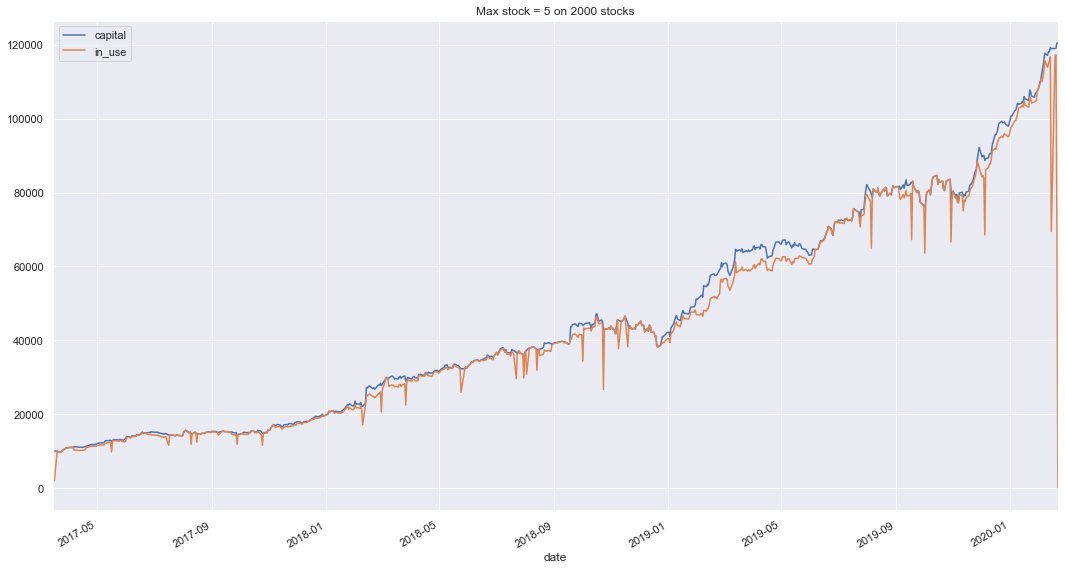

In [7]:
#myPnL_df, my_Capital_df = backtester()
myCapital_df = my_Capital_df
myCapital_df.index = myCapital_df.date
to_plot_cols = ['capital', 'in_use']
myCapital_df[to_plot_cols][first_buy_date:].plot(figsize=(18,10))
plt.title('Max stock = 5 on 2000 stocks')
plt.show()

# Analysis of Results

The cells below perform a simple analysis. They look at the completed trades. For each trade it calculates the gain and gain percentage. With that it then displays the top ten losses and top ten gains. It ends with calculating the percentage of trades that resulted in a loss.

In [8]:
sell_df = myPnL_df[myPnL_df.action=='SELL'].copy()
sell_df['gain'] = (sell_df.close_amount - sell_df.orig_amount)
sell_df['gain_pct'] = round((sell_df.gain / sell_df.orig_amount)*100, 2)
sell_df

date ticker action   orig_amount  close_amount    no_shares  \
0  2017-03-20   SYBT   SELL   2000.000000   1972.160080    49.714144   
0  2017-03-20   CVGI   SELL   1987.472036   1987.472036   338.581267   
0  2017-03-20   NATR   SELL   1987.472036   1987.472036   200.754751   
0  2017-03-20   PKOH   SELL   1987.472036   1987.472036    56.736284   
0  2017-03-20    KBR   SELL   1987.472036   1987.472036   148.318809   
..        ...    ...    ...           ...           ...          ...   
0  2020-02-20   LAKE   SELL  23816.501151  25279.091263  1976.473125   
0  2020-02-20    UNP   SELL  23816.501151  23803.522132   129.790197   
0  2020-02-21    TGT   SELL  21029.448214  21700.817845   185.461224   
0  2020-02-21   FCAP   SELL  23636.253468  24187.588199   355.699826   
0  2020-02-21   HFWA   SELL  24073.437692  24010.653019   896.923908   

    stop_loss    daily_gain  daily_return  invested          gain  gain_pct  
0      36.207 -4.871986e+01 -2.410824e+00         0 -2.783992e+01     -1.39  
0       5.283  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
0       8.910  2.273737e-13  1.144035e-14         0  2.273737e-13      0.00  
0      31.527  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
0      12.060  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
..        ...           ...           ...       ...           ...       ...  
0      10.845  1.462590e+03  6.141079e+00         0  1.462590e+03      6.14  
0     165.150 -1.297902e+01 -5.449591e-02         0 -1.297902e+01     -0.05  
0     102.051 -2.318265e+02 -1.056993e+00         0  6.713696e+02      3.19  
0      59.805  1.920779e+02  8.004744e-01         0  5.513347e+02      2.33  
0      24.156 -6.278467e+01 -2.608048e-01         0 -6.278467e+01     -0.26  

[555 rows x 12 columns]

In [9]:
sell_df.describe()

orig_amount  close_amount     no_shares    stop_loss   daily_gain  \
count    555.000000    555.000000    555.000000   555.000000   555.000000   
mean    8873.461453   9072.401595   1092.537837    47.235739    15.588786   
std     6123.432202   6277.437723   2416.984123   165.036183   411.933245   
min     1851.224113   1791.655239      3.741888     0.351000 -4367.943013   
25%     3054.233122   3243.038534     94.335417     6.205500   -20.140875   
50%     6683.192216   6781.958481    284.012680    22.032000     0.000000   
75%    13195.720581  13206.496514    993.586349    52.438500    34.554084   
max    24073.437692  25279.091263  29074.601634  3699.099000  4078.381822   

       daily_return  invested          gain    gain_pct  
count    555.000000     555.0  5.550000e+02  555.000000  
mean       0.204716       0.0  1.989401e+02    2.561135  
std        5.442829       0.0  8.906881e+02   11.017638  
min      -32.651549       0.0 -3.251010e+03  -35.180000  
25%       -0.321393       0.0 -4.547474e-13    0.000000  
50%        0.000000       0.0  0.000000e+00    0.000000  
75%        0.556793       0.0  1.642193e+02    1.955000  
max       86.956522       0.0  7.555660e+03   99.480000

In [10]:
sell_df.sort_values(by='gain_pct', ascending=True)[0:10]

date ticker action   orig_amount  close_amount    no_shares  \
0 2017-09-28   DXCM   SELL   2763.975181   1791.655239    39.429033   
0 2018-03-27    UNT   SELL   5442.169448   4394.888173   263.798810   
0 2019-12-05   VNRX   SELL  17165.330212  13914.320702  3251.009510   
0 2018-11-19    RPD   SELL   7846.205677   6425.672973   229.488320   
0 2019-08-06   ALPN   SELL  14213.911308  11916.546573  3305.560769   
0 2019-10-30   ENPH   SELL  15121.370367  12743.796410   679.306845   
0 2018-10-24   EVFM   SELL   8888.471769   7625.135680  2255.957302   
0 2018-07-31   VNRX   SELL   7082.808433   6091.215252  3541.404216   
0 2018-08-14   ENPH   SELL   6460.457522   5557.974529  1100.589016   
0 2017-07-17   AIRT   SELL   2202.128855   1907.924440   176.170308   

   stop_loss   daily_gain  daily_return  invested         gain  gain_pct  
0     63.090  -868.621587    -32.651549         0  -972.319942    -35.18  
0     18.567  -717.532763    -14.035088         0 -1047.281275    -19.24  
0      4.752 -2145.666277    -13.360324         0 -3251.009510    -18.94  
0     30.771 -1096.954172    -14.582062         0 -1420.532704    -18.10  
0      3.870  -981.751548     -7.611481         0 -2297.364735    -16.16  
0     20.034 -4367.943013    -25.526002         0 -2377.573957    -15.72  
0      3.546  -586.548898     -7.142857         0 -1263.336089    -14.21  
0      1.800  -354.140422     -5.494505         0  -991.593181    -14.00  
0      5.283  -352.188485     -5.959032         0  -902.482993    -13.97  
0     11.250  -369.957648    -16.241299         0  -294.204415    -13.36

In [11]:
sell_df.sort_values(by='gain_pct', ascending=False)[0:10]

date ticker action   orig_amount  close_amount     no_shares  \
0 2018-03-09   ENPH   SELL   4131.706140   8242.114826   2129.745433   
0 2018-02-13     ZN   SELL   4003.466907   7969.864676   1853.456901   
0 2019-03-15   KALV   SELL   9484.822714  15128.684163    522.579764   
0 2019-09-05   MEDP   SELL  12093.079703  19176.930877    231.801413   
0 2017-04-07    SYX   SELL   2004.175988   3133.601131    369.093184   
0 2018-09-19   MTEM   SELL   7777.379288  11855.761110   1896.921778   
0 2017-06-26   NVDA   SELL   2253.899889   3390.286017     22.467104   
0 2019-11-29     NK   SELL  15243.874674  22799.534295  13255.543195   
0 2019-06-07   ESNT   SELL   6366.091014   9423.835066    194.265823   
0 2019-01-31   RUBI   SELL   8956.100265  12802.630508   2870.544957   

   stop_loss   daily_gain  daily_return  invested         gain  gain_pct  
0      1.746   170.379635      2.110818         0  4110.408686     99.48  
0      1.944  3706.913803     86.956522         0  3966.397769     99.07  
0     16.335 -1123.546492     -6.913183         0  5643.861450     59.50  
0     46.953   310.613893      1.646394         0  7083.851174     58.58  
0      4.887    29.527455      0.951249         0  1129.425142     56.35  
0      3.690  4078.381822     52.439024         0  4078.381822     52.44  
0     90.288   -37.295393     -1.088096         0  1136.386128     50.42  
0      1.035  2518.553207     12.418301         0  7555.659621     49.57  
0     29.493   -31.082532     -0.328745         0  3057.744051     48.03  
0      2.808   401.876294      3.240741         0  3846.530242     42.95

In [12]:
sell_df[sell_df.gain_pct < 0].count()[0], sell_df[sell_df.gain_pct < 0].count()[0]/len(sell_df)

(130, 0.23423423423423423)

In [13]:
myPnL_df

date ticker action   orig_amount  close_amount   no_shares  \
0  2017-03-16   SYBT    BUY   2000.000000   2000.000000   49.714144   
0  2017-03-16   SYBT  CLOSE   2000.000000   2000.000000   49.714144   
0  2017-03-17   SYBT  CLOSE   2000.000000   2020.879940   49.714144   
0  2017-03-20    SYX    BUY   2004.175988   2004.175988  369.093184   
0  2017-03-20   OFLX    BUY   2004.175988   2004.175988   47.035344   
..        ...    ...    ...           ...           ...         ...   
0  2020-02-20   FCAP  CLOSE  23636.253468  23995.510293  355.699826   
0  2020-02-20   HFWA  CLOSE  24073.437692  24073.437692  896.923908   
0  2020-02-21    TGT   SELL  21029.448214  21700.817845  185.461224   
0  2020-02-21   FCAP   SELL  23636.253468  24187.588199  355.699826   
0  2020-02-21   HFWA   SELL  24073.437692  24010.653019  896.923908   

    stop_loss  daily_gain  daily_return  invested  
0      36.207    0.000000      0.000000         0  
0      36.207    0.000000      0.000000         0  
0      36.207   20.879940      1.043997         0  
0       4.887    0.000000      0.000000         0  
0      38.349    0.000000      0.000000         0  
..        ...         ...           ...       ...  
0      59.805  -14.227993     -0.059259         0  
0      24.156    0.000000      0.000000         0  
0     102.051 -231.826530     -1.056993         0  
0      59.805  192.077906      0.800474         0  
0      24.156  -62.784674     -0.260805         0  

[4764 rows x 10 columns]

In [14]:
sell_df.ticker.unique(), len(sell_df.ticker.unique())

(array(['SYBT', 'CVGI', 'NATR', 'PKOH', 'KBR', 'KAI', 'USM', 'CBPO',
        'CHNR', 'MSEX', 'GLUU', 'CF', 'JCS', 'PTSI', 'TGT', 'EXAS', 'DXCM',
        'PKBK', 'CCMP', 'SYX', 'ISSC', 'TJX', 'SIRI', 'TSRI', 'TRNS',
        'TECH', 'OFLX', 'BIIB', 'ZN', 'AUB', 'GFN', 'PEBK', 'VALU', 'TGNA',
        'CRMT', 'PW', 'ARWR', 'DOV', 'NSSC', 'CORT', 'APEN', 'LULU', 'NEM',
        'TIPT', 'STRL', 'CVI', 'ATRS', 'ITT', 'CATC', 'NVDA', 'RF', 'OSBC',
        'DSGX', 'ICFI', 'NSIT', 'CTAS', 'AIRT', 'SPPI', 'AVB', 'CTHR',
        'HTZ', 'IMMR', 'NOA', 'AMWD', 'IMAX', 'UNT', 'RGS', 'HOFT', 'KMI',
        'AMGN', 'SKYW', 'ALOT', 'PACW', 'NSP', 'TAC', 'VZ', 'MASI', 'EDSA',
        'VRTX', 'PCRX', 'SPOK', 'CCI', 'PODD', 'TBBK', 'PRAA', 'XRAY',
        'ISNS', 'FMBI', 'ATRI', 'ETR', 'PRTS', 'PCTI', 'UI', 'BOCH',
        'ITIC', 'GCO', 'BDSI', 'KGC', 'HCCI', 'AXU', 'MIND', 'GRPN',
        'HURN', 'SLG', 'SMP', 'JJSF', 'KINS', 'VNRX', 'CASS', 'WIFI',
        'CHEF', 'MTEM', 'COOP', 'RNR', 'ENV', 'AVY', 'SA

In [15]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker         gain
175     NK  7555.659621
157   MEDP  7083.851174
80    ESNT  6075.747332
223   RUBI  5853.815907
224   SALT  4925.052430
56    COUP  4756.879453
182   NXRT  4409.800163
139   KALV  4224.964838
176    NOA  4158.862324
284     ZN  4071.265713

In [16]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
221    RPD -3071.218409
5     ALPN -2297.364735
214   REKR -1851.076472
2     AGRX -1470.940607
273   VNRX -1268.525991
95    FIVN -1153.778341
193   PCRX  -858.592370
125   INSG  -848.254223
128    IQV  -814.523486
37    BPRN  -669.236124

In [17]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker         gain
175     NK  7555.659621
157   MEDP  7083.851174
56    COUP  4756.879453
182   NXRT  4409.800163
105   GWRS  3157.117848
80    ESNT  3037.873666
223   RUBI  2926.907953
173   NEWR  2285.159514
139   KALV  2112.482419
98    FNHC  1598.915153

In [18]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
5     ALPN -2297.364735
214   REKR -1851.076472
221    RPD -1535.609204
125   INSG  -848.254223
2     AGRX  -735.470304
37    BPRN  -669.236124
95    FIVN  -384.592780
165   MSBI  -323.193306
128    IQV  -271.507829
193   PCRX  -214.648093

# Suspicious Stocks

Below are the plotted close price plots as returned by yfinance. 

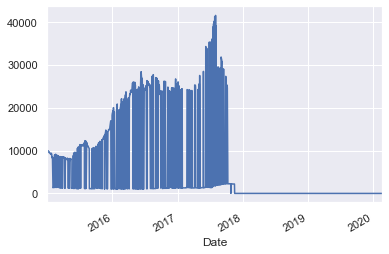

In [19]:
# Google shows close price between $8 - $16, so something seems to be wrong here
asset  = yf.Ticker('SBT')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

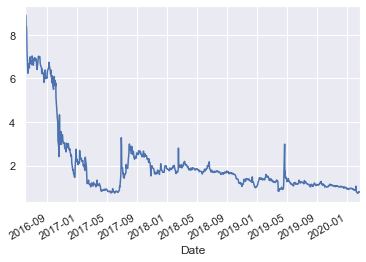

In [20]:
# Data looks okay - there's just a quick change around 2019-04-22 and then a big drop on 2019-04-23.
# Trade is still profitable. Modified the stop_loss logic to match what stockbrokers do...
asset  = yf.Ticker('MBRX')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

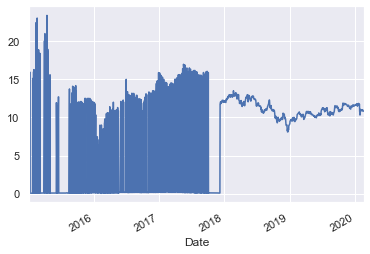

In [21]:
# LBC stock looks suspicious => exclude and rerun...
asset  = yf.Ticker('LBC')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

In [22]:
myCapital_df.tail()

date capital       in_use     free
date                                               
2020-02-14 2020-02-14  118989      69455.1  49533.8
2020-02-18 2020-02-18  119012       117073  1938.24
2020-02-19 2020-02-19  119088       117274  1813.99
2020-02-20 2020-02-20  120514      70001.6  50512.7
2020-02-21 2020-02-21  120412  6.91216e-11   120412

In [23]:
len(possible_trades_df)

9858